In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
from src.styles import set_plot_style
from src.plots import *
from src.timeline import *
from src.utils import load_and_prepare_metadata
set_plot_style("prism_rain")
from src.utils import _proc_from_path, _file_index, _read_measurement
import polars as pl

✓ Applied 'prism_rain' theme
✓ Applied 'prism_rain' theme


In [2]:
from src.timeline import print_chip_history

print_chip_history(
    metadata_dir=Path("metadata"),
    raw_data_dir=Path("raw_data"),
    chip_number=67,
    chip_group_name="Alisson"
)


Complete Experiment History: Alisson67
Total experiments: 82
Date range: 2025-09-08 to 2025-10-19

─── 2025-09-08 (Alisson_08_sept) ──────────────────────────────────────────────────
   1  12:26:20  IVg Alisson67  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #1

─── 2025-10-14 (2025-10-14) ──────────────────────────────────────────────────
   2  15:03:53  IVg Alisson67  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #6
   3  15:12:05  IVg Alisson67  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #7
   4  15:13:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=1.15 V  λ=455.0 nm  period=120.0 s  #10
   5  15:16:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=2.19 V  λ=455.0 nm  period=120.0 s  #11
   6  15:19:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=3.28 V  λ=455.0 nm  period=120.0 s  #12
   7  15:22:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=4.41 V  λ=455.0 nm  period=120.0 s  #13
   8  16:08:35  IVg Alisson67  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #8
   9  16:10:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=1.15 V  λ=455

shape: (82, 9)
┌─────┬────────────┬──────────┬──────┬───┬────────────────┬──────────┬────────────┬────────────────┐
│ seq ┆ date       ┆ time_hms ┆ proc ┆ … ┆ source_file    ┆ file_idx ┆ start_time ┆ day_folder     │
│ --- ┆ ---        ┆ ---      ┆ ---  ┆   ┆ ---            ┆ ---      ┆ ---        ┆ ---            │
│ i64 ┆ str        ┆ str      ┆ str  ┆   ┆ str            ┆ i64      ┆ f64        ┆ str            │
╞═════╪════════════╪══════════╪══════╪═══╪════════════════╪══════════╪════════════╪════════════════╡
│ 1   ┆ 2025-09-08 ┆ 12:26:20 ┆ IVg  ┆ … ┆ raw_data/Aliss ┆ 1        ┆ 1.7573e9   ┆ Alisson_08_sep │
│     ┆            ┆          ┆      ┆   ┆ on_08_sept/IVg ┆          ┆            ┆ t              │
│     ┆            ┆          ┆      ┆   ┆ 20…            ┆          ┆            ┆                │
│ 2   ┆ 2025-10-14 ┆ 15:03:53 ┆ IVg  ┆ … ┆ raw_data/2025- ┆ 6        ┆ 1.7605e9   ┆ 2025-10-14     │
│     ┆            ┆          ┆      ┆   ┆ 10-14/IVg2025- ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 10…            ┆          ┆            ┆                │
│ 3   ┆ 2025-10-14 ┆ 15:12:05 ┆ IVg  ┆ … ┆ raw_data/2025- ┆ 7        ┆ 1.7605e9   ┆ 2025-10-14     │
│     ┆            ┆          ┆      ┆   ┆ 10-14/IVg2025- ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 10…            ┆          ┆            ┆                │
│ 4   ┆ 2025-10-14 ┆ 15:13:12 ┆ It   ┆ … ┆ raw_data/2025- ┆ 10       ┆ 1.7605e9   ┆ 2025-10-14     │
│     ┆            ┆          ┆      ┆   ┆ 10-14/It2025-1 ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 0-…            ┆          ┆            ┆                │
│ 5   ┆ 2025-10-14 ┆ 15:16:12 ┆ It   ┆ … ┆ raw_data/2025- ┆ 11       ┆ 1.7605e9   ┆ 2025-10-14     │
│     ┆            ┆          ┆      ┆   ┆ 10-14/It2025-1 ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 0-…            ┆          ┆            ┆                │
│ …   ┆ …          ┆ …        ┆ …    ┆ … ┆ …              ┆ …        ┆ …          ┆ …              │
│ 78  ┆ 2025-10-18 ┆ 19:48:45 ┆ IVg  ┆ … ┆ raw_data/2025- ┆ 3        ┆ 1.7608e9   ┆ 2025-10-18     │
│     ┆            ┆          ┆      ┆   ┆ 10-18/IVg2025- ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 10…            ┆          ┆            ┆                │
│ 79  ┆ 2025-10-19 ┆ 14:03:04 ┆ IVg  ┆ … ┆ raw_data/2025- ┆ 1        ┆ 1.7609e9   ┆ 2025-10-19     │
│     ┆            ┆          ┆      ┆   ┆ 10-19/IVg2025- ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 10…            ┆          ┆            ┆                │
│ 80  ┆ 2025-10-19 ┆ 14:04:28 ┆ It   ┆ … ┆ raw_data/2025- ┆ 1        ┆ 1.7609e9   ┆ 2025-10-19     │
│     ┆            ┆          ┆      ┆   ┆ 10-19/It2025-1 ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 0-…            ┆          ┆            ┆                │
│ 81  ┆ 2025-10-19 ┆ 18:43:05 ┆ IVg  ┆ … ┆ raw_data/2025- ┆ 2        ┆ 1.7609e9   ┆ 2025-10-19     │
│     ┆            ┆          ┆      ┆   ┆ 10-19/IVg2025- ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 10…            ┆          ┆            ┆                │
│ 82  ┆ 2025-10-19 ┆ 18:44:20 ┆ It   ┆ … ┆ raw_data/2025- ┆ 2        ┆ 1.7609e9   ┆ 2025-10-19     │
│     ┆            ┆          ┆      ┆   ┆ 10-19/It2025-1 ┆          ┆            ┆                │
│     ┆            ┆          ┆      ┆   ┆ 0-…            ┆          ┆            ┆                │
└─────┴────────────┴──────────┴──────┴───┴────────────────┴──────────┴────────────┴────────────────┘

saved figs/Encap80_IVg_sequence_metadata.png


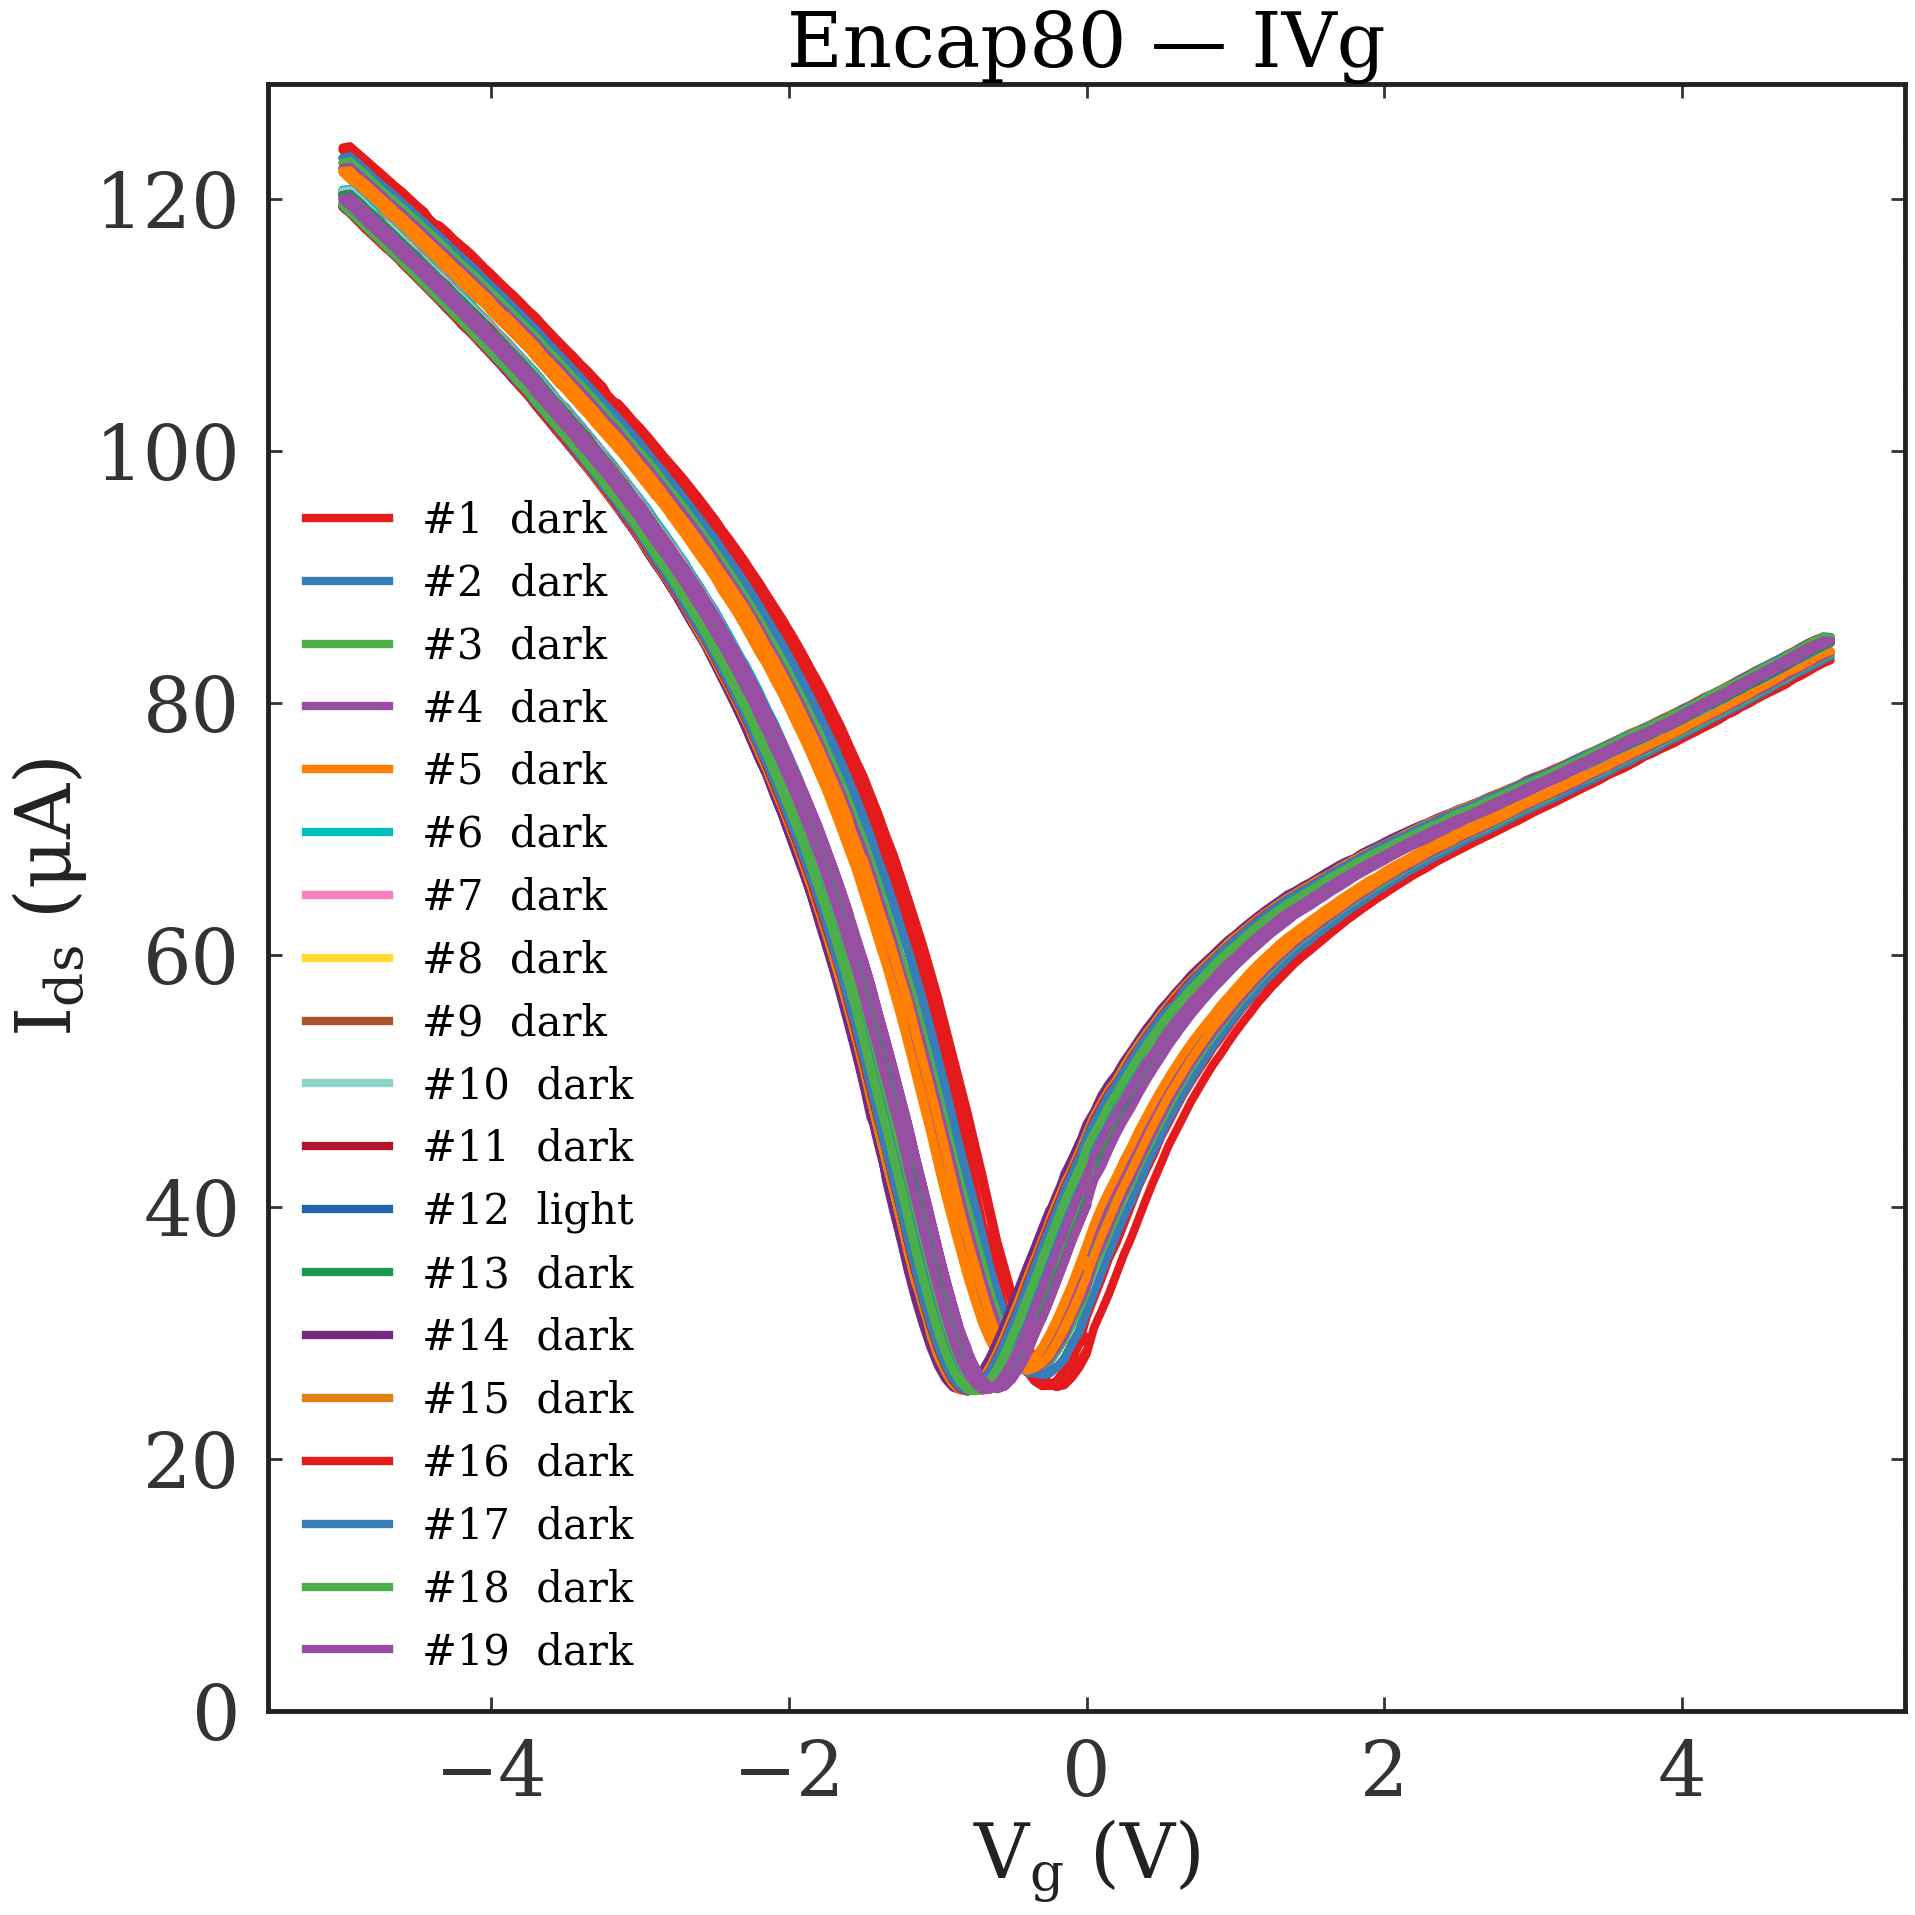

In [3]:
METADATA_CSV = "metadata/2025-10-13/metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 80.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem


# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/chip80_ITS_overlay_metadata.png


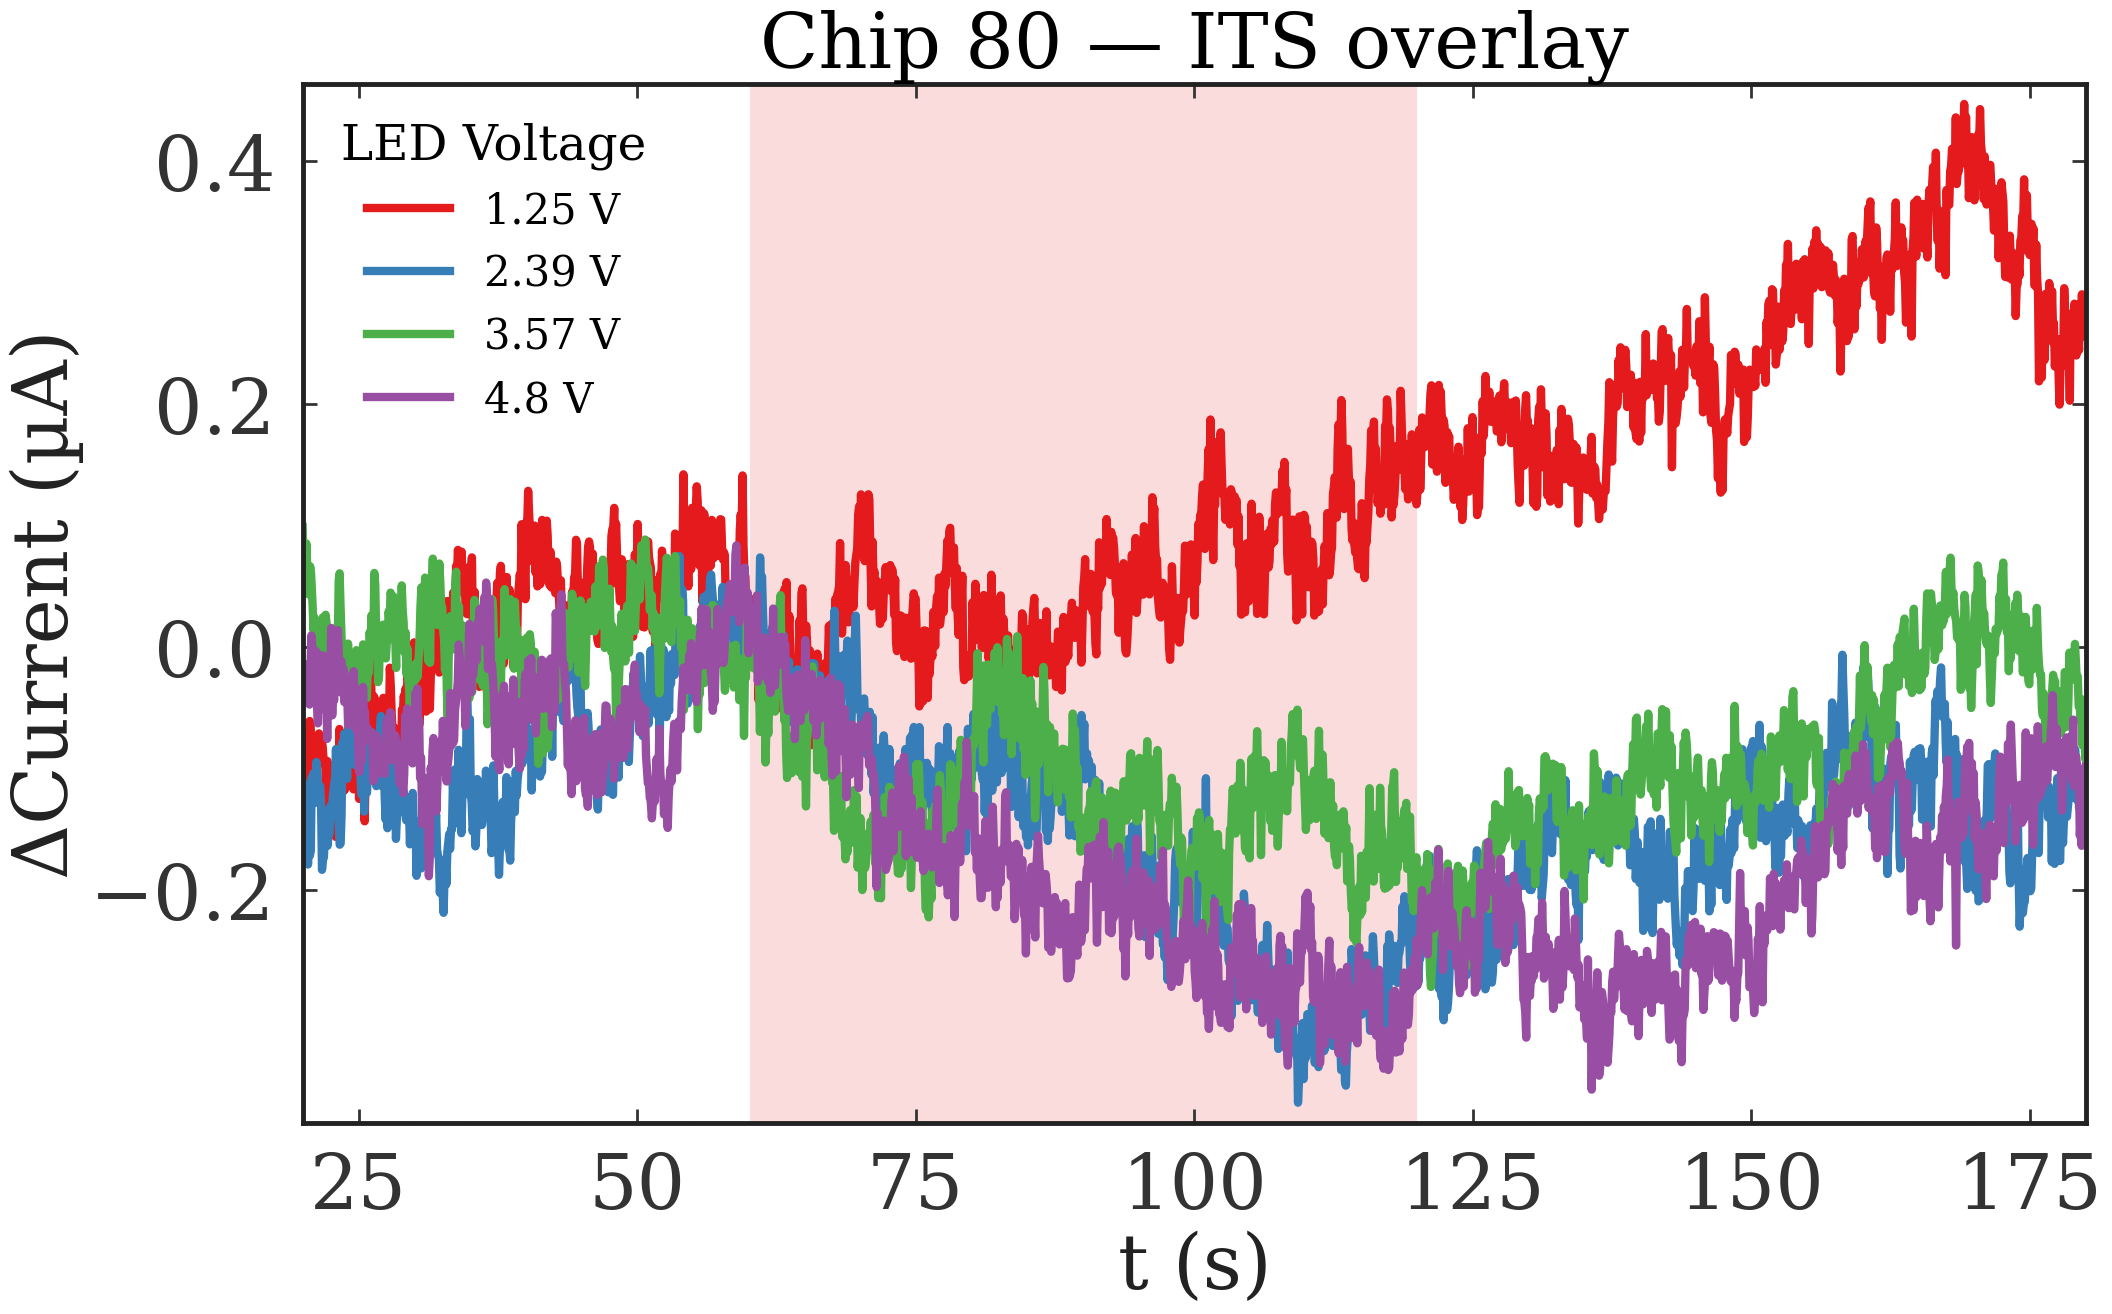

In [4]:
good_its = [9,10,11,12]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip80_ITS_overlay_metadata.png


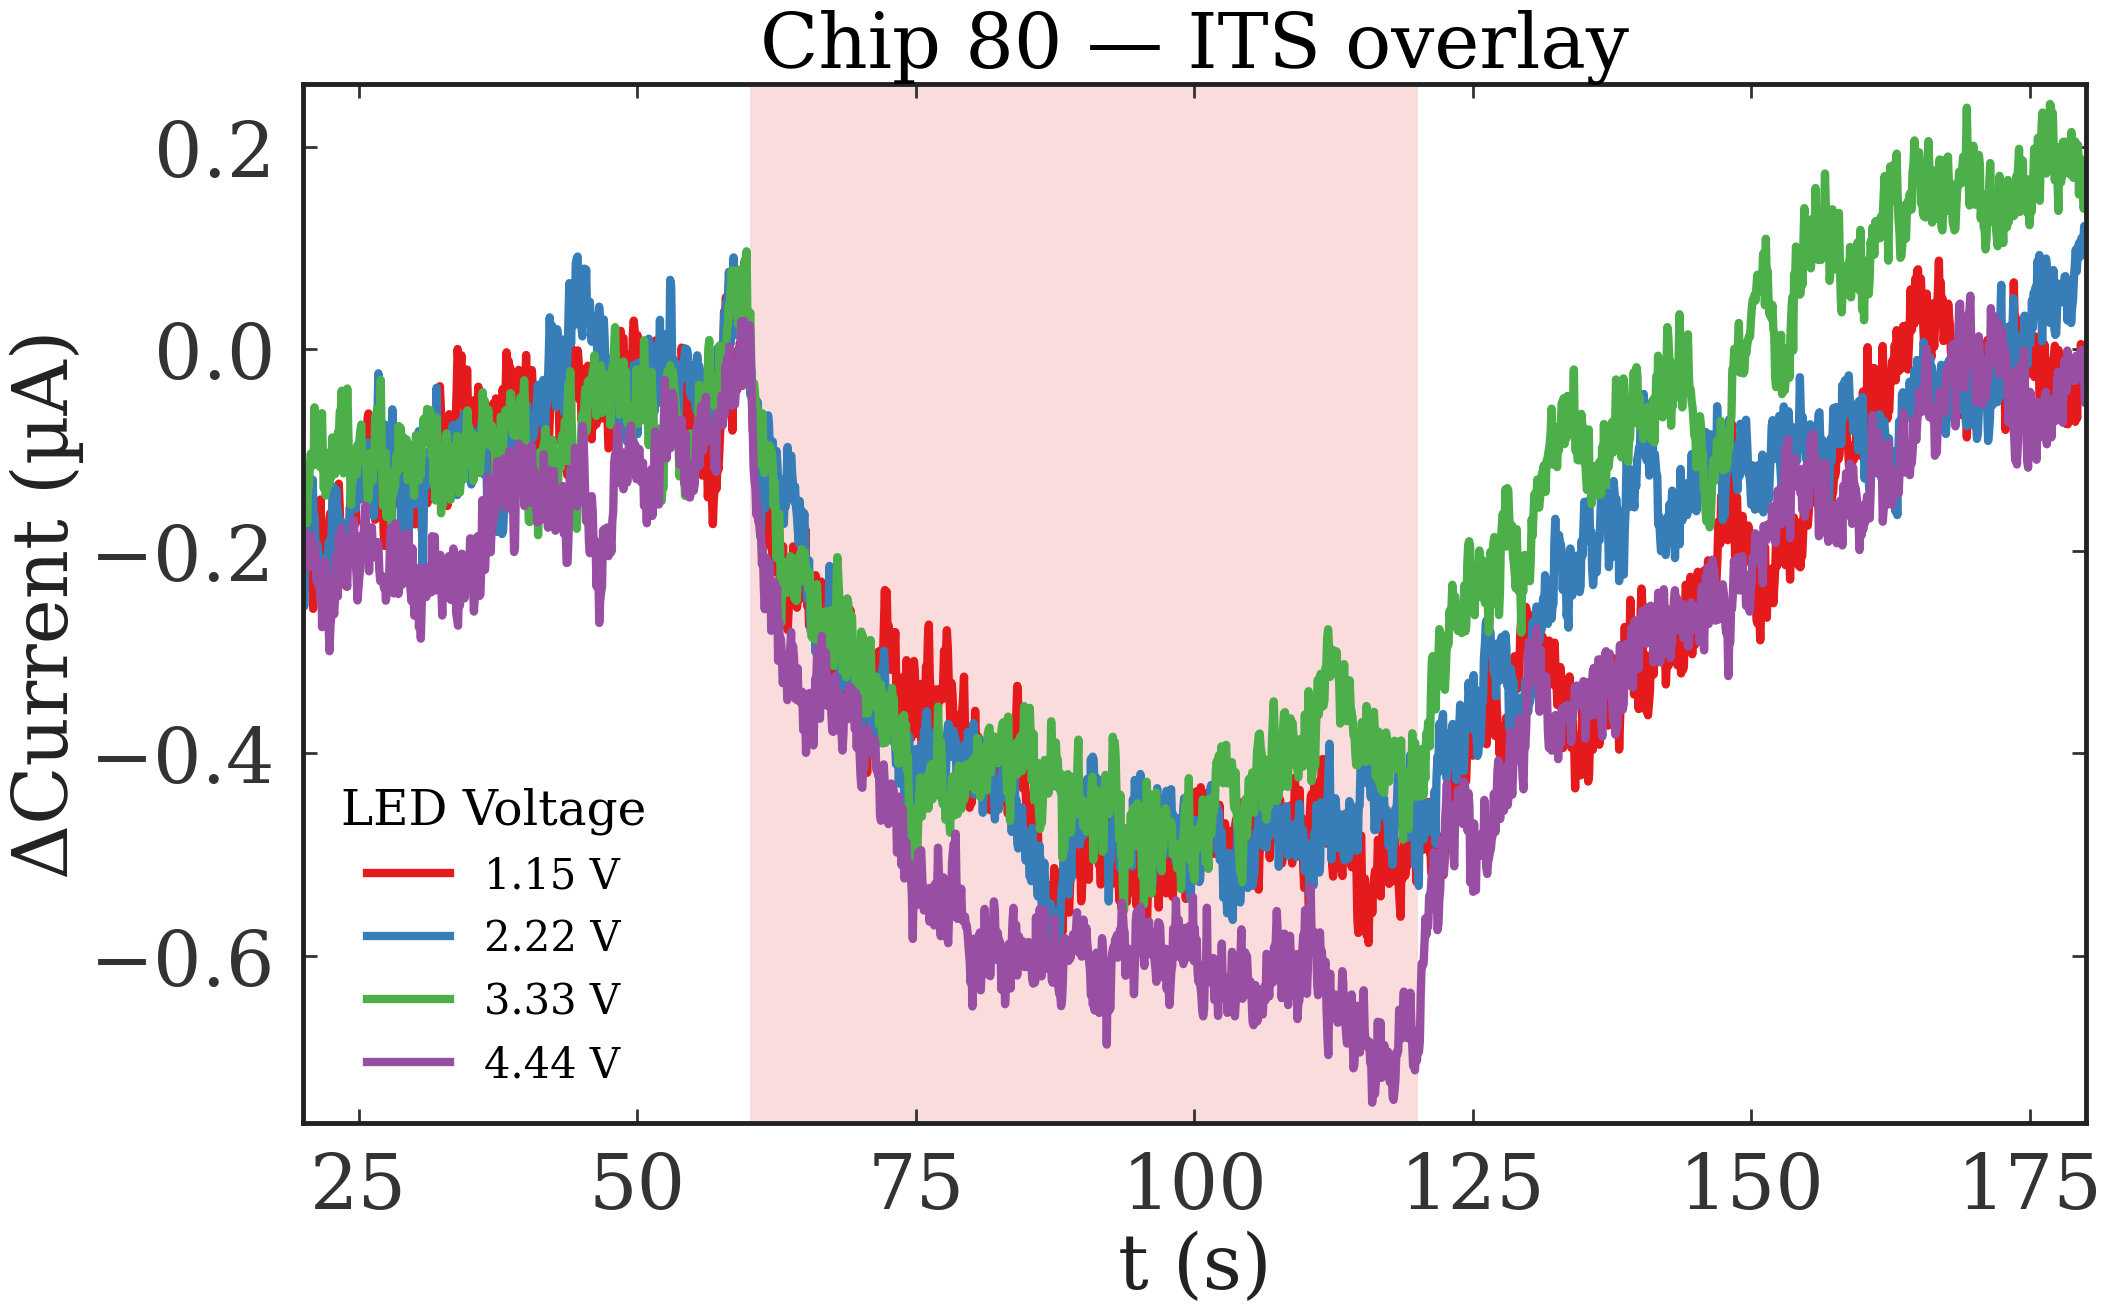

In [5]:
good_its = [13,14,15,16]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip80_ITS_overlay_metadata.png


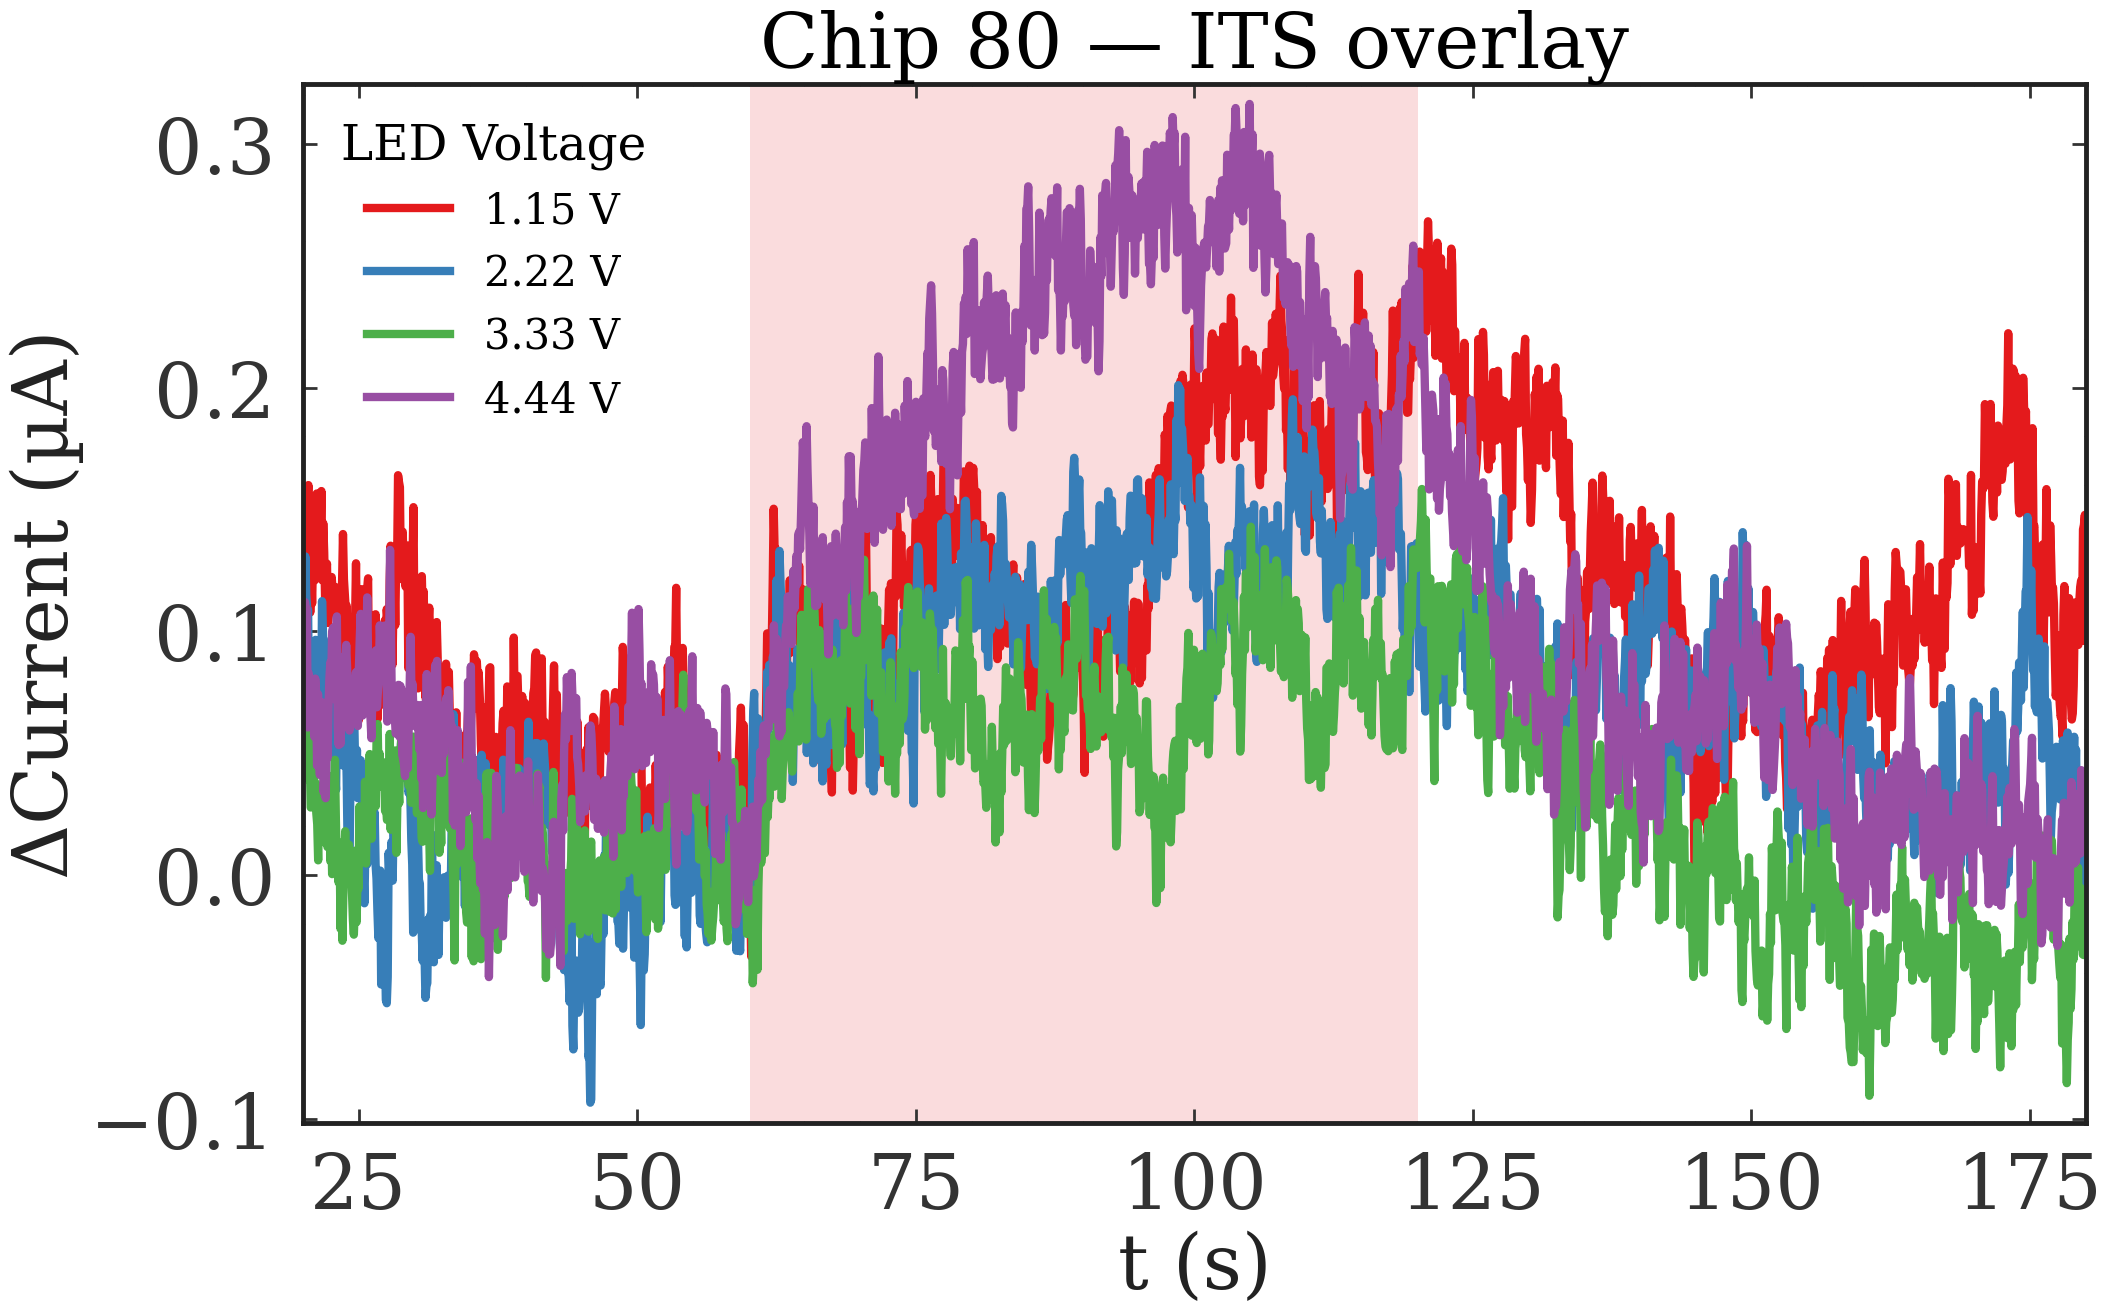

In [6]:
good_its = [17,18,19,20]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip80_ITS_overlay_metadata.png


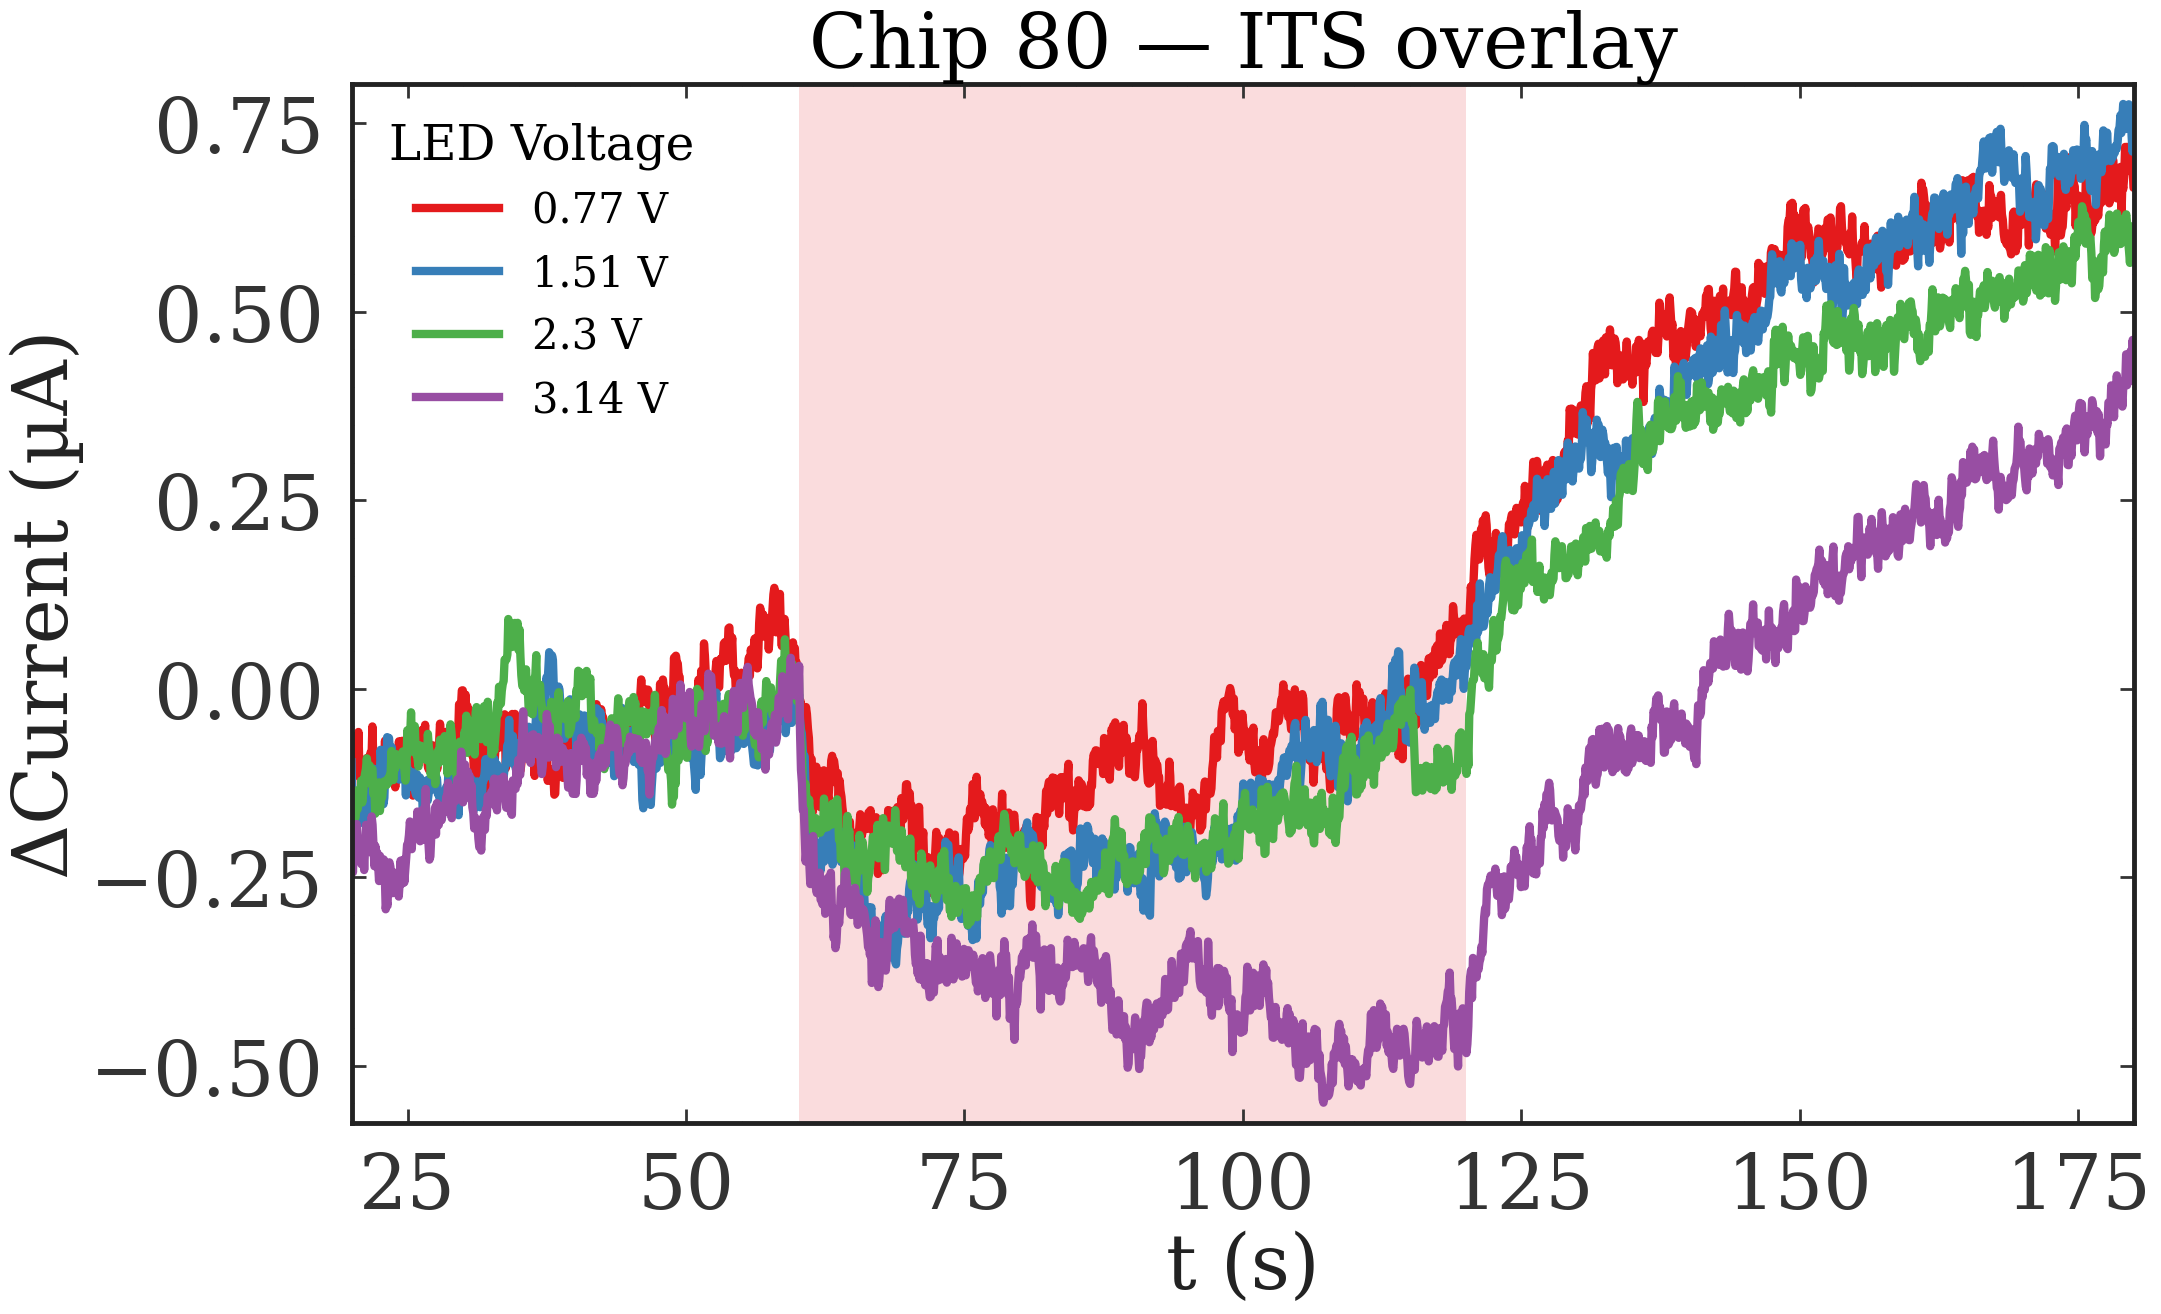

In [7]:
good_its = [21,22,23,24]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip80_ITS_overlay_metadata.png


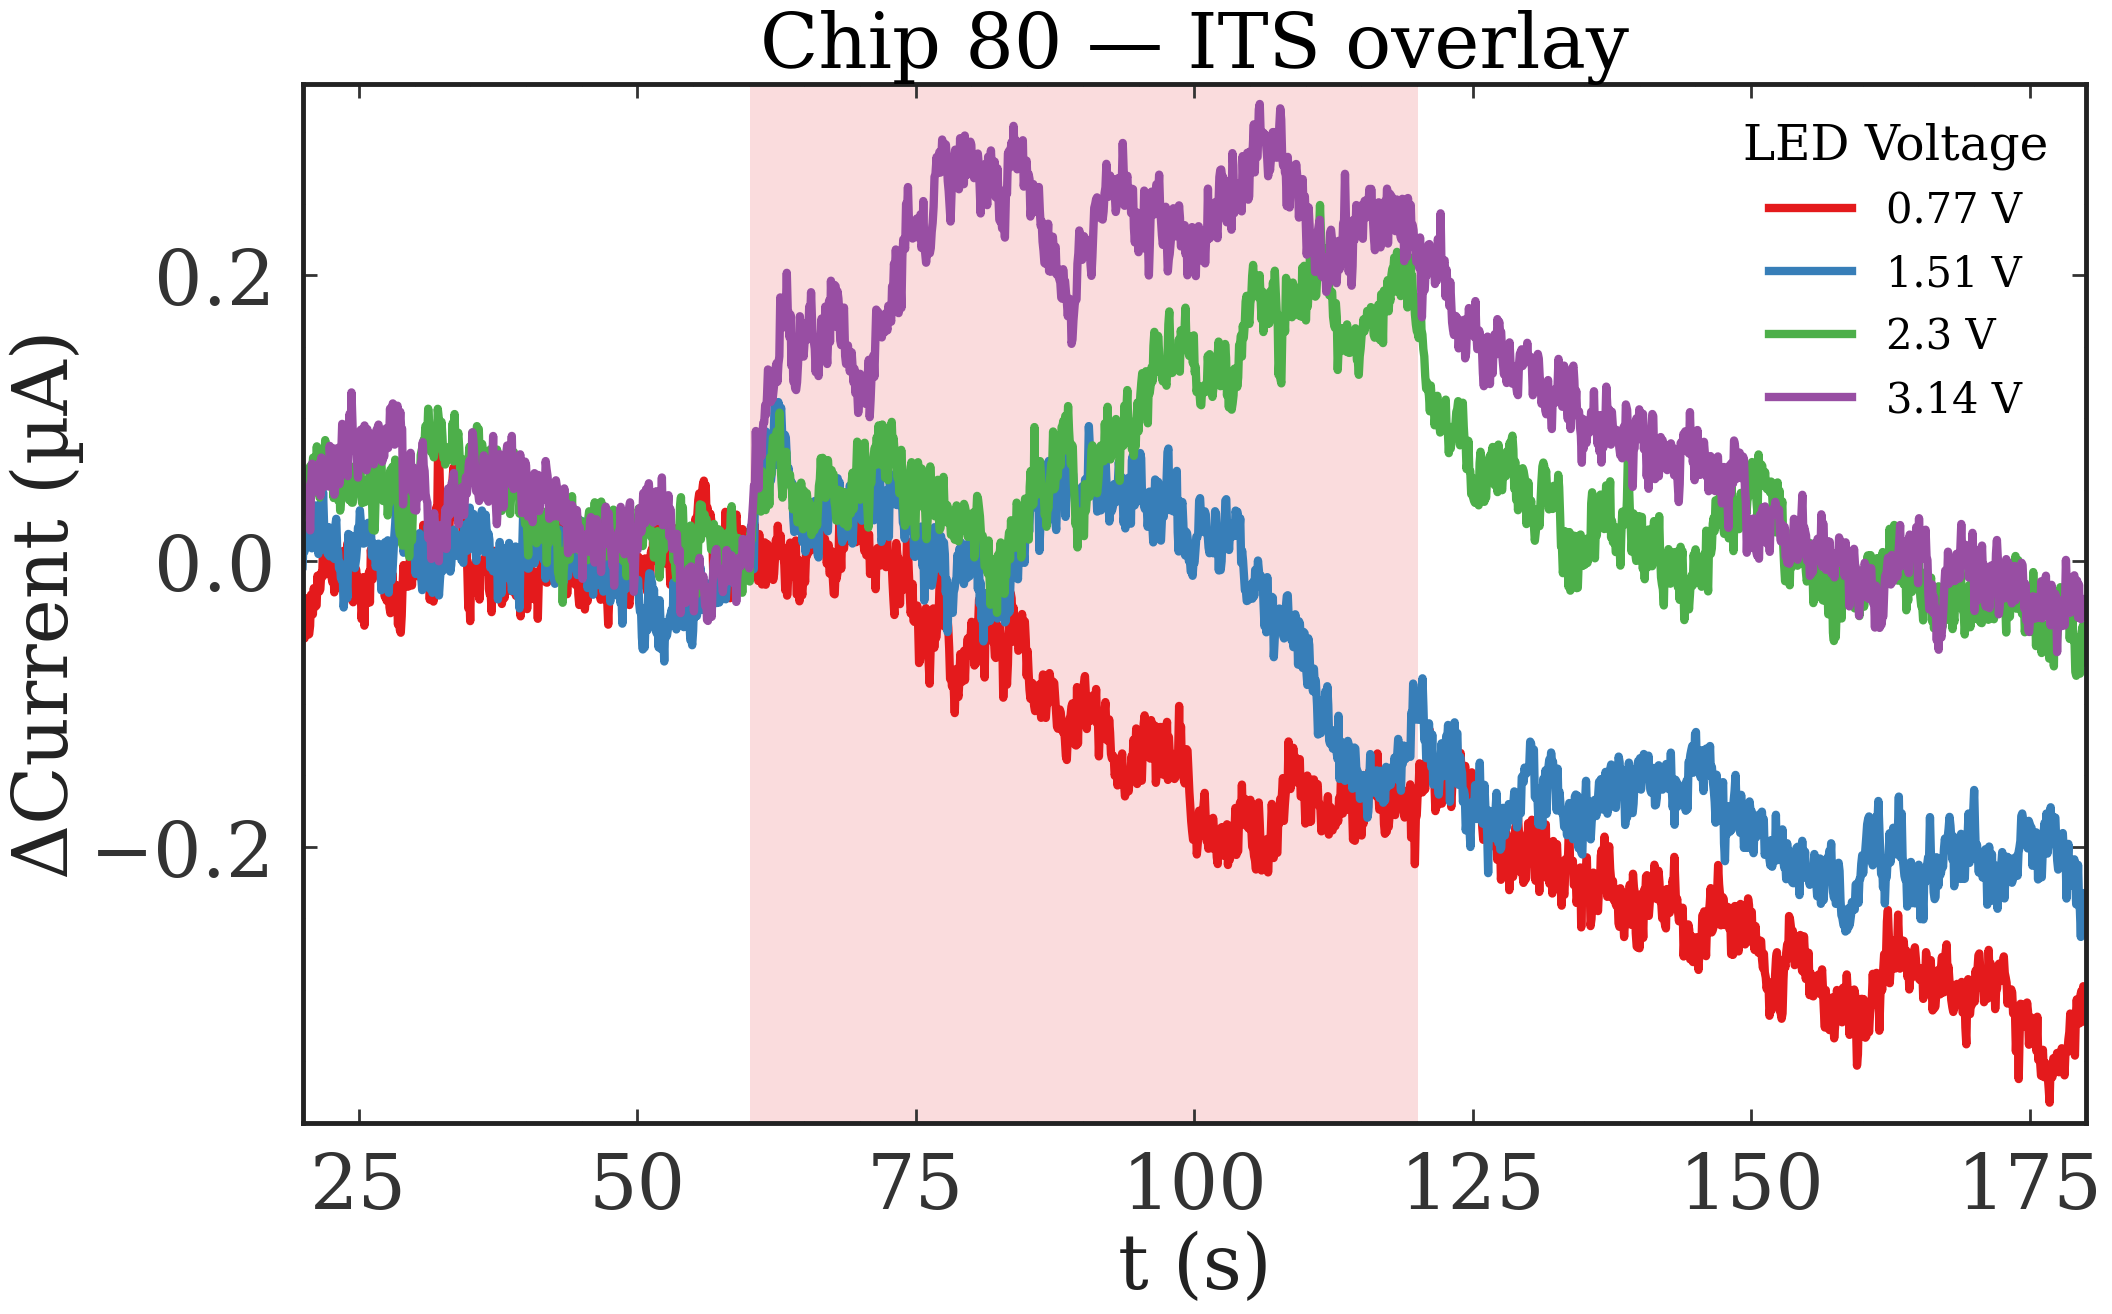

In [8]:
good_its = [25,26,27,28]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/Encap80_IVg_sequence_metadata.png


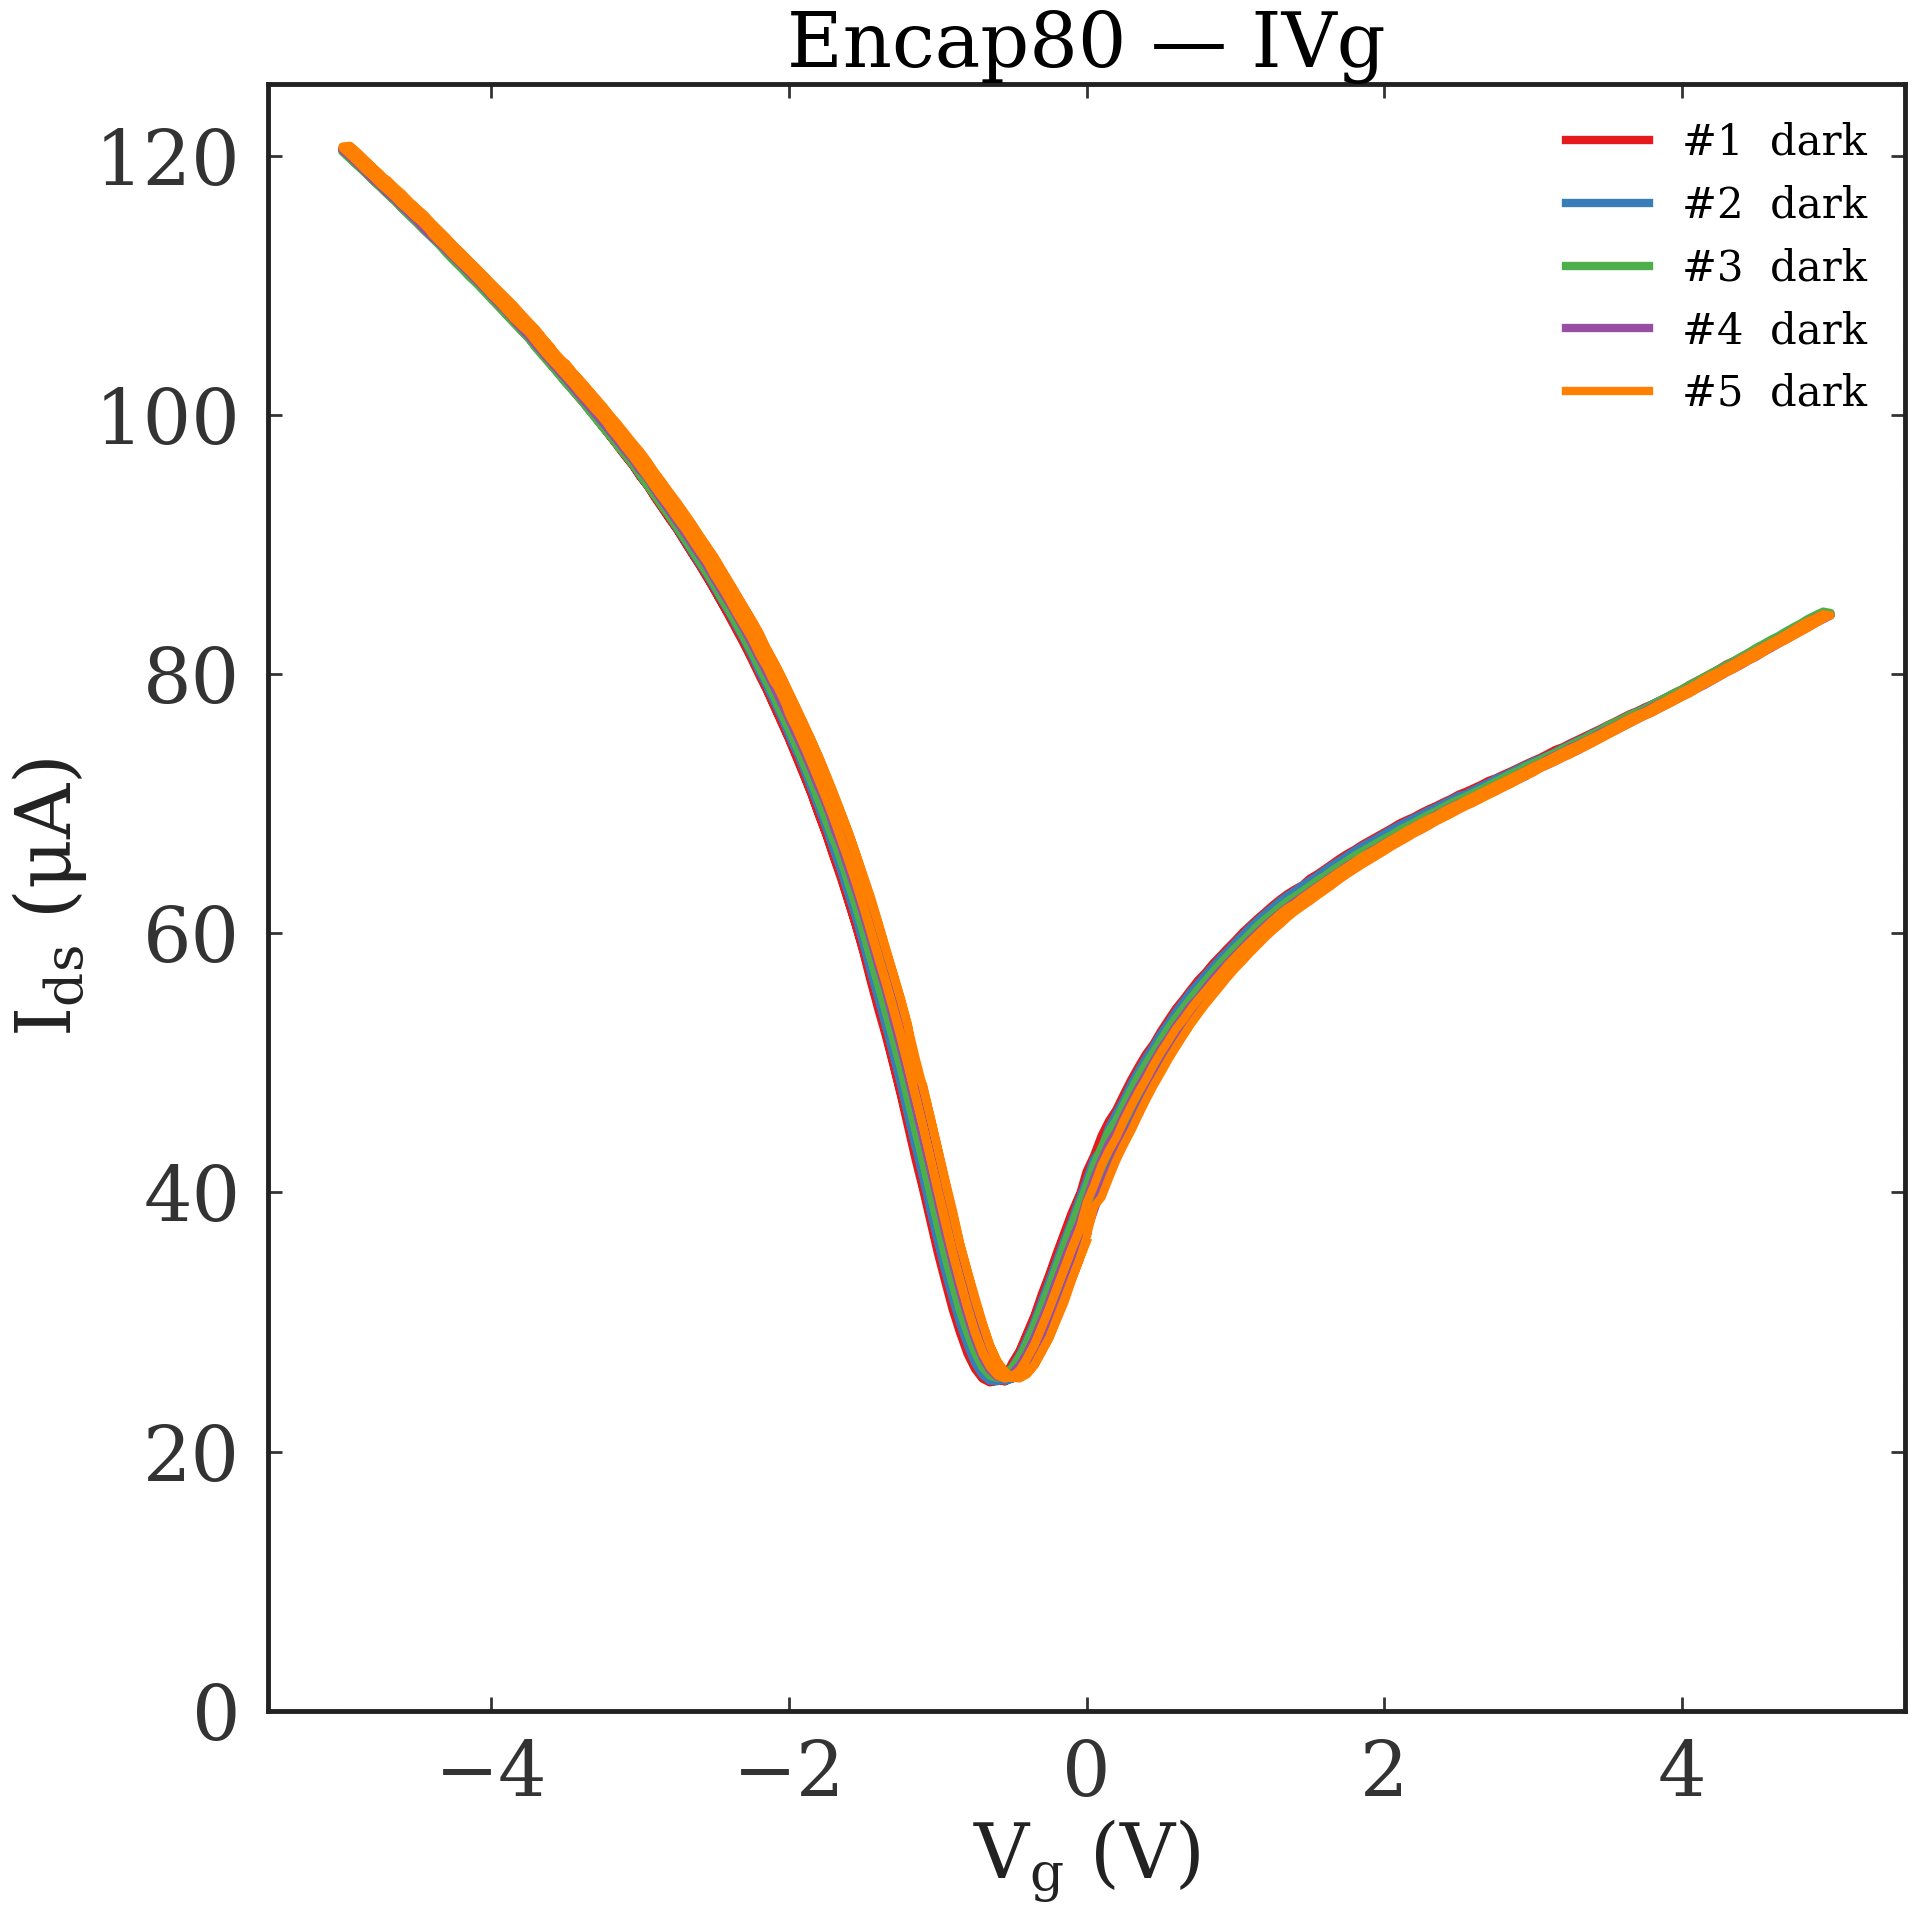

In [9]:
METADATA_CSV = "metadata/2025-10-14/metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 80.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem


# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/chip80_ITS_overlay_metadata.png


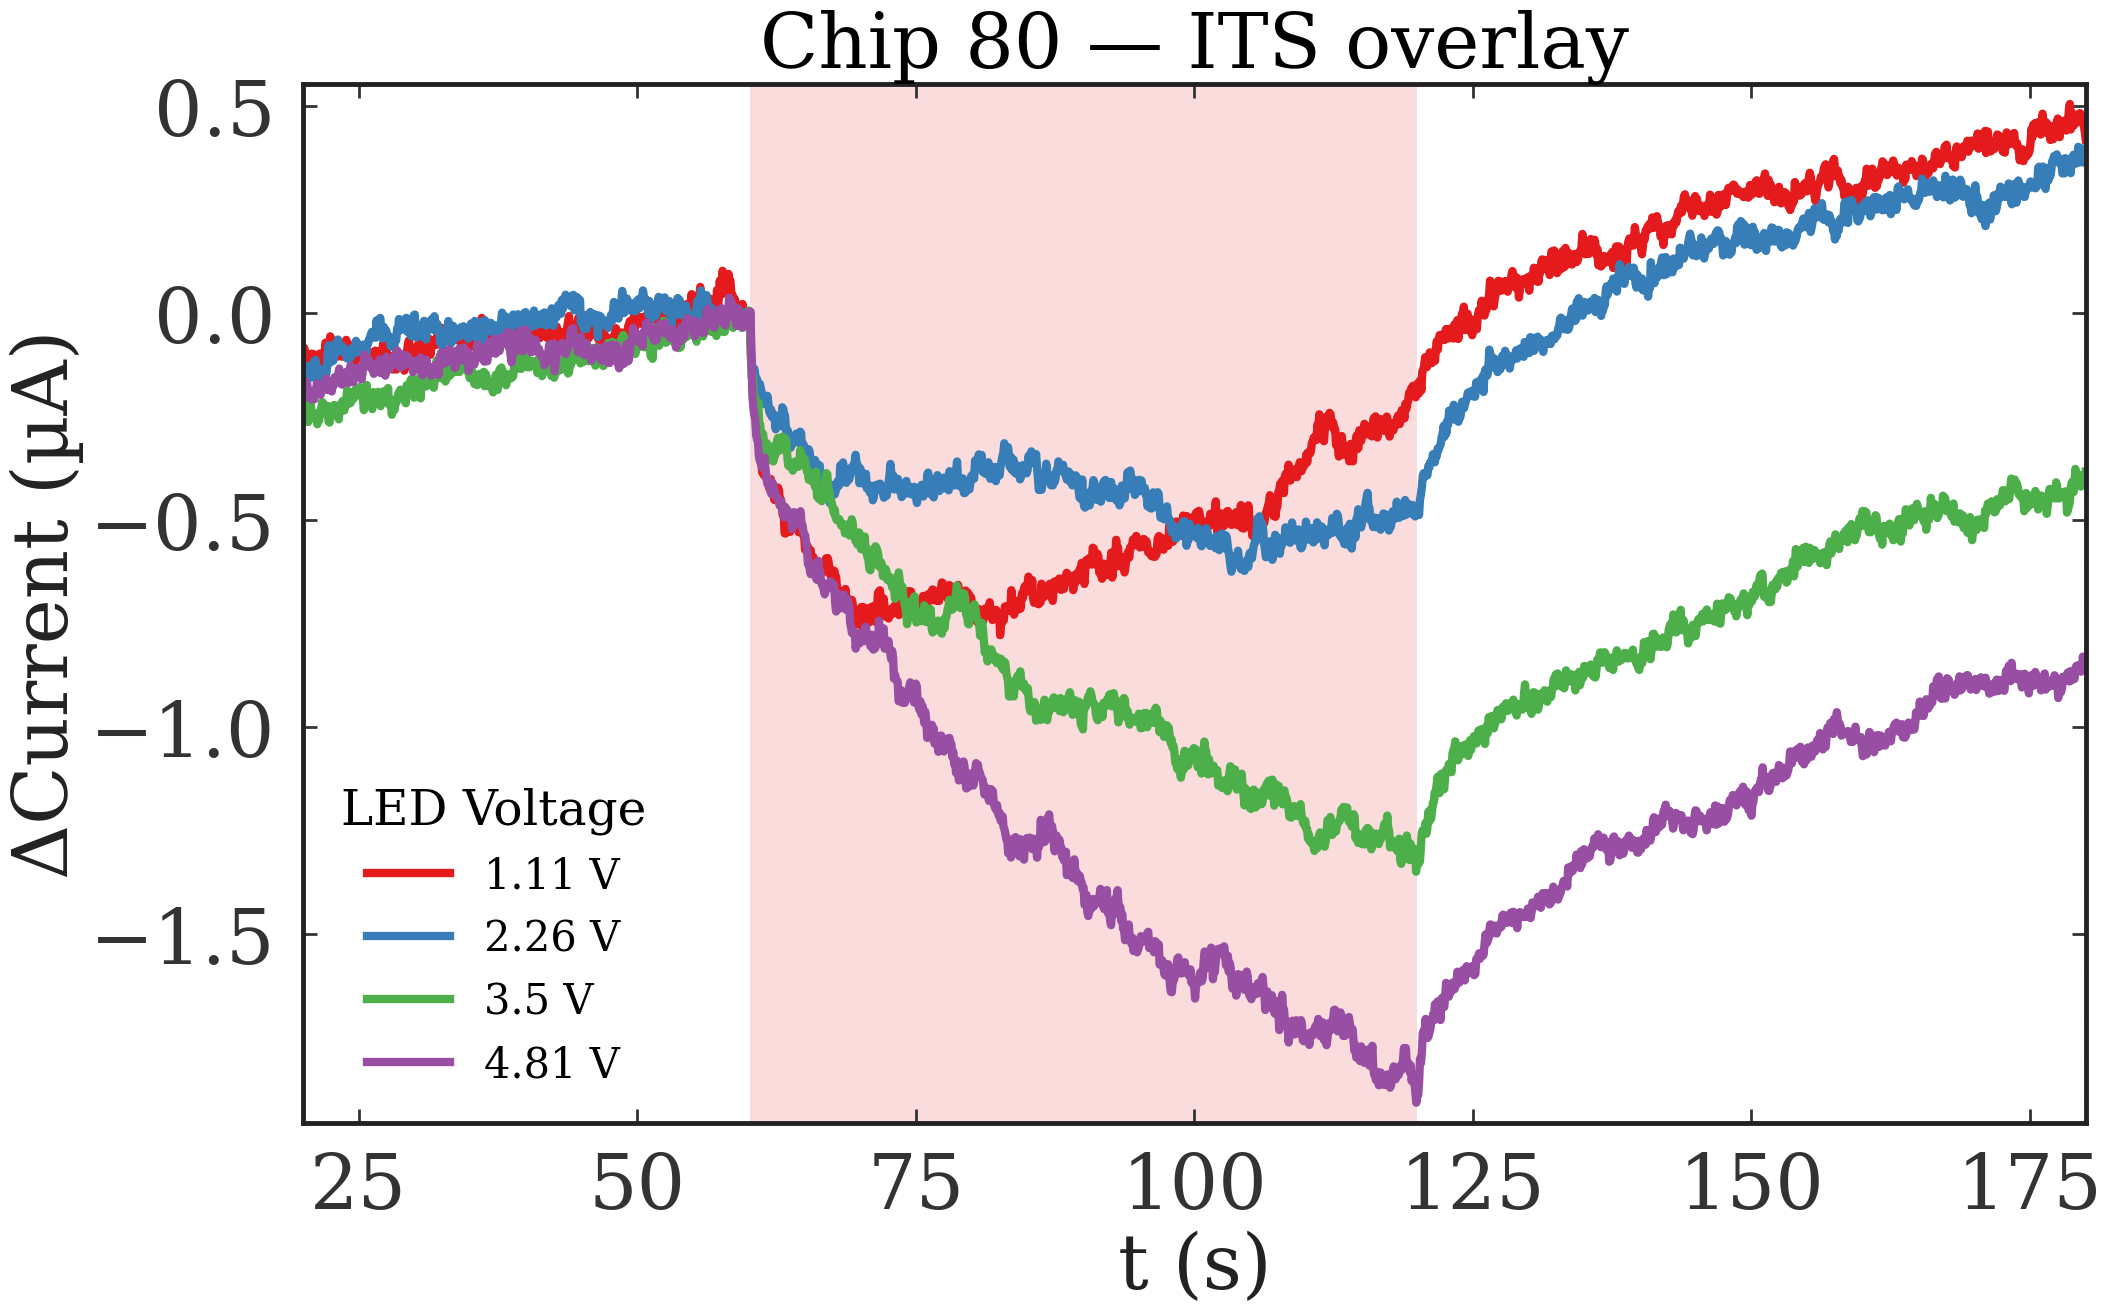

In [10]:
good_its = [1,2,3,4]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip80_ITS_overlay_metadata.png


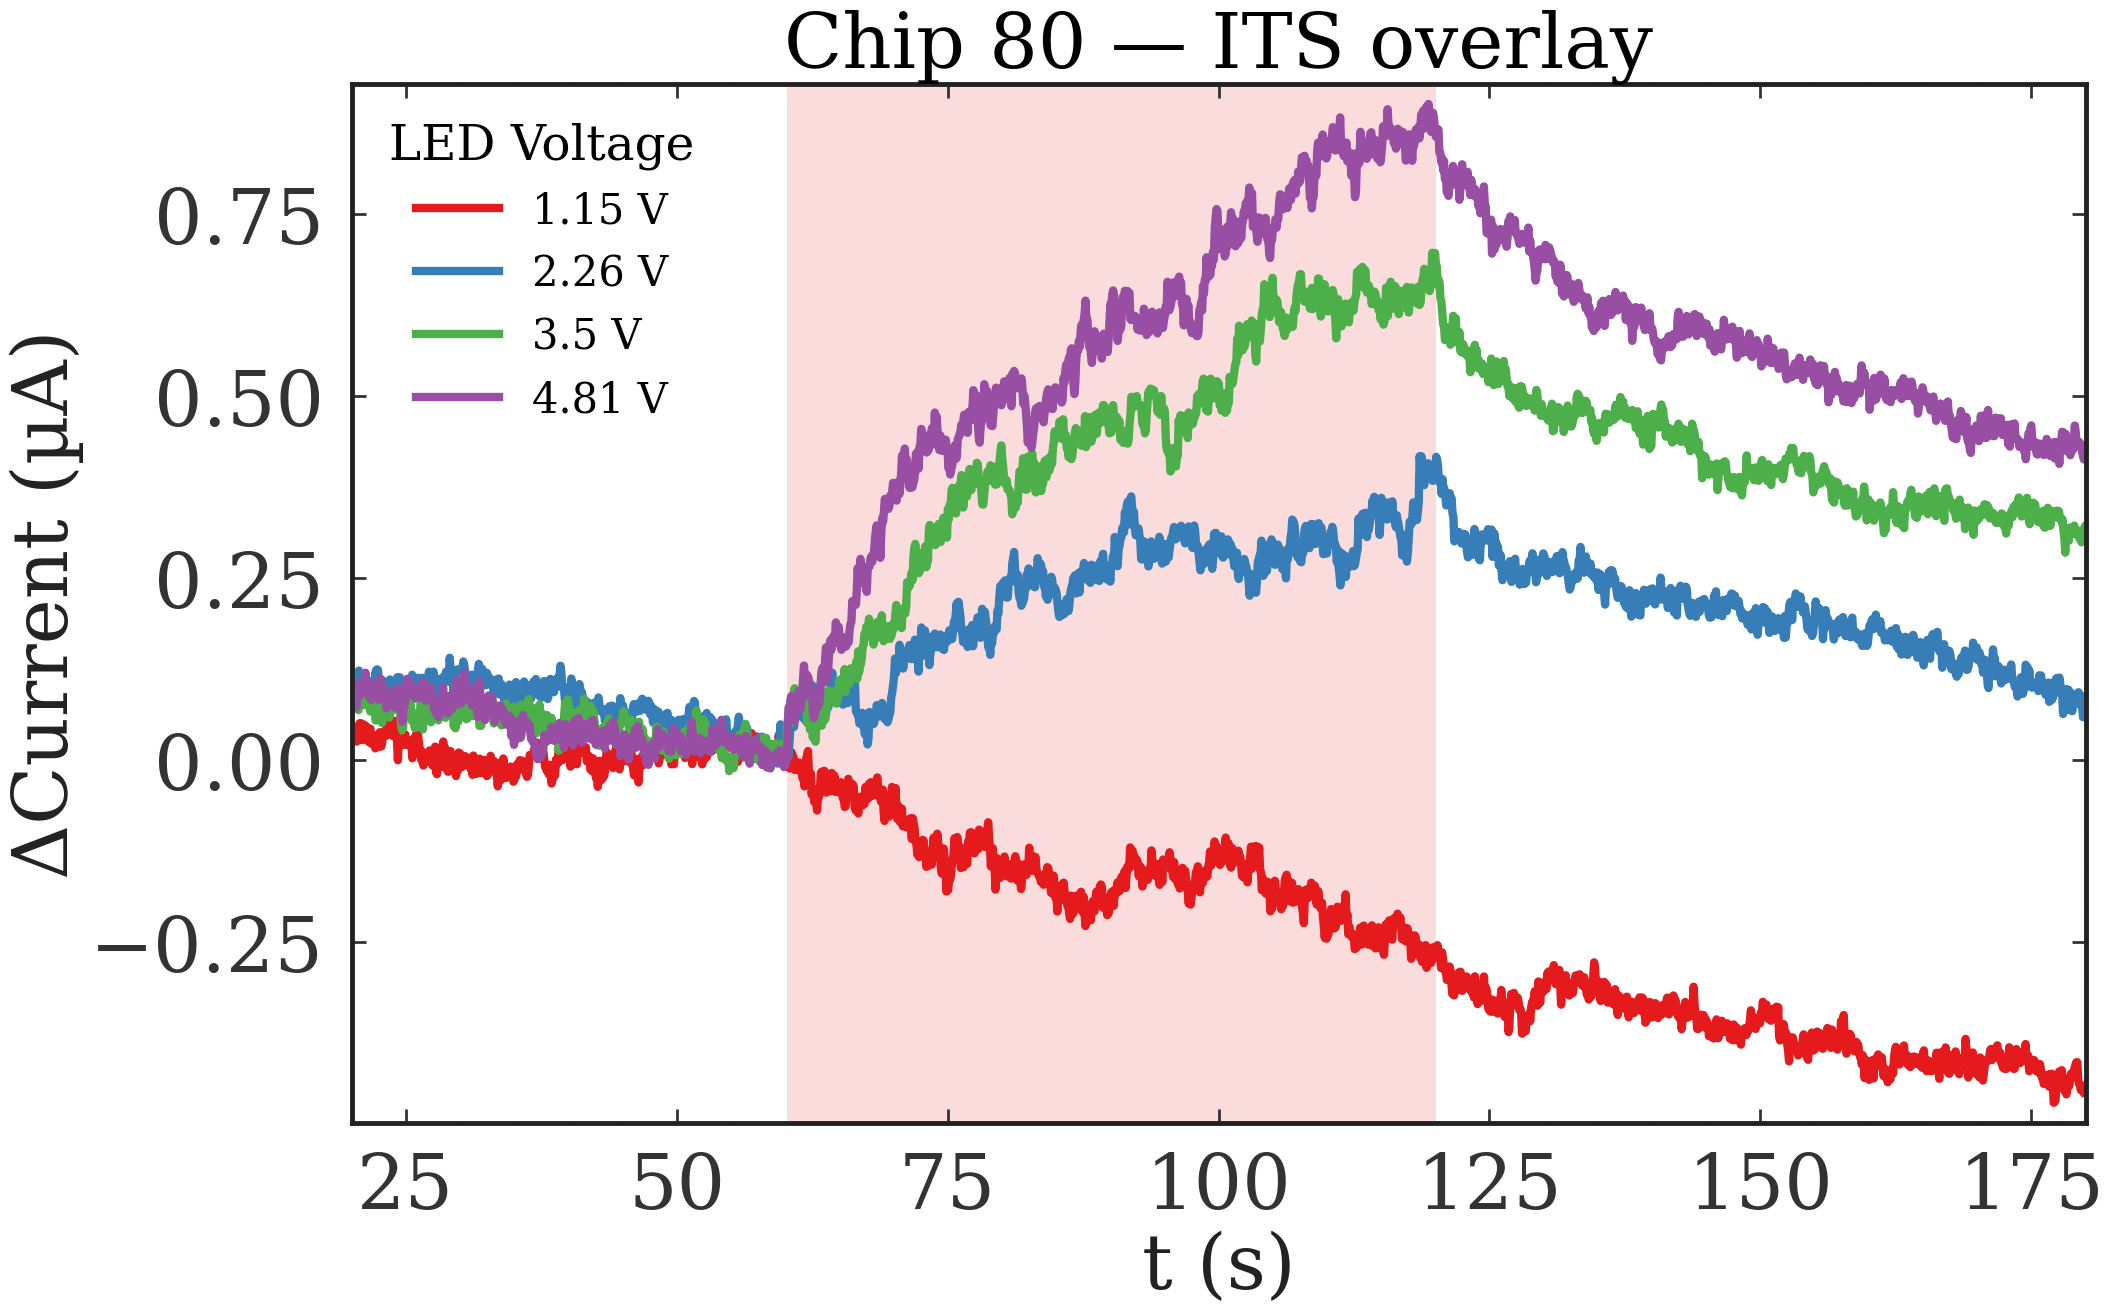

In [11]:
good_its = [5,6,7,8]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


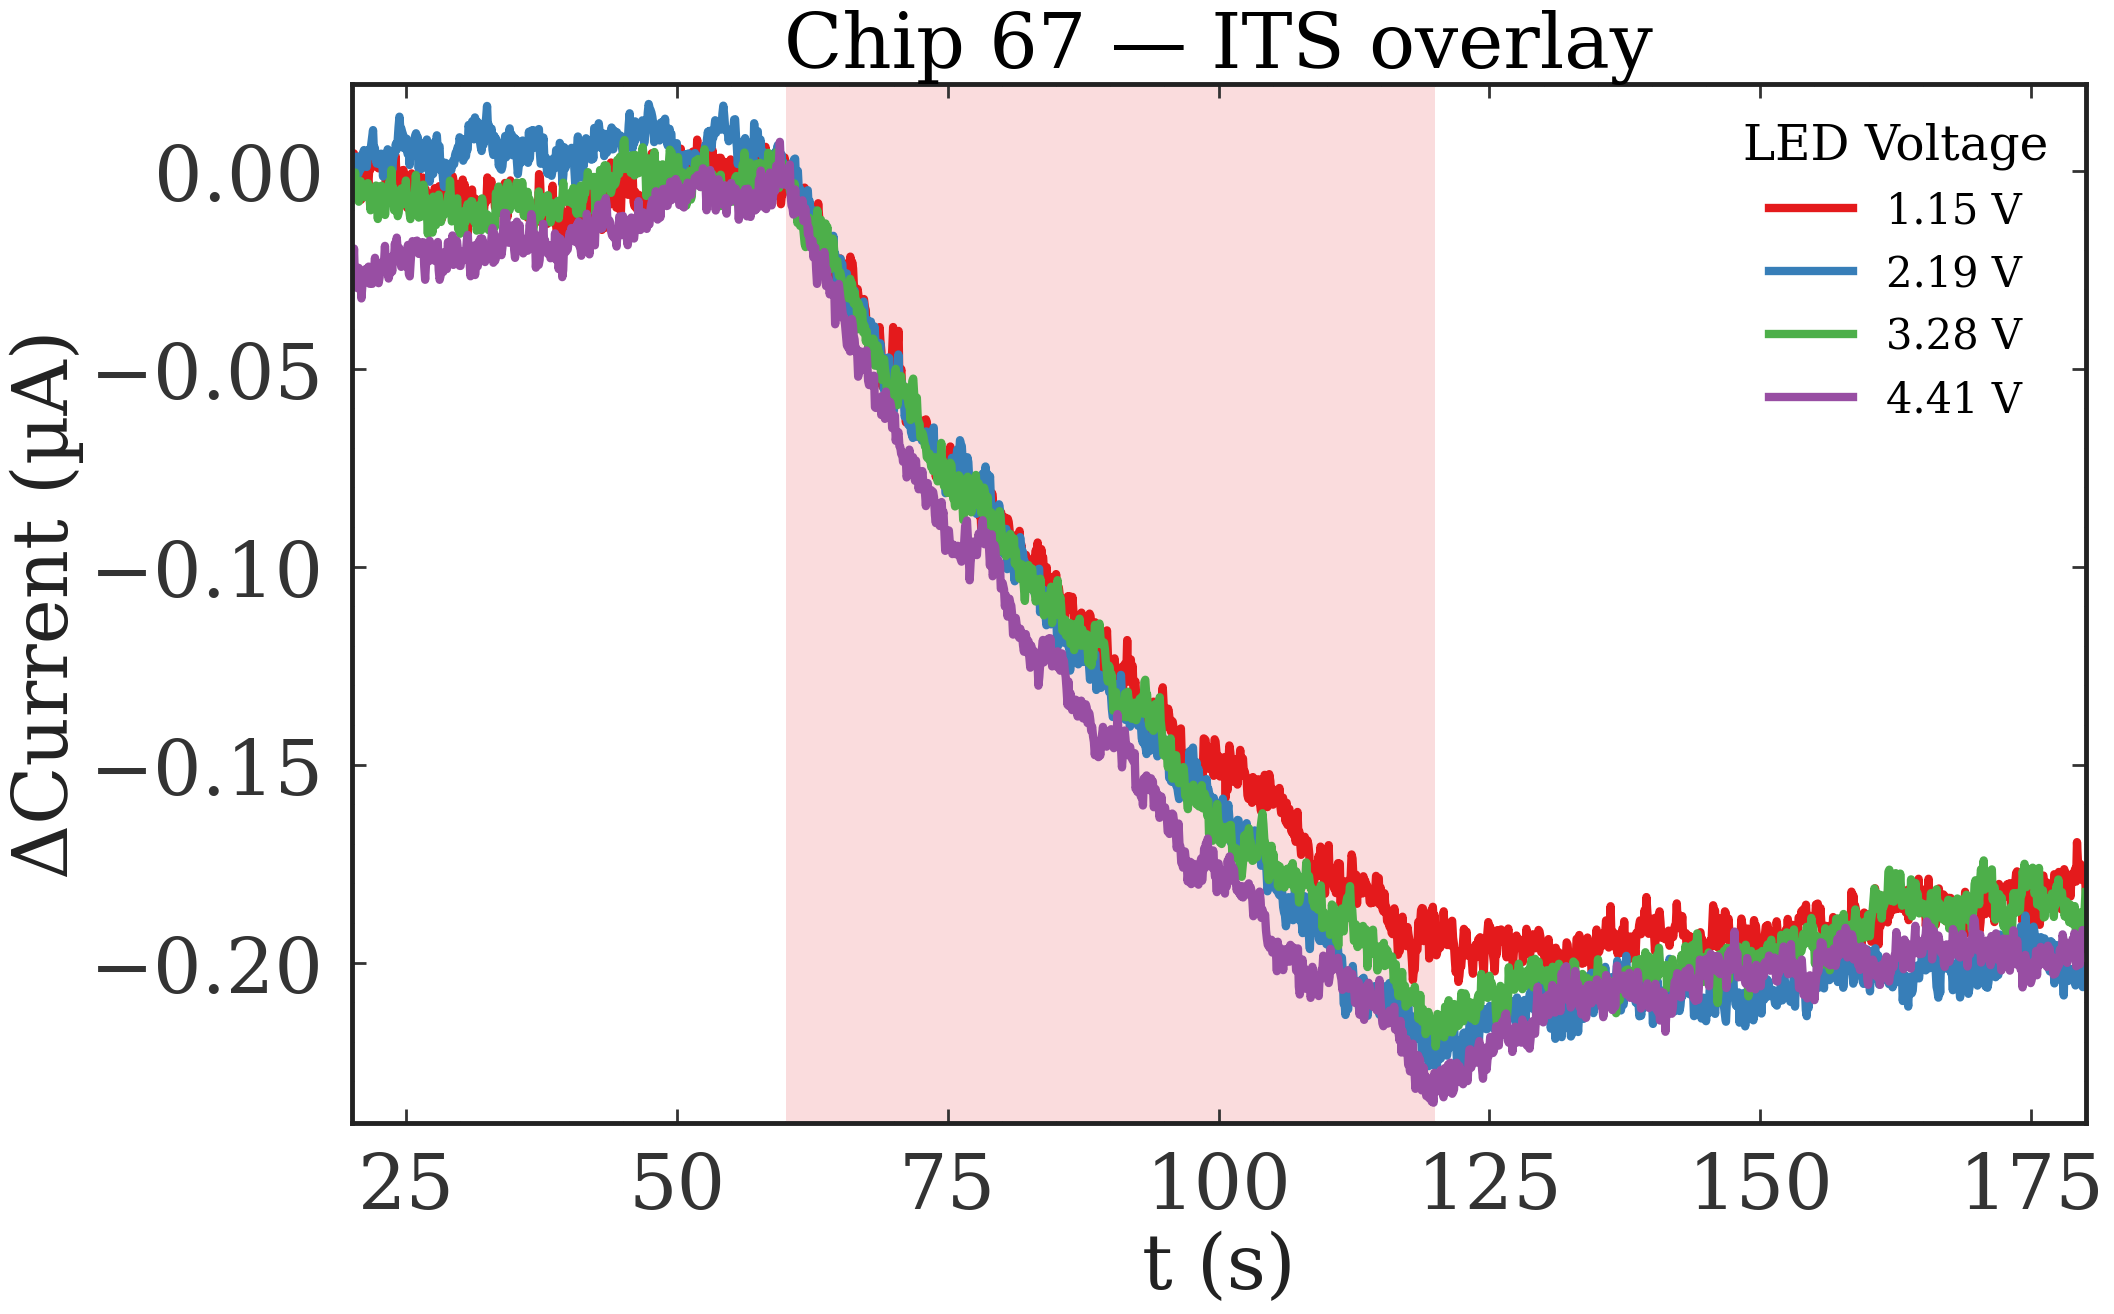

In [12]:
CHIP_NUMBER  = 67.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem


good_its = [10,11,12,13]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


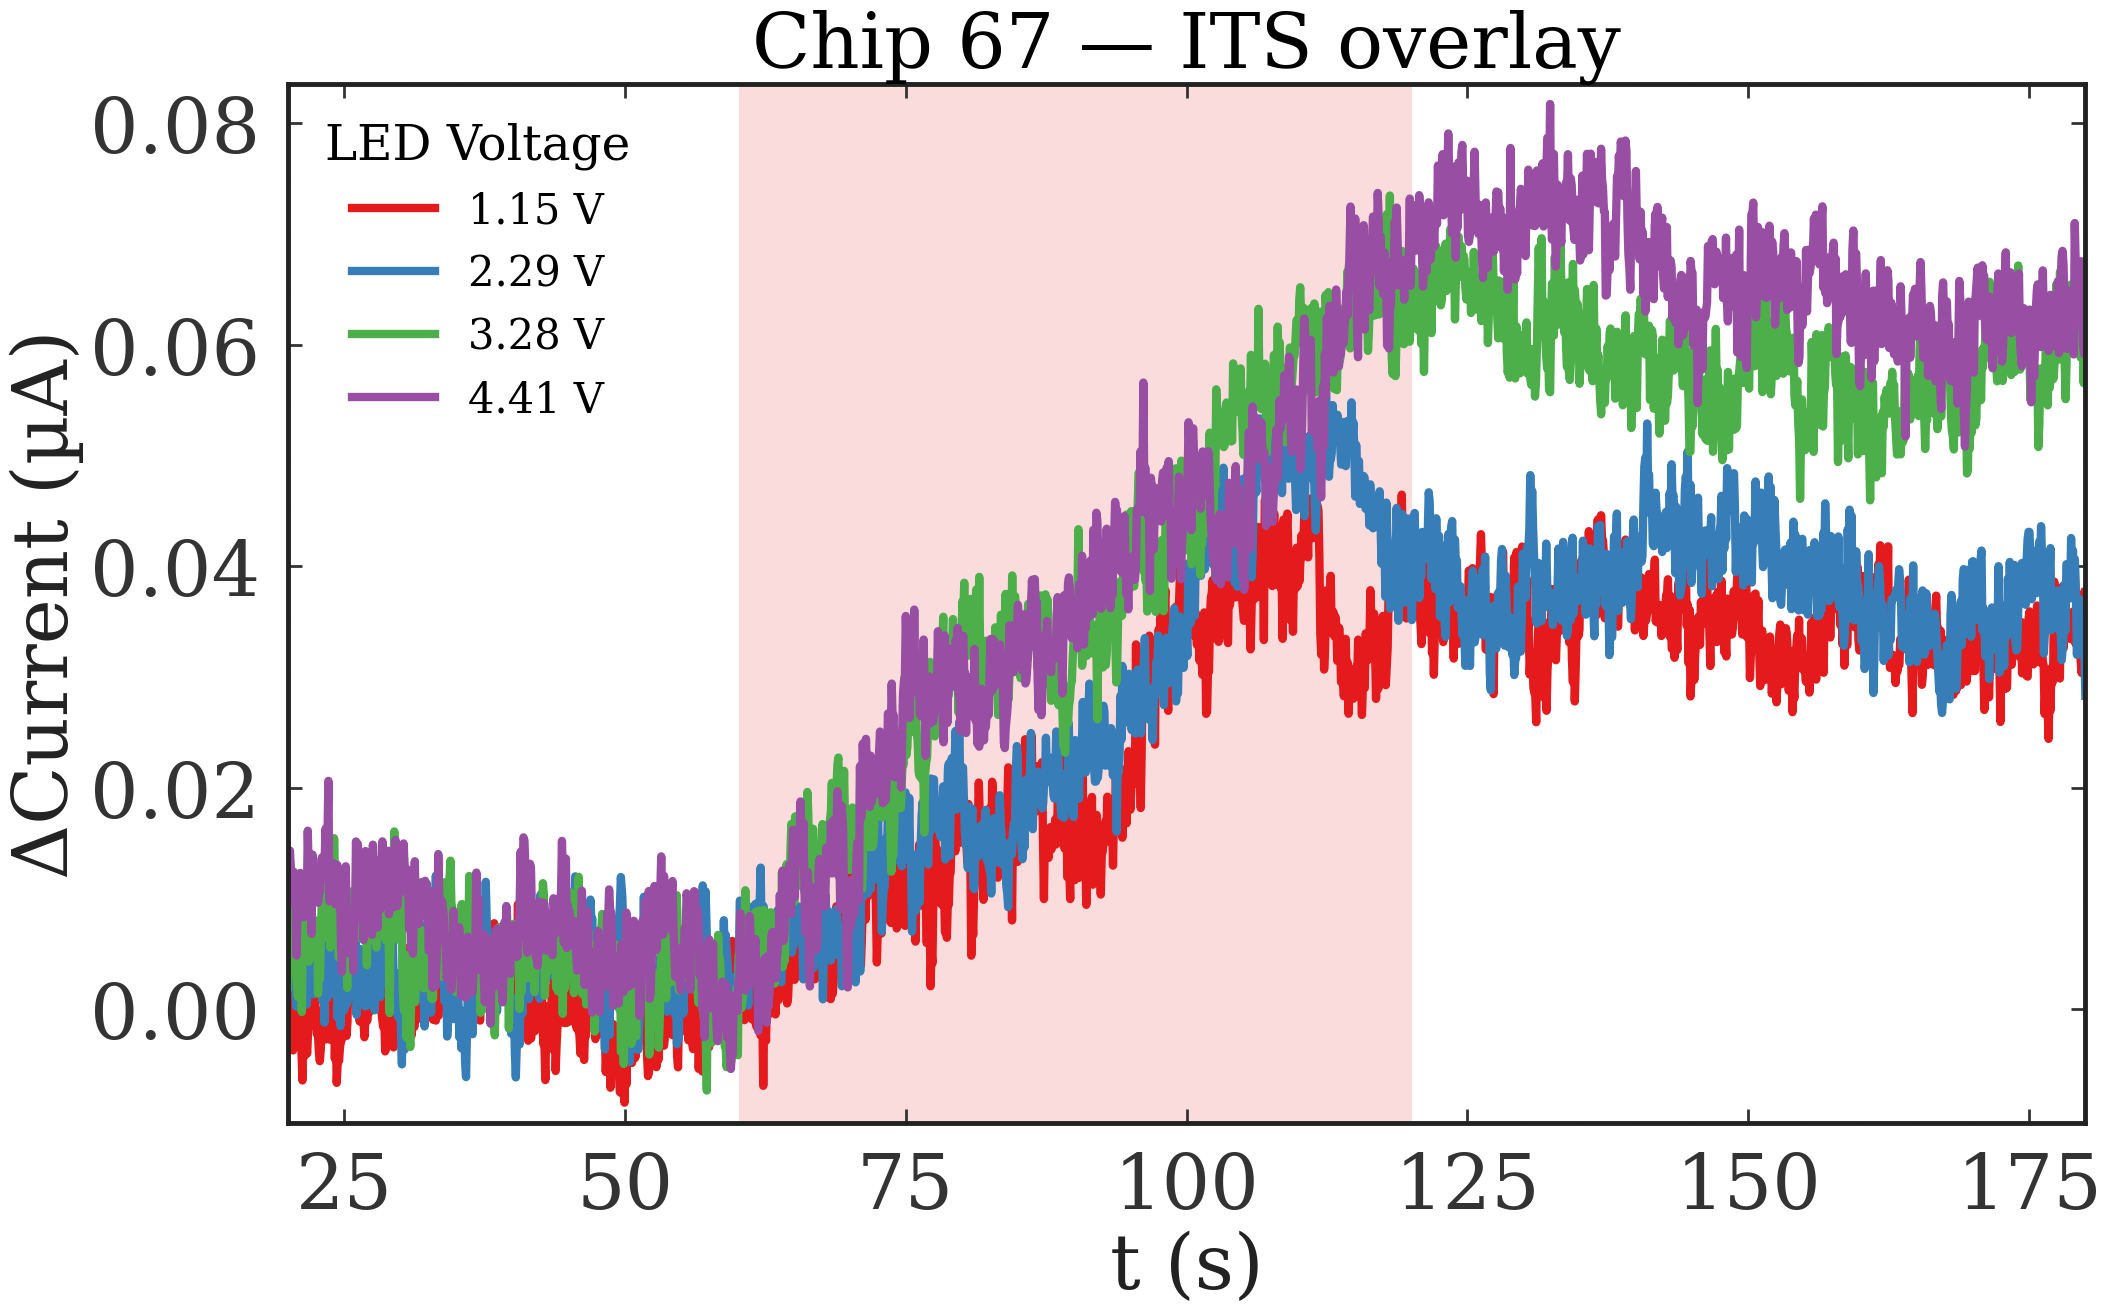

In [13]:
good_its = [14,15,16,17]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


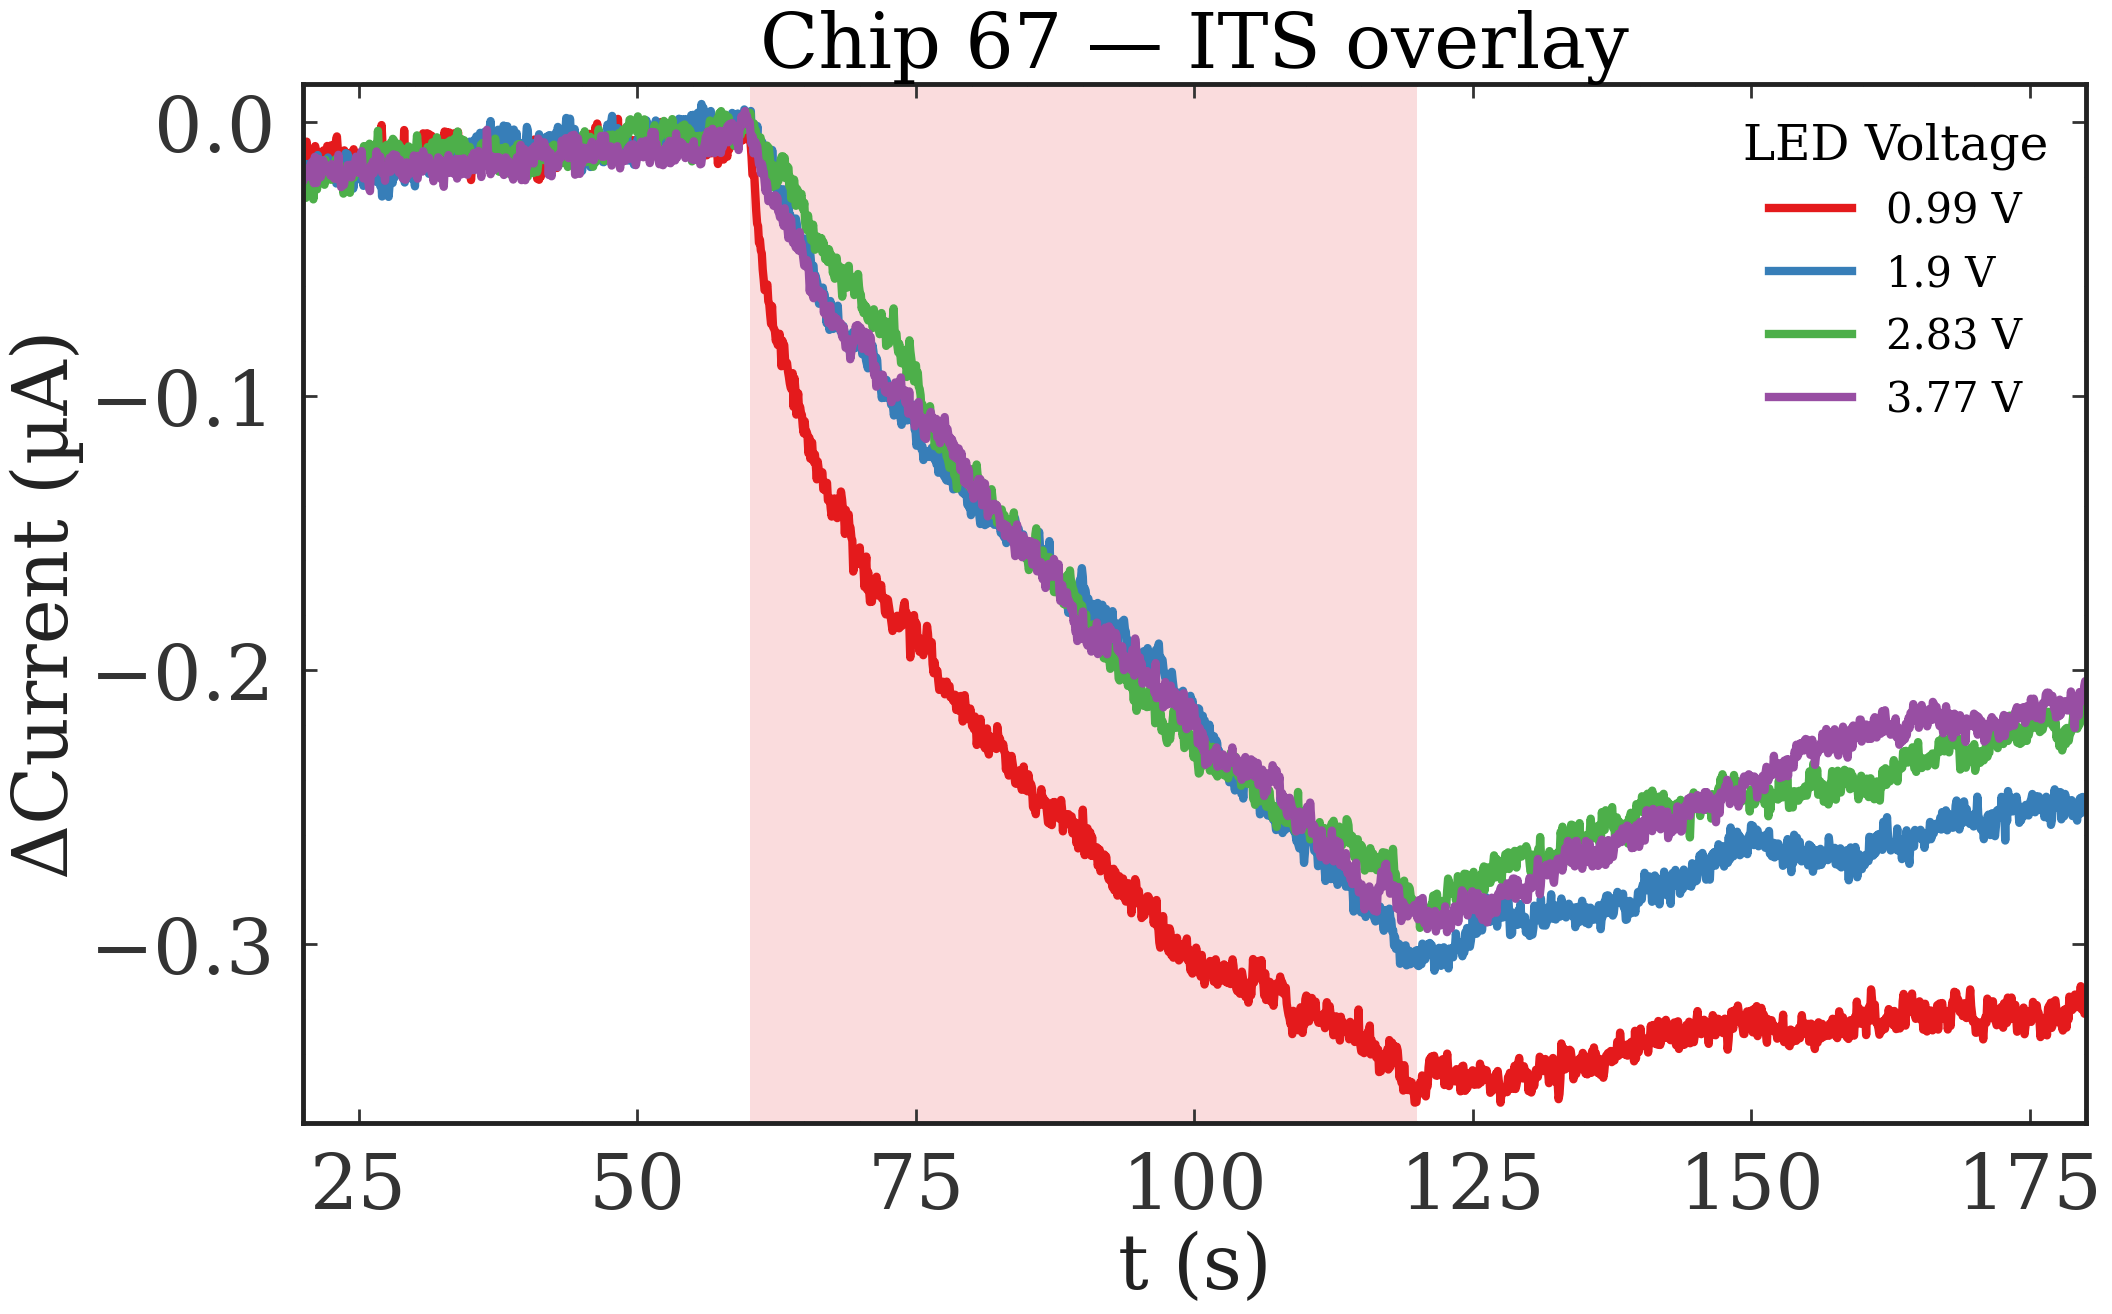

In [14]:
good_its = [18,19,20,21]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


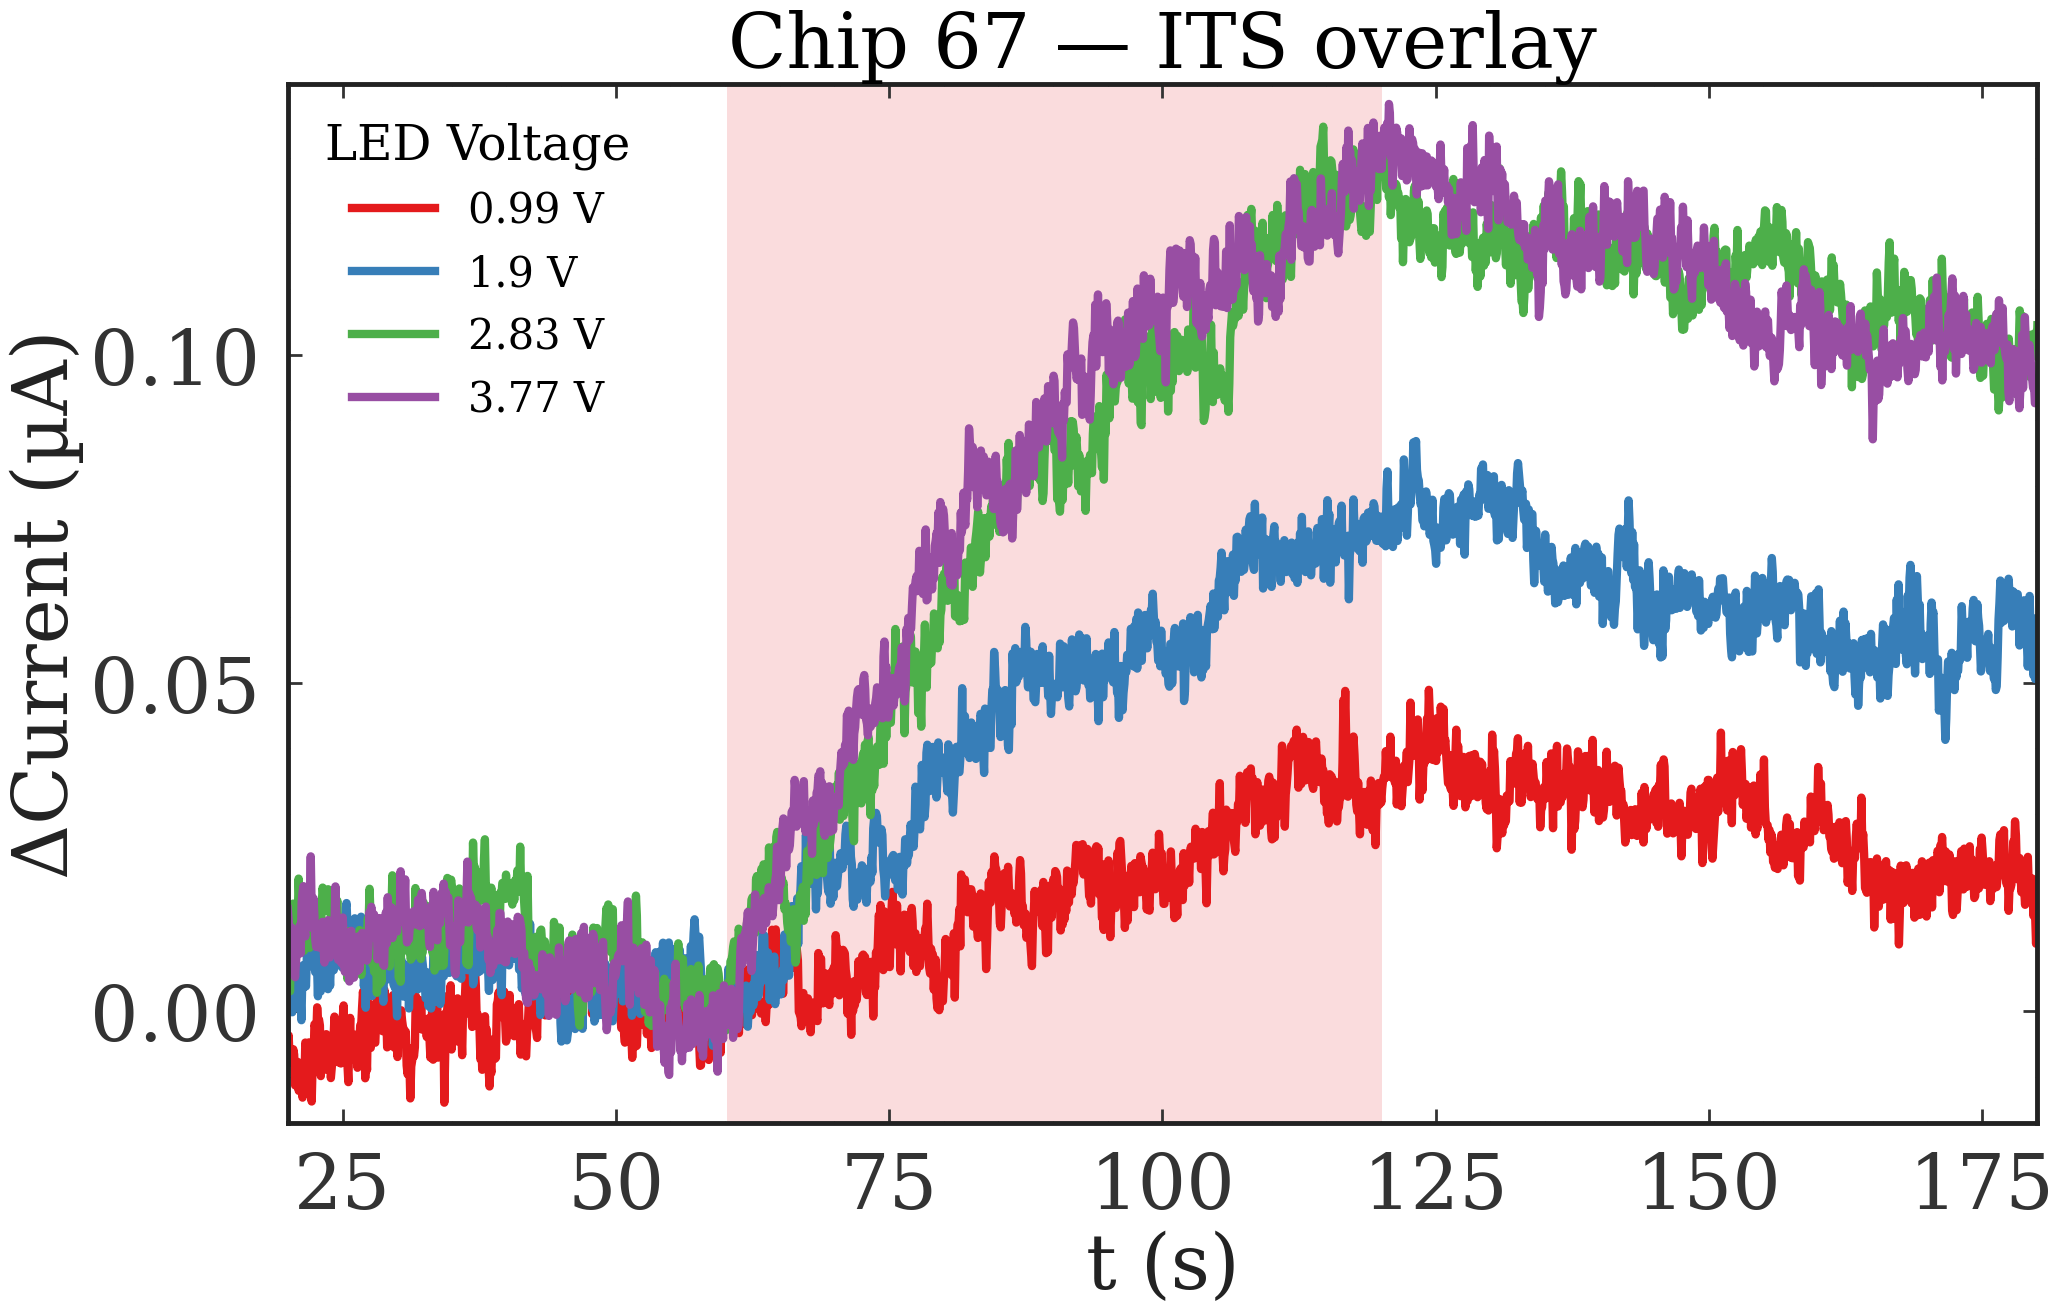

In [15]:
good_its = [22,23,24,25]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


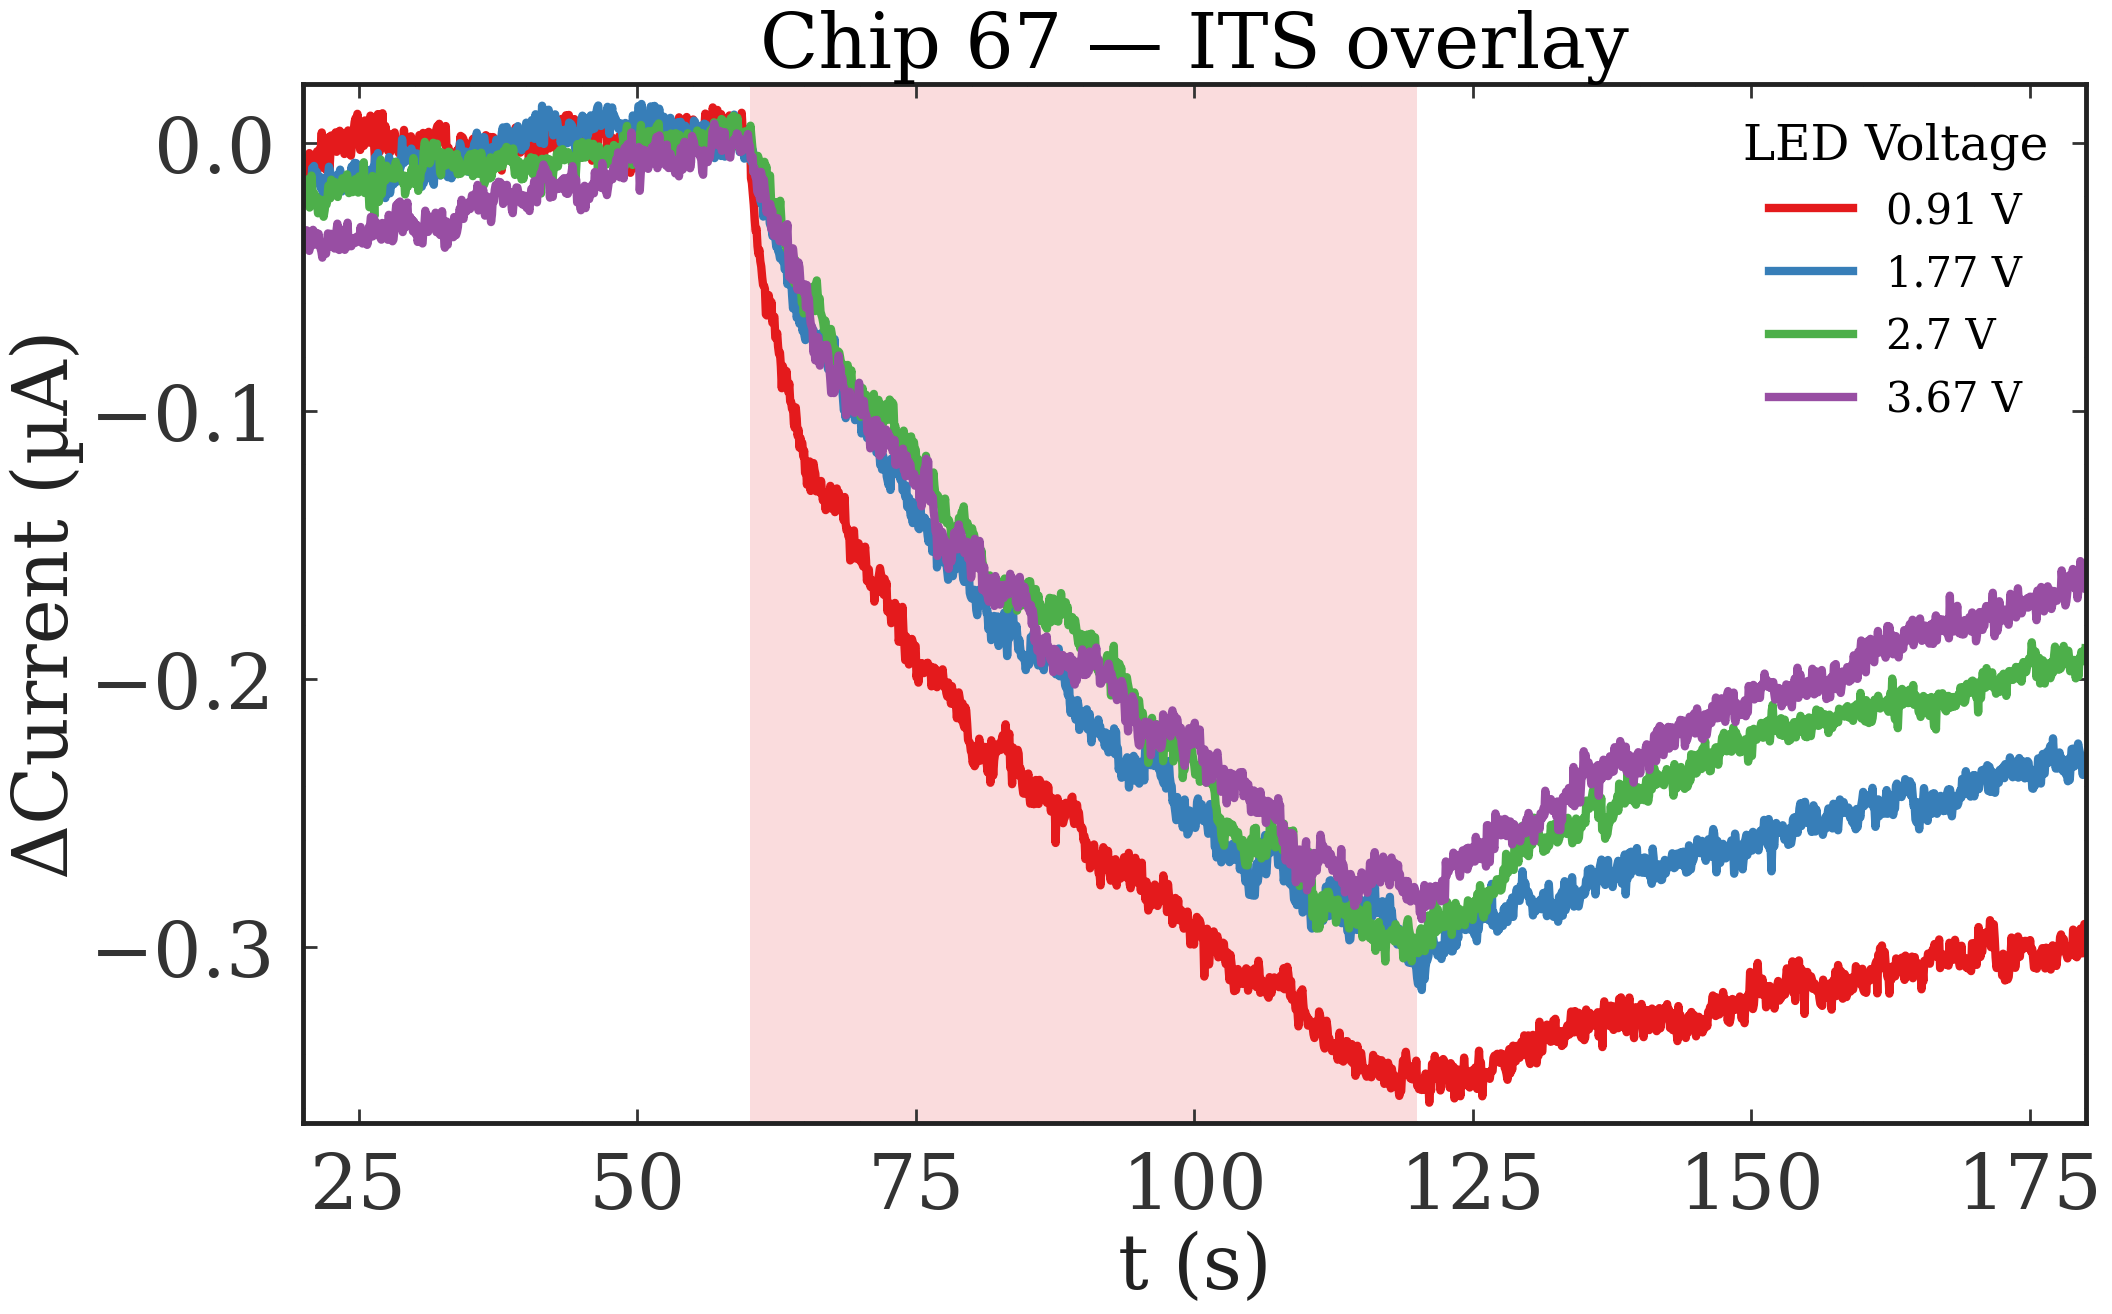

In [16]:
good_its = [26,27,28,29]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


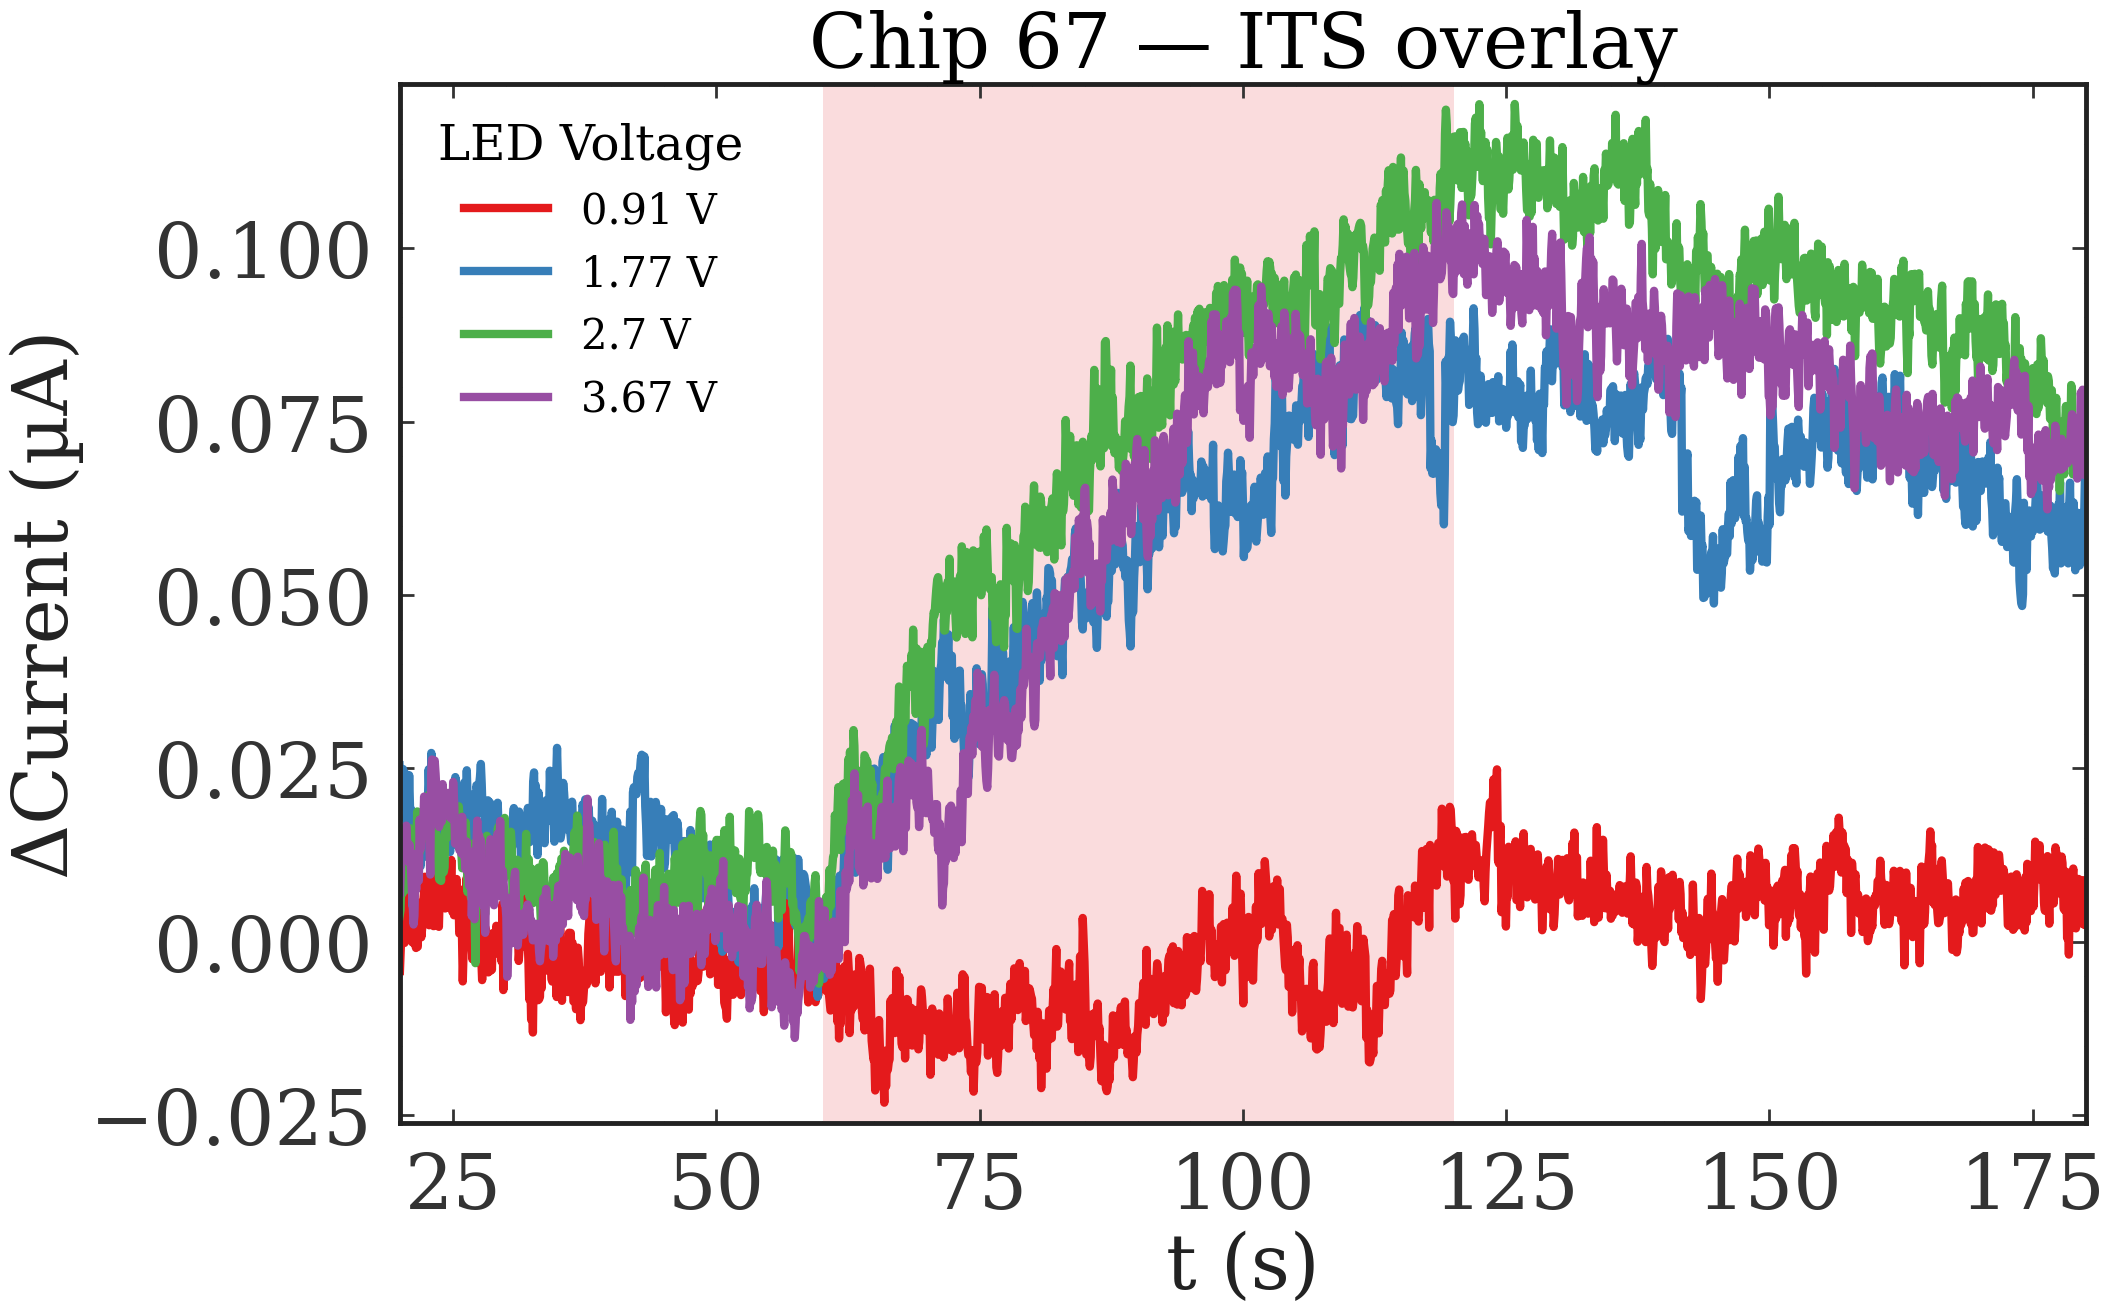

In [17]:
good_its = [30,31,32,33]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


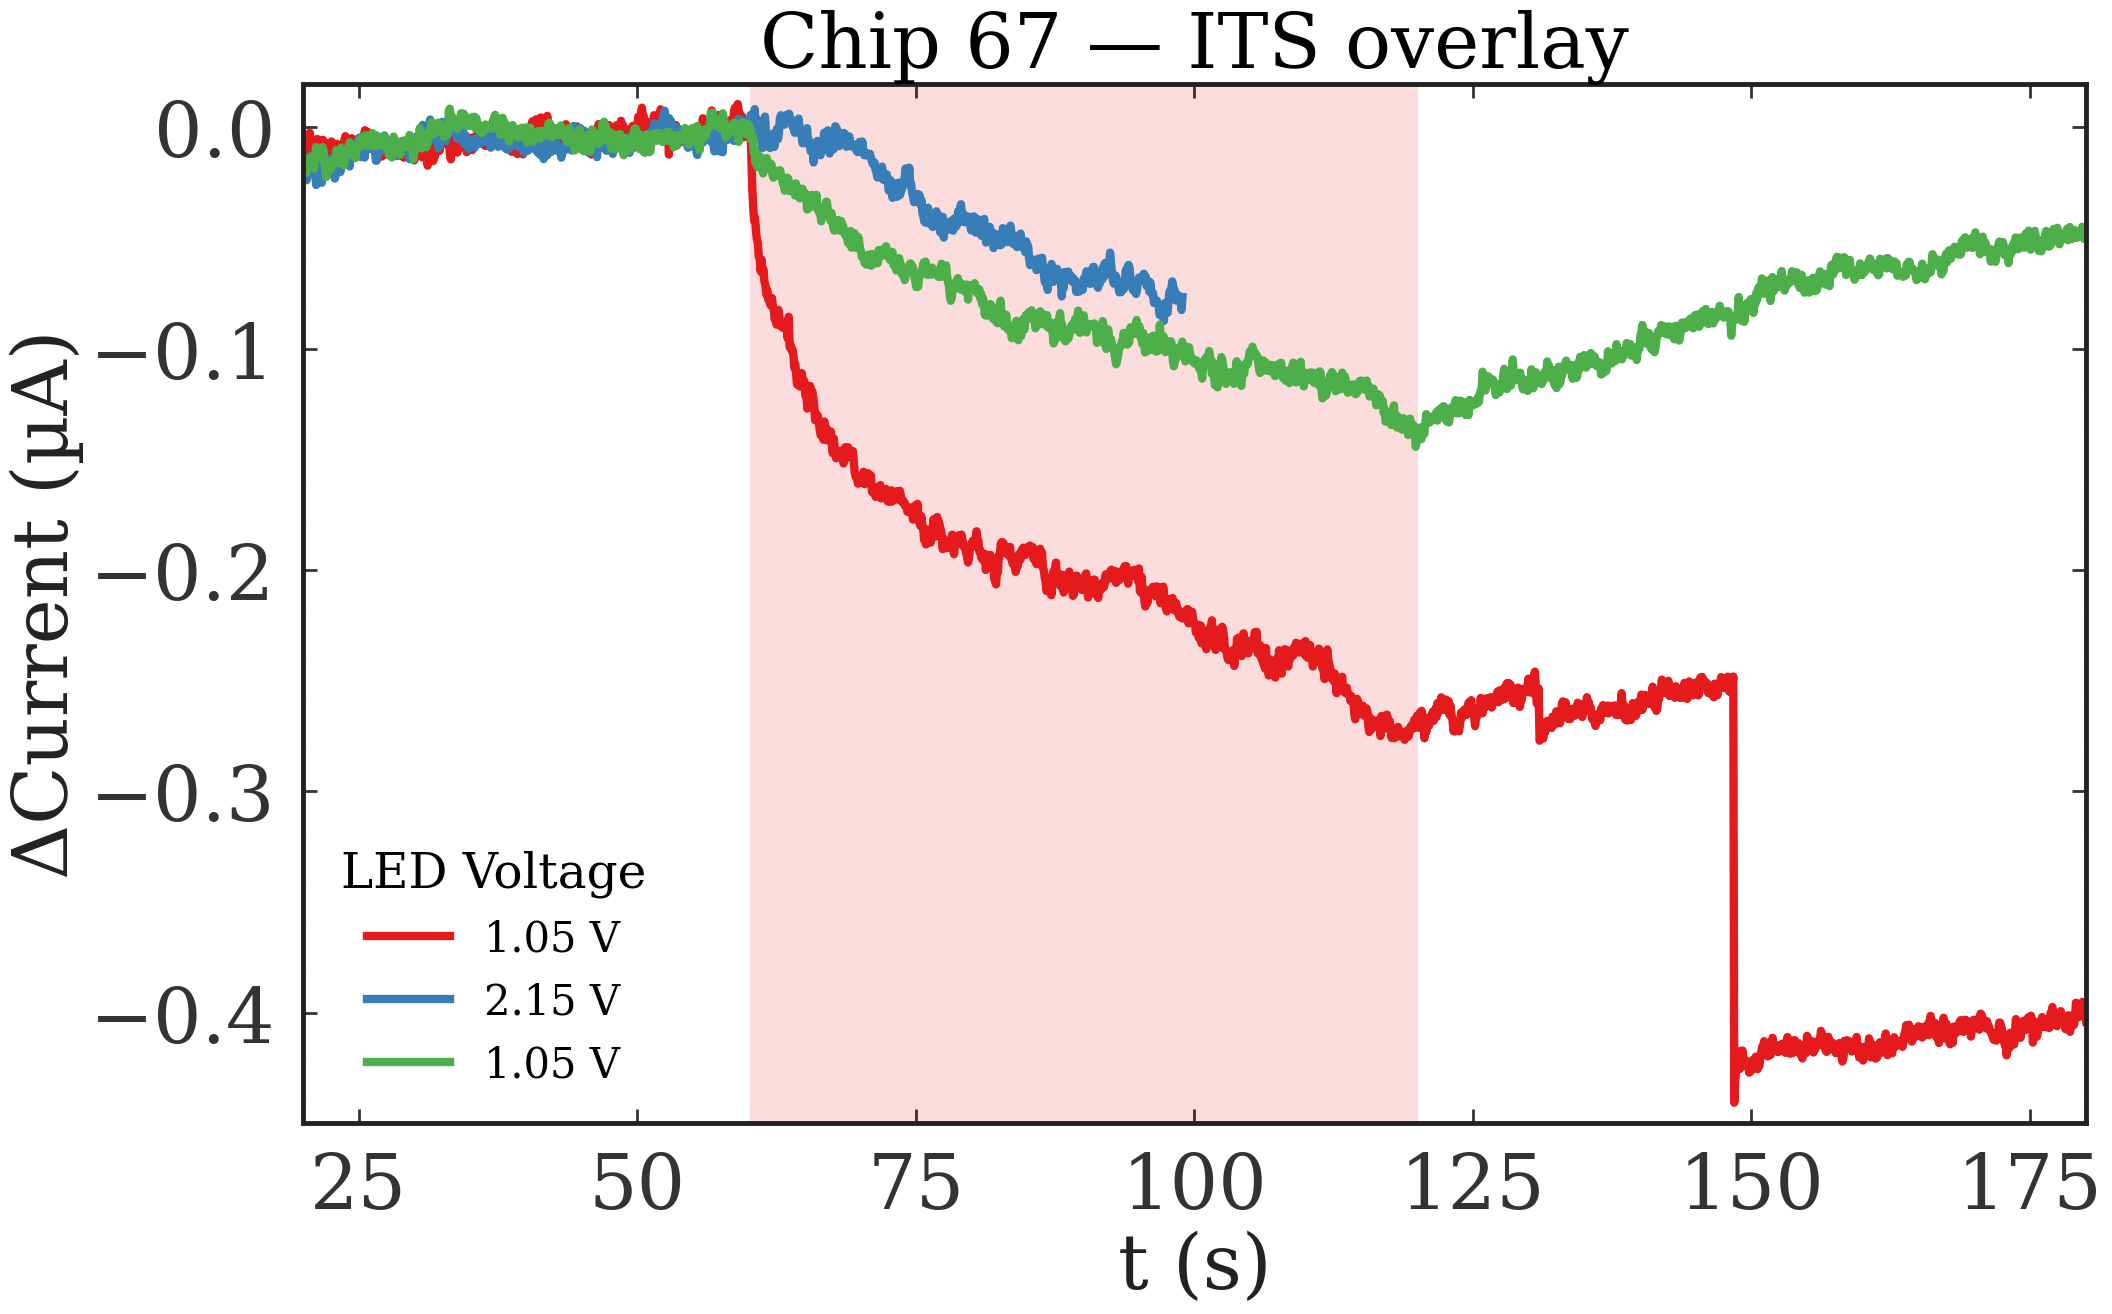

In [18]:
good_its = [34,35,36]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/chip67_ITS_overlay_metadata.png


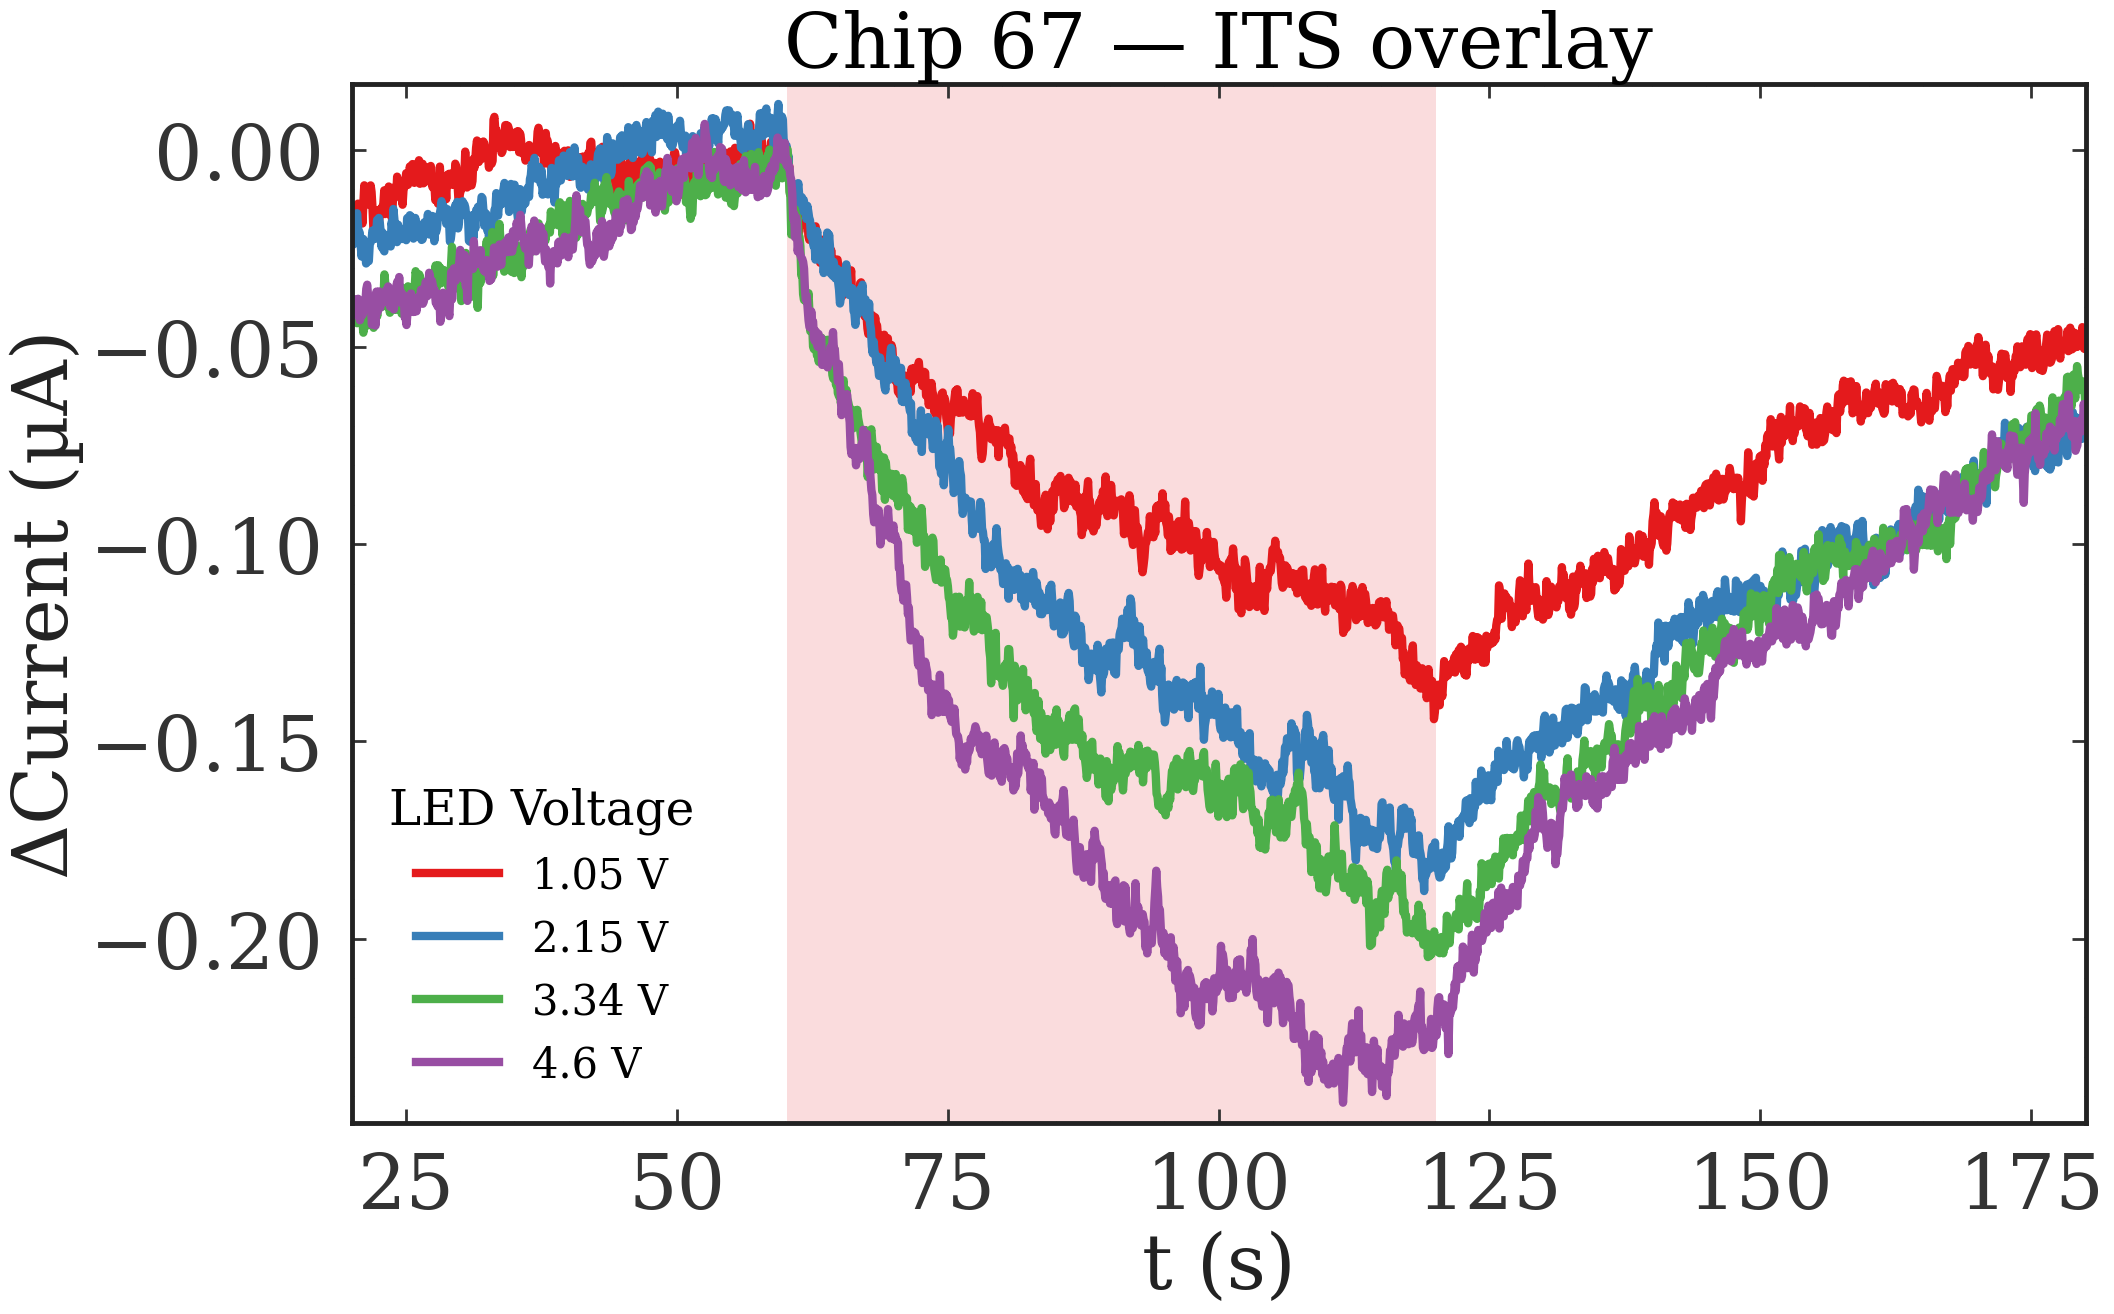

In [19]:
good_its = [36,37,38,39]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")

saved figs/Encap67_IVg_sequence_metadata.png


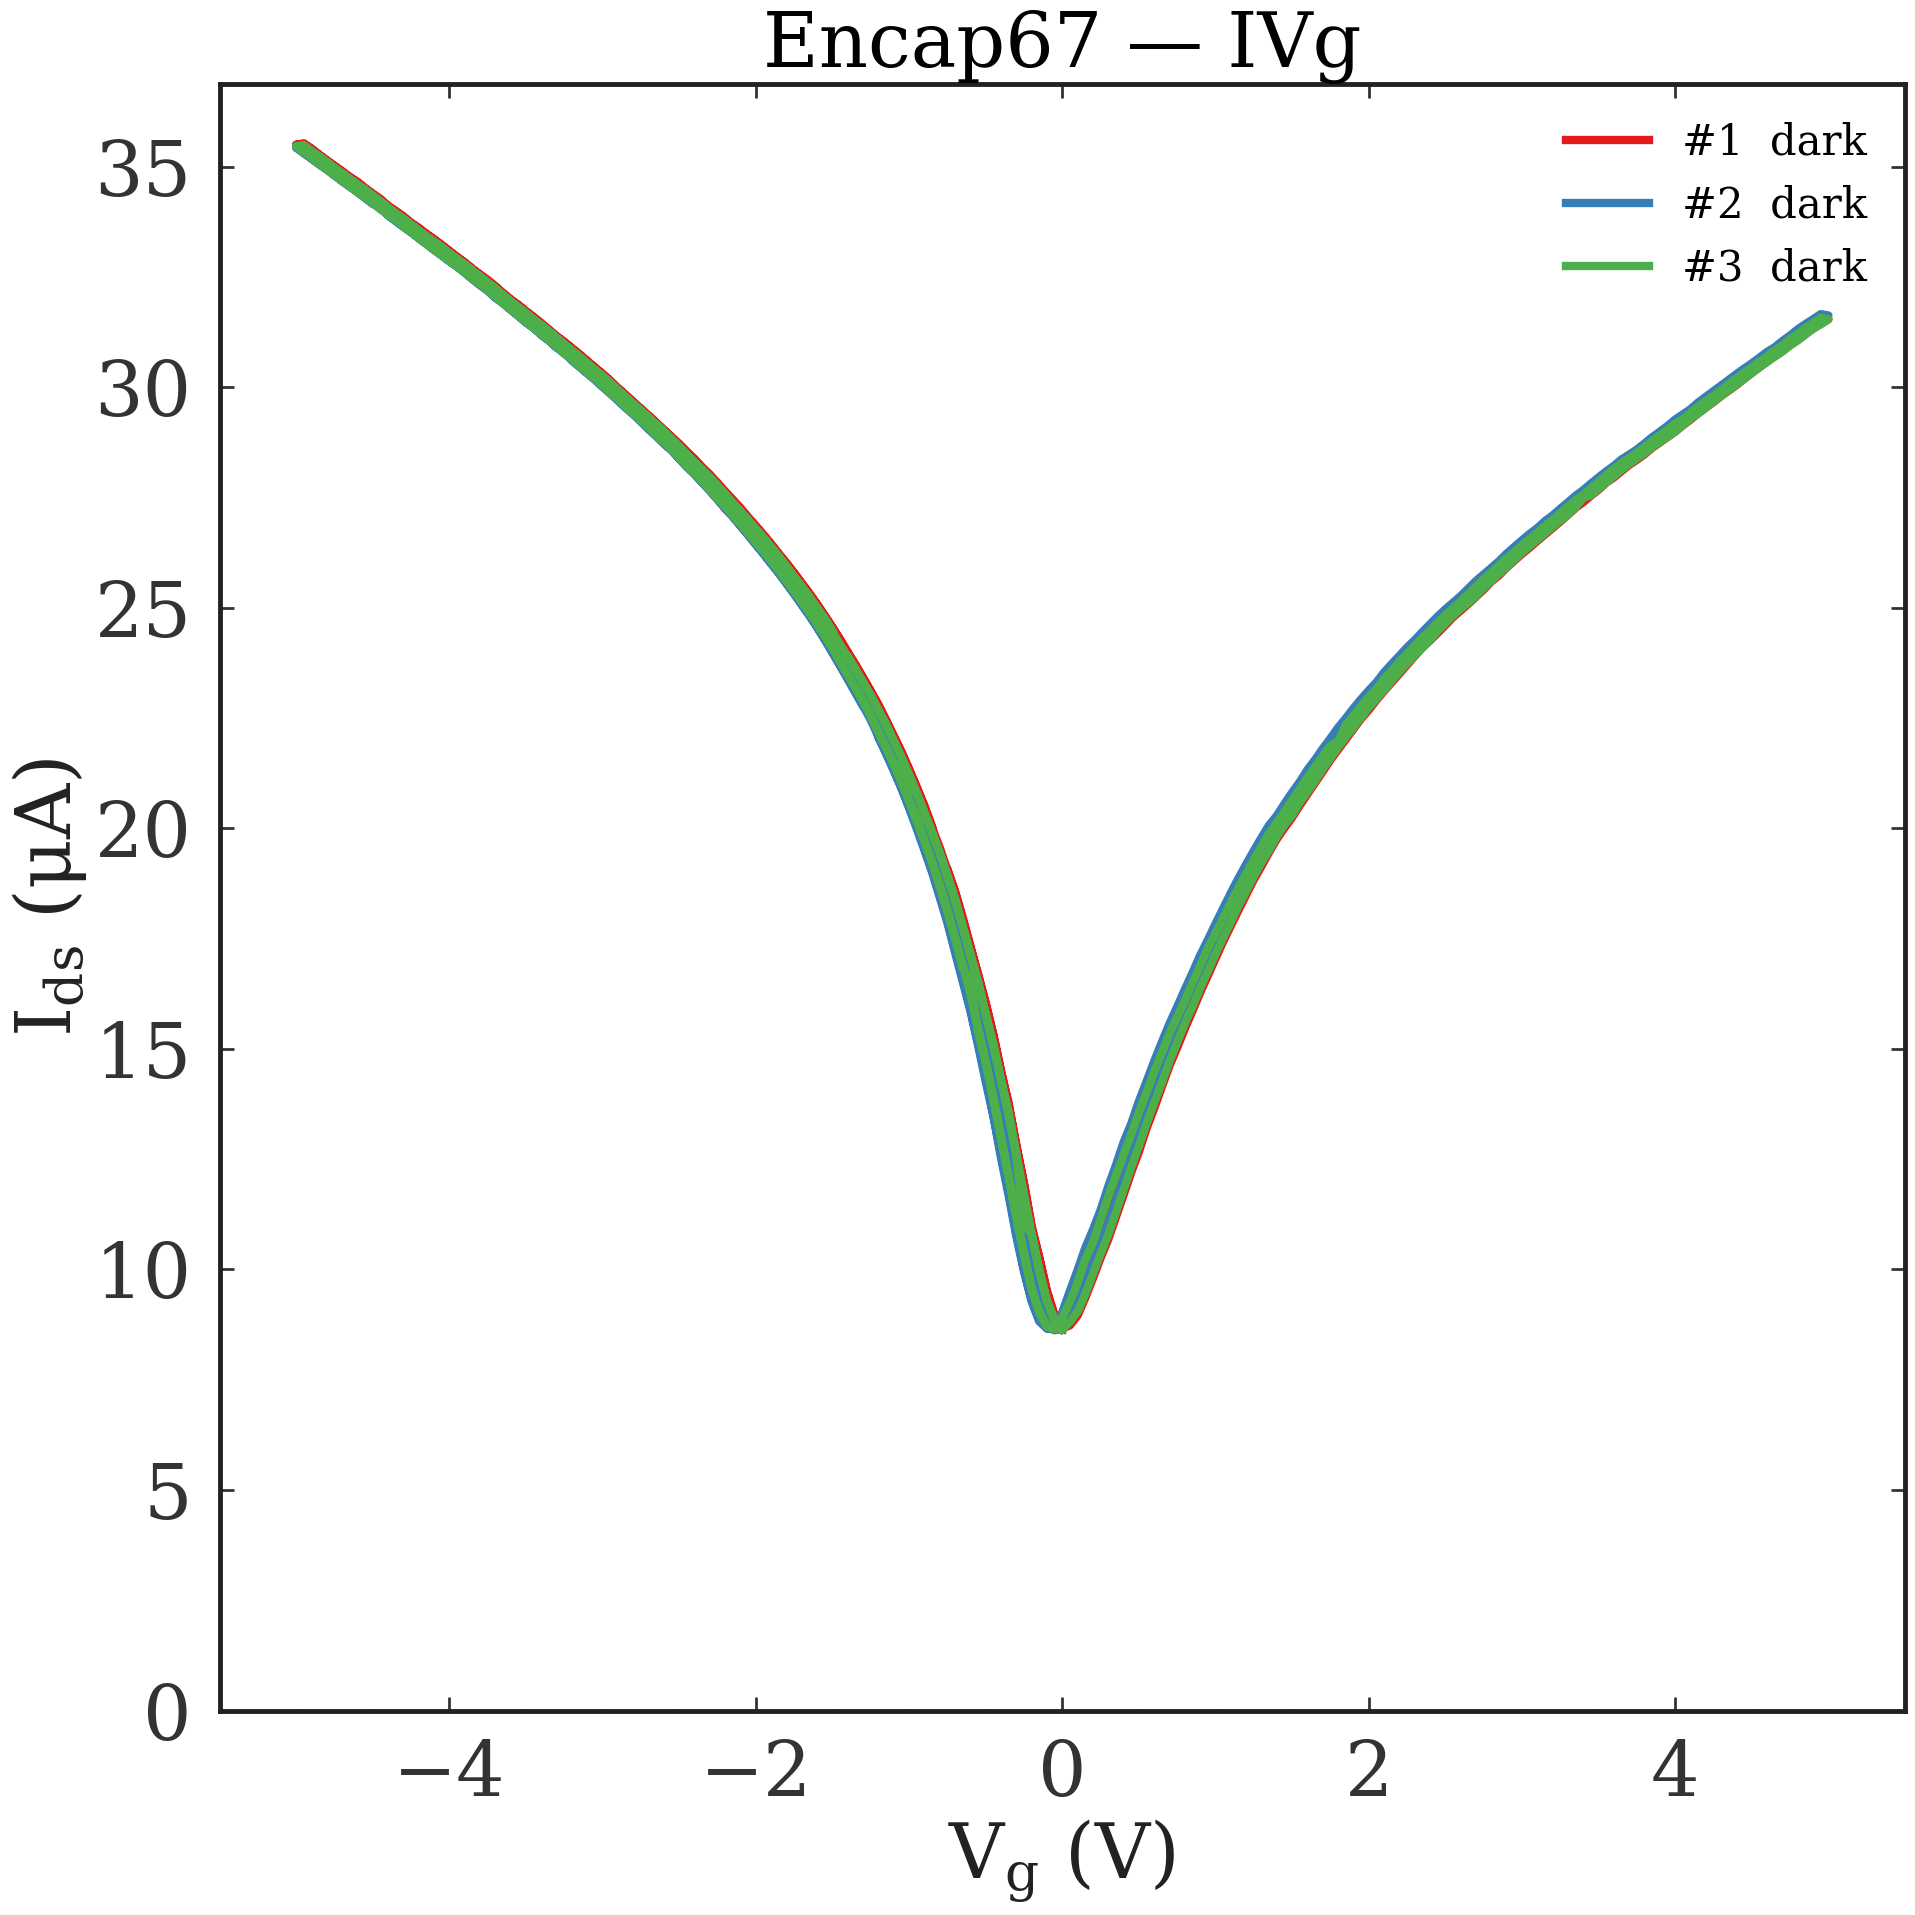

In [20]:
METADATA_CSV = "metadata/2025-10-15/metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 67.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem


# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/chip67_ITS_overlay_metadata.png


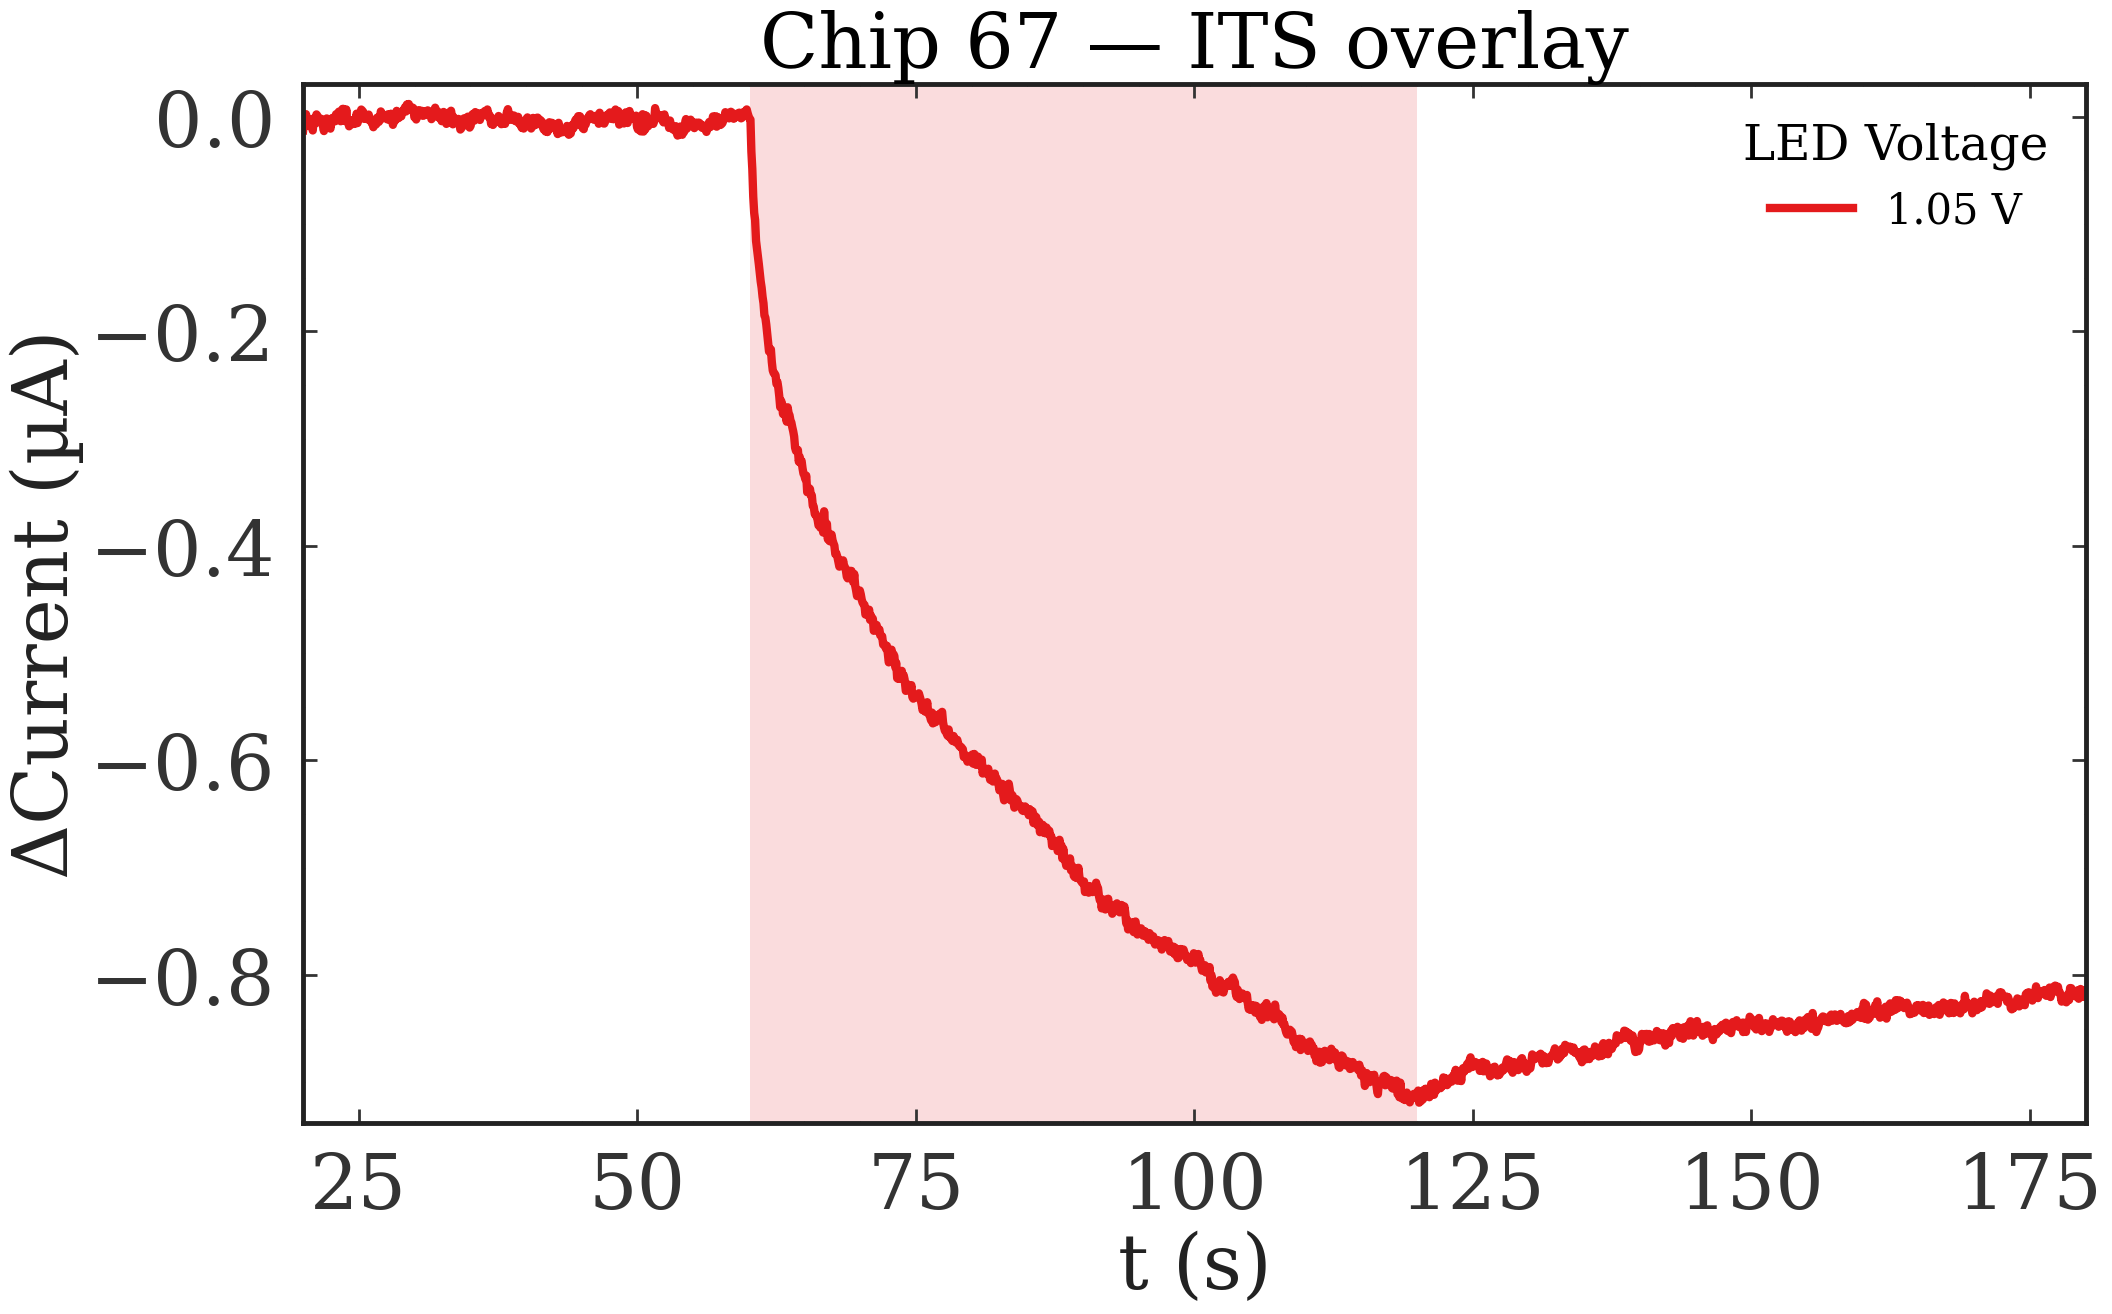

In [21]:
good_its = [1]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta, BASE_DIR, tag, legend_by="led_voltage")

saved figs/Encap67_IVg_sequence_metadata.png


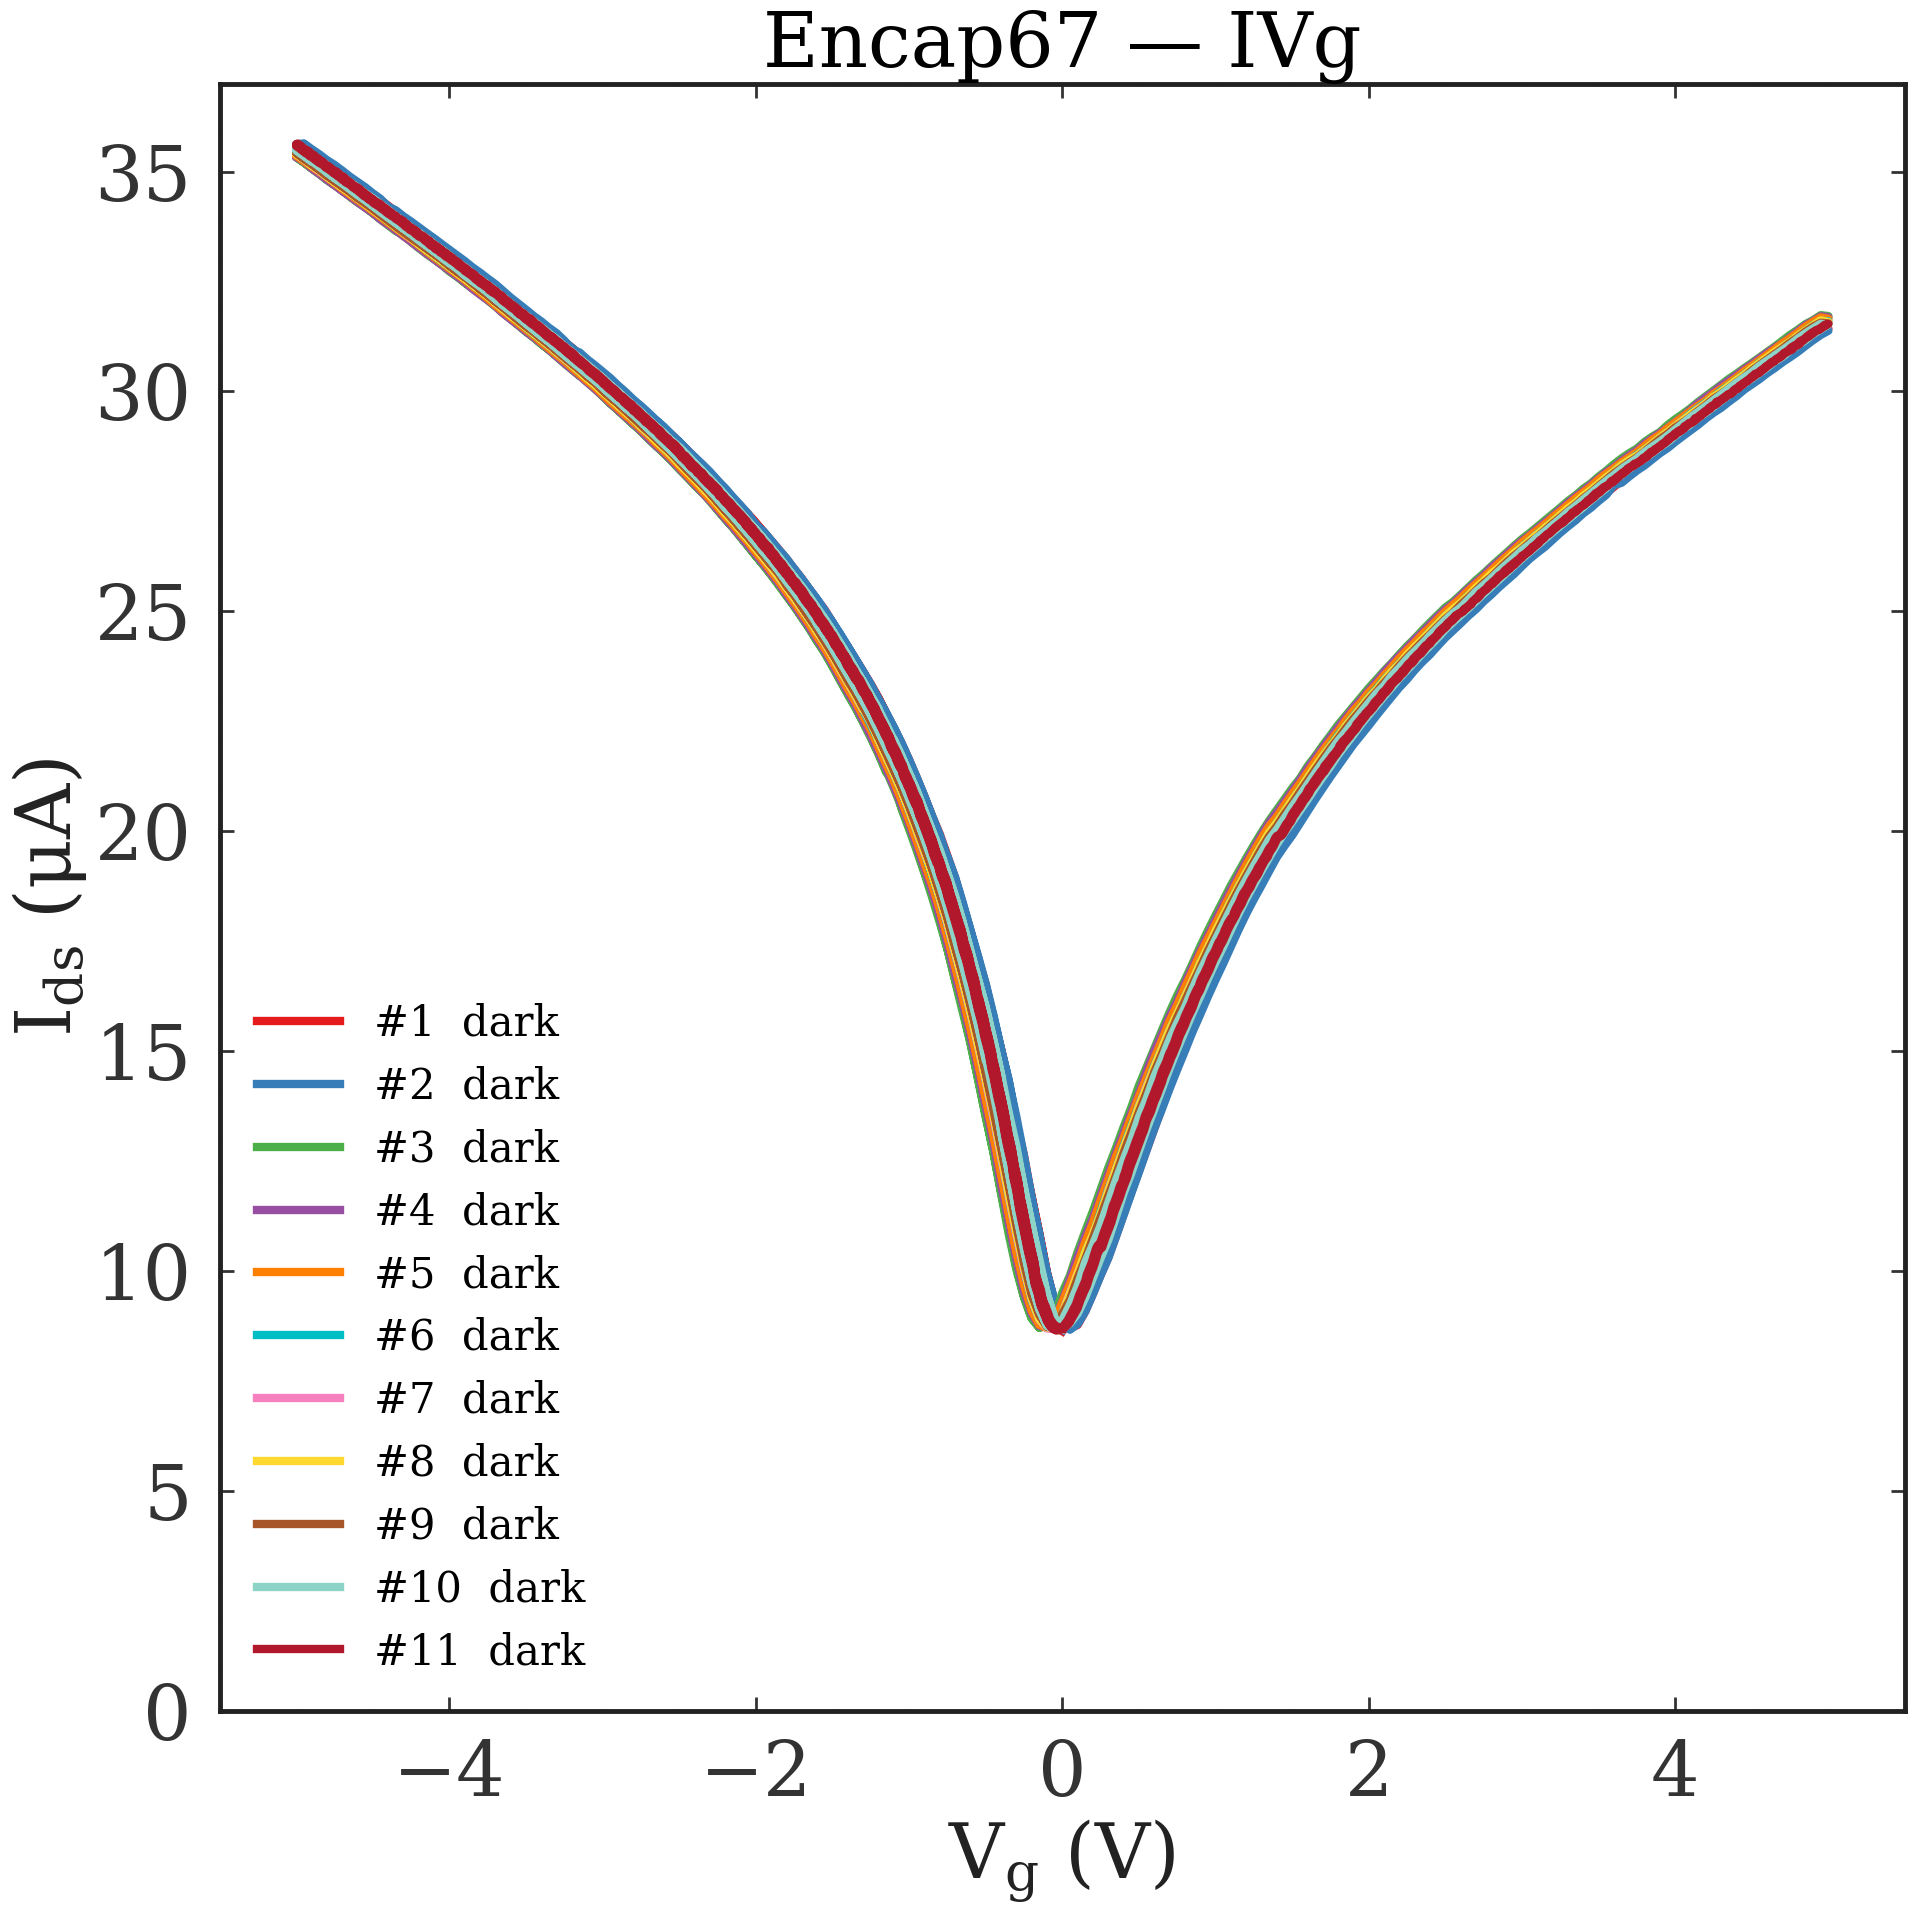

In [22]:
METADATA_CSV = "metadata/2025-10-16/metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 67.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem


# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/chip67_ITS_overlay_metadata.png


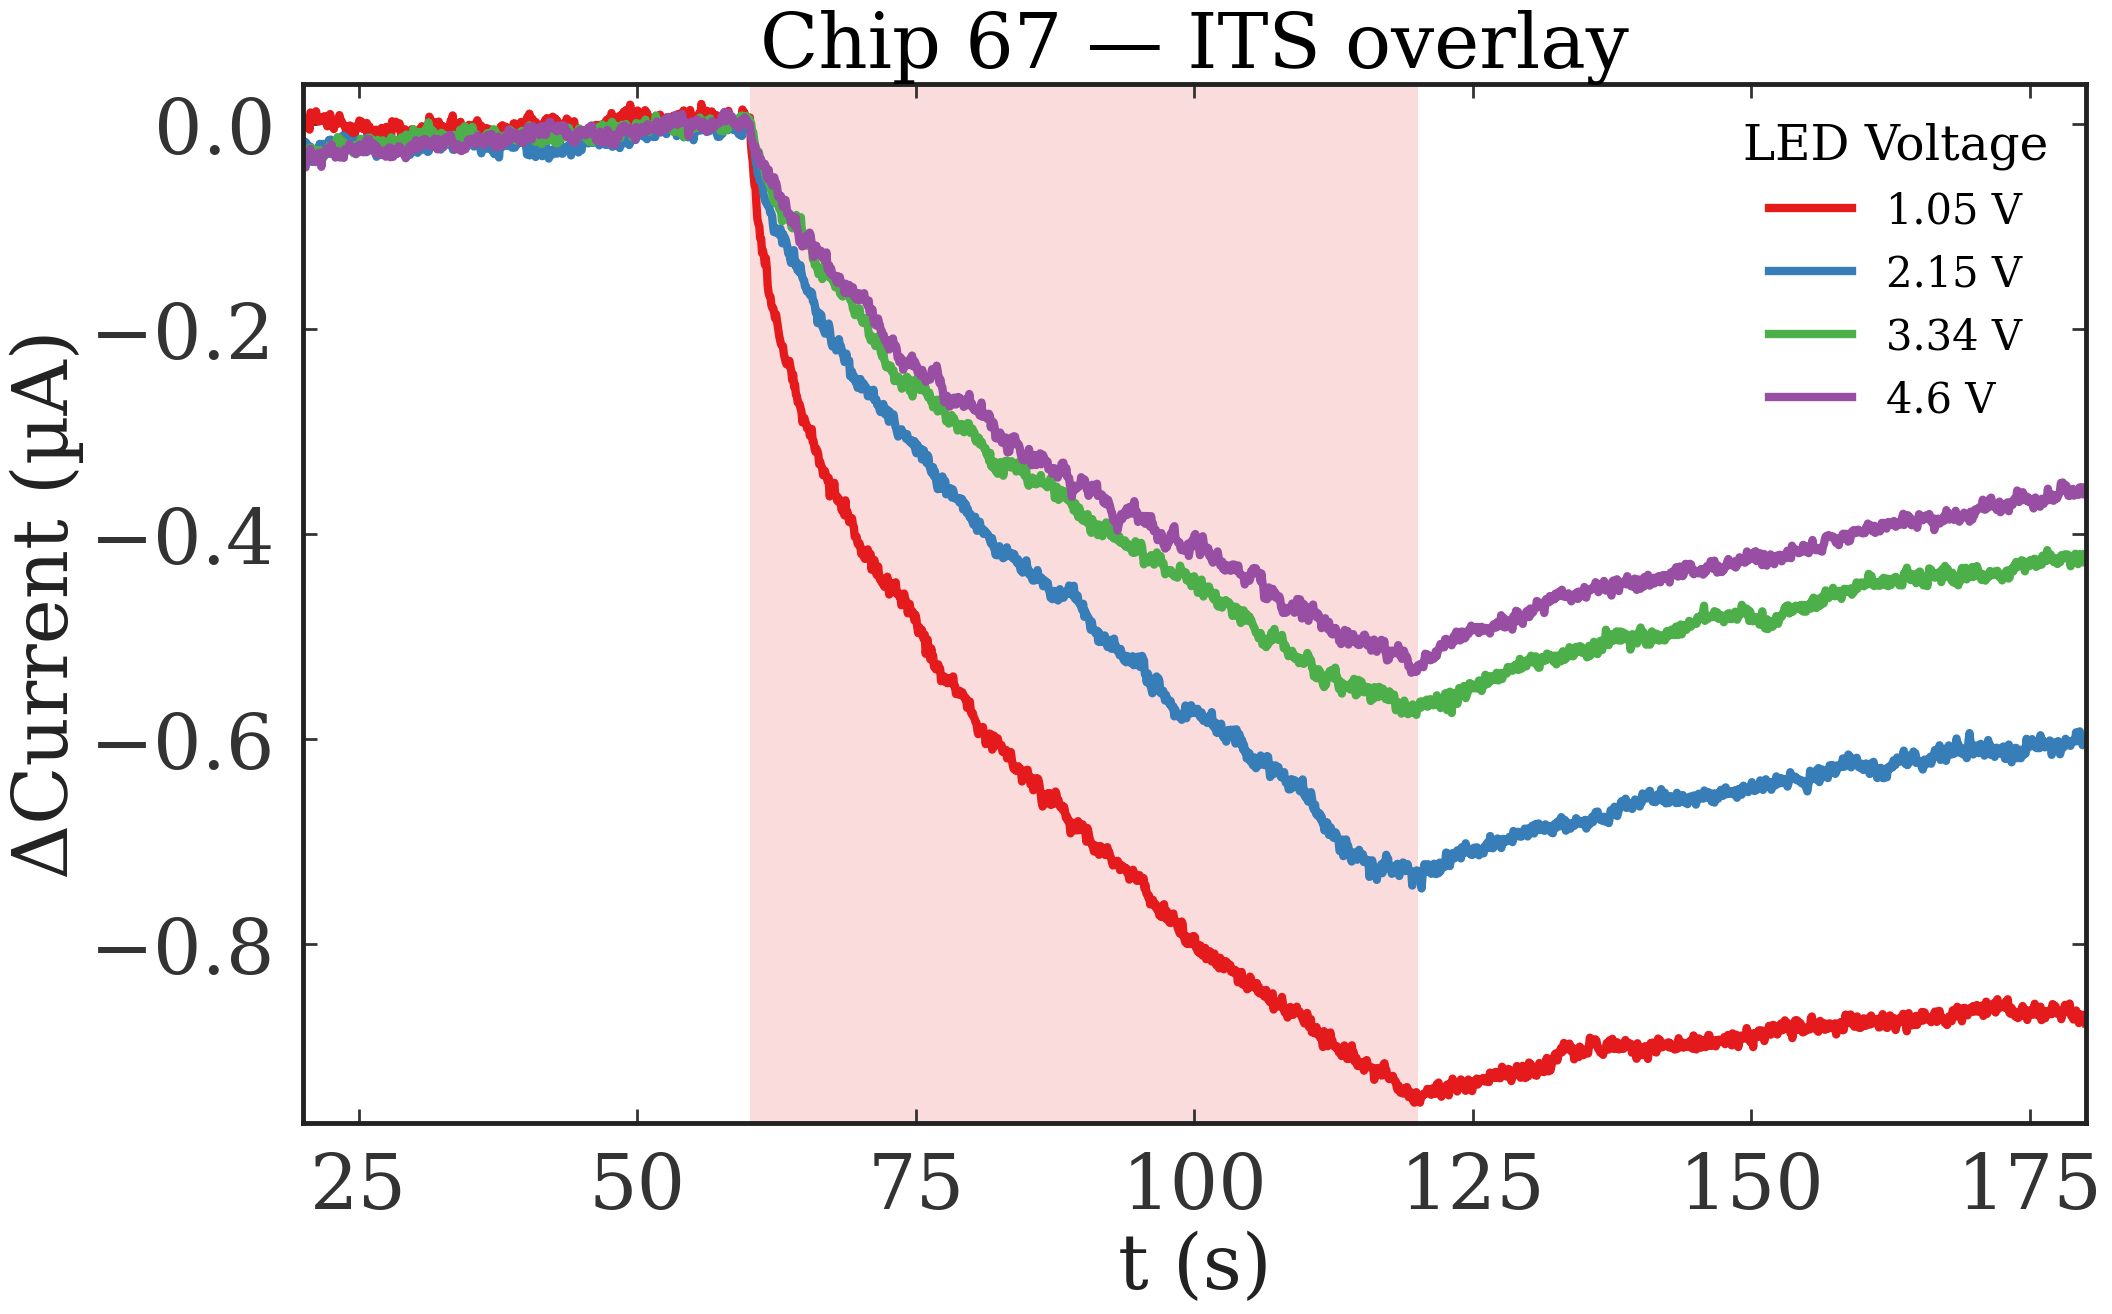

In [23]:

good_its = [1,2,3,4]  # the _NN.csv numbers you want


meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag, legend_by="led_voltage")


In [24]:
# Configuration
METADATA_DIR = Path("metadata")
RAW_DATA_DIR = Path("raw_data")
CHIP_NUMBER = 67

print_chip_history(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip_number=CHIP_NUMBER,
    chip_group_name="Alisson",
    proc_filter="It"  # Only show ITS experiments
)


Complete Experiment History: Alisson67
Total experiments: 46
Date range: 2025-10-14 to 2025-10-19

─── 2025-10-14 (2025-10-14) ──────────────────────────────────────────────────
   4  15:13:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=1.15 V  λ=455.0 nm  period=120.0 s  #10
   5  15:16:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=2.19 V  λ=455.0 nm  period=120.0 s  #11
   6  15:19:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=3.28 V  λ=455.0 nm  period=120.0 s  #12
   7  15:22:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=4.41 V  λ=455.0 nm  period=120.0 s  #13
   9  16:10:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=1.15 V  λ=455.0 nm  period=120.0 s  #14
  10  16:13:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=2.29 V  λ=455.0 nm  period=120.0 s  #15
  11  16:16:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=3.28 V  λ=455.0 nm  period=120.0 s  #16
  12  16:19:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=4.41 V  λ=455.0 nm  period=120.0 s  #17
  15  16:39:10  It  Alisson67  VG=-0.35 V  VDS=0.1 V 

shape: (46, 9)
┌─────┬────────────┬──────────┬──────┬───┬────────────────────┬──────────┬────────────┬────────────┐
│ seq ┆ date       ┆ time_hms ┆ proc ┆ … ┆ source_file        ┆ file_idx ┆ start_time ┆ day_folder │
│ --- ┆ ---        ┆ ---      ┆ ---  ┆   ┆ ---                ┆ ---      ┆ ---        ┆ ---        │
│ i64 ┆ str        ┆ str      ┆ str  ┆   ┆ str                ┆ i64      ┆ f64        ┆ str        │
╞═════╪════════════╪══════════╪══════╪═══╪════════════════════╪══════════╪════════════╪════════════╡
│ 4   ┆ 2025-10-14 ┆ 15:13:12 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 10       ┆ 1.7605e9   ┆ 2025-10-14 │
│     ┆            ┆          ┆      ┆   ┆ 4/It2025-10-…      ┆          ┆            ┆            │
│ 5   ┆ 2025-10-14 ┆ 15:16:12 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 11       ┆ 1.7605e9   ┆ 2025-10-14 │
│     ┆            ┆          ┆      ┆   ┆ 4/It2025-10-…      ┆          ┆            ┆            │
│ 6   ┆ 2025-10-14 ┆ 15:19:12 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 12       ┆ 1.7605e9   ┆ 2025-10-14 │
│     ┆            ┆          ┆      ┆   ┆ 4/It2025-10-…      ┆          ┆            ┆            │
│ 7   ┆ 2025-10-14 ┆ 15:22:12 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 13       ┆ 1.7605e9   ┆ 2025-10-14 │
│     ┆            ┆          ┆      ┆   ┆ 4/It2025-10-…      ┆          ┆            ┆            │
│ 9   ┆ 2025-10-14 ┆ 16:10:44 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 14       ┆ 1.7605e9   ┆ 2025-10-14 │
│     ┆            ┆          ┆      ┆   ┆ 4/It2025-10-…      ┆          ┆            ┆            │
│ …   ┆ …          ┆ …        ┆ …    ┆ … ┆ …                  ┆ …        ┆ …          ┆ …          │
│ 73  ┆ 2025-10-17 ┆ 20:00:43 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 1        ┆ 1.7607e9   ┆ 2025-10-17 │
│     ┆            ┆          ┆      ┆   ┆ 7/It2025-10-…      ┆          ┆            ┆            │
│ 74  ┆ 2025-10-17 ┆ 20:13:47 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 2        ┆ 1.7607e9   ┆ 2025-10-17 │
│     ┆            ┆          ┆      ┆   ┆ 7/It2025-10-…      ┆          ┆            ┆            │
│ 76  ┆ 2025-10-18 ┆ 19:28:06 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 1        ┆ 1.7608e9   ┆ 2025-10-18 │
│     ┆            ┆          ┆      ┆   ┆ 8/It2025-10-…      ┆          ┆            ┆            │
│ 80  ┆ 2025-10-19 ┆ 14:04:28 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 1        ┆ 1.7609e9   ┆ 2025-10-19 │
│     ┆            ┆          ┆      ┆   ┆ 9/It2025-10-…      ┆          ┆            ┆            │
│ 82  ┆ 2025-10-19 ┆ 18:44:20 ┆ It   ┆ … ┆ raw_data/2025-10-1 ┆ 2        ┆ 1.7609e9   ┆ 2025-10-19 │
│     ┆            ┆          ┆      ┆   ┆ 9/It2025-10-…      ┆          ┆            ┆            │
└─────┴────────────┴──────────┴──────┴───┴────────────────────┴──────────┴────────────┴────────────┘

[info] combined 2 experiment(s) from 1 day(s)
[info] using 37 common column(s)

Combined 2 experiments
saved figs/chip67_ITS_overlay_cross_day_analysis.png


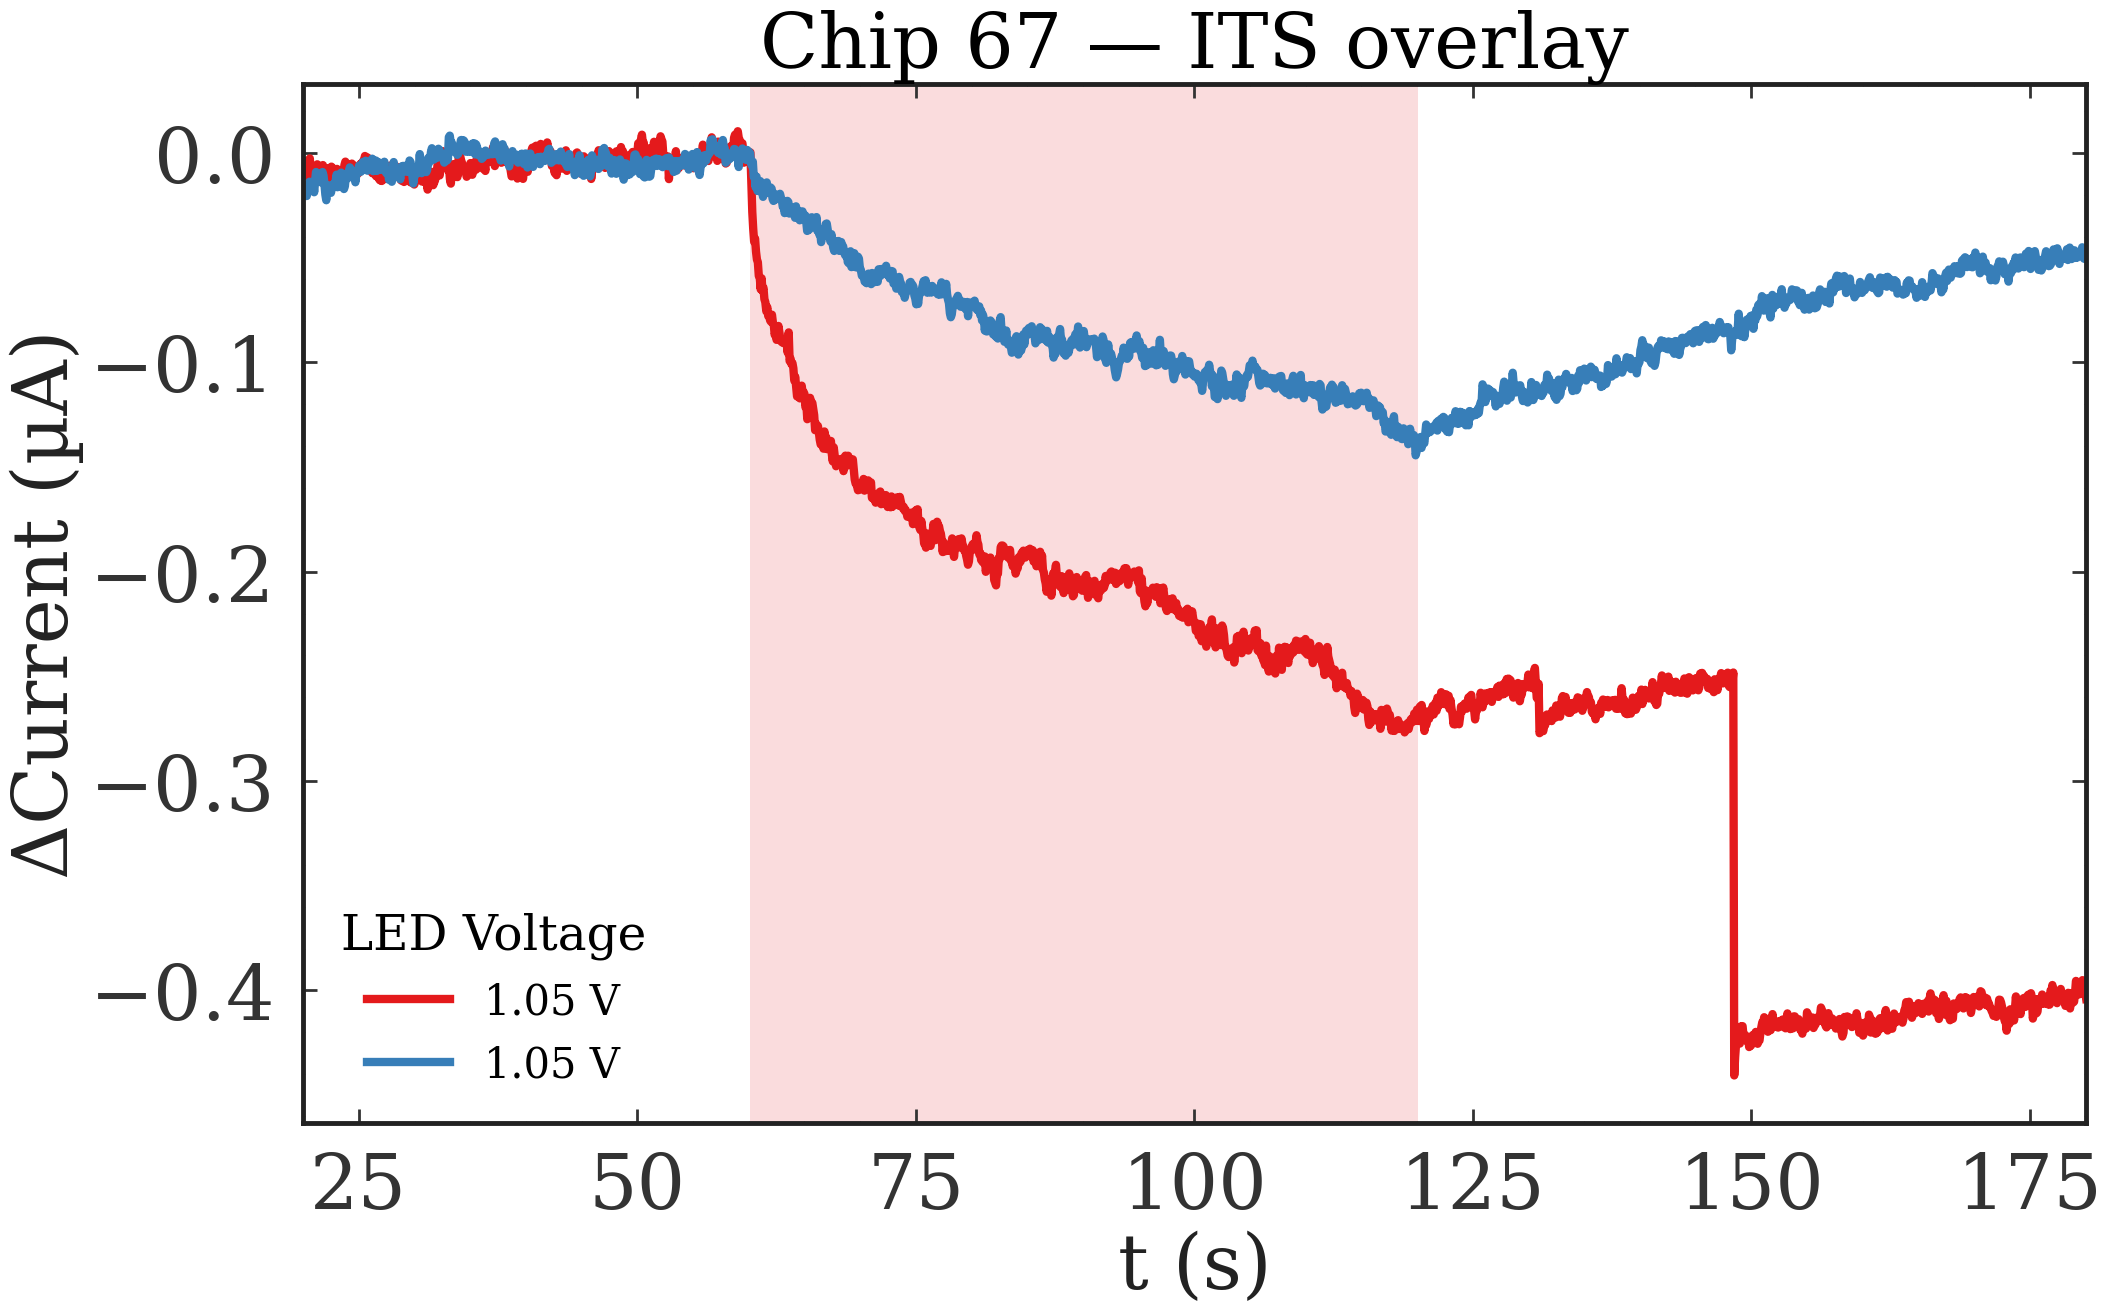

In [25]:
# Example: Select experiments from multiple days
# (Adjust these based on what you see in the chip history)

metadata_paths = [
    "metadata/2025-10-15/metadata.csv",
    "metadata/2025-10-16/metadata.csv",
    # Add more days as needed
]

# File indices you want to plot (from chip history)
selected_seq_numbers = [38, 41]  # Adjust based on your selection

# Combine selected experiments
meta = combine_metadata_by_seq(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip=CHIP_NUMBER,
    seq_numbers=selected_seq_numbers,
    chip_group_name="Alisson"
)
# Preview what was combined
print(f"\nCombined {meta.height} experiments")
#print(meta.select(["file_idx", "proc", "source_file", "VG", "Laser wavelength"]))

# Plot the combined selection
plot_its_overlay(
    meta,
    Path("."),
    tag="cross_day_analysis",
    legend_by="led_voltage",  # or "wavelength", "vg", etc.
    padding=0.05
)

[info] combined 3 experiment(s) from 3 day(s)
[info] using 32 common column(s)

Combined 3 experiments
saved figs/chip67_ITS_overlay_cross_day_analysis.png


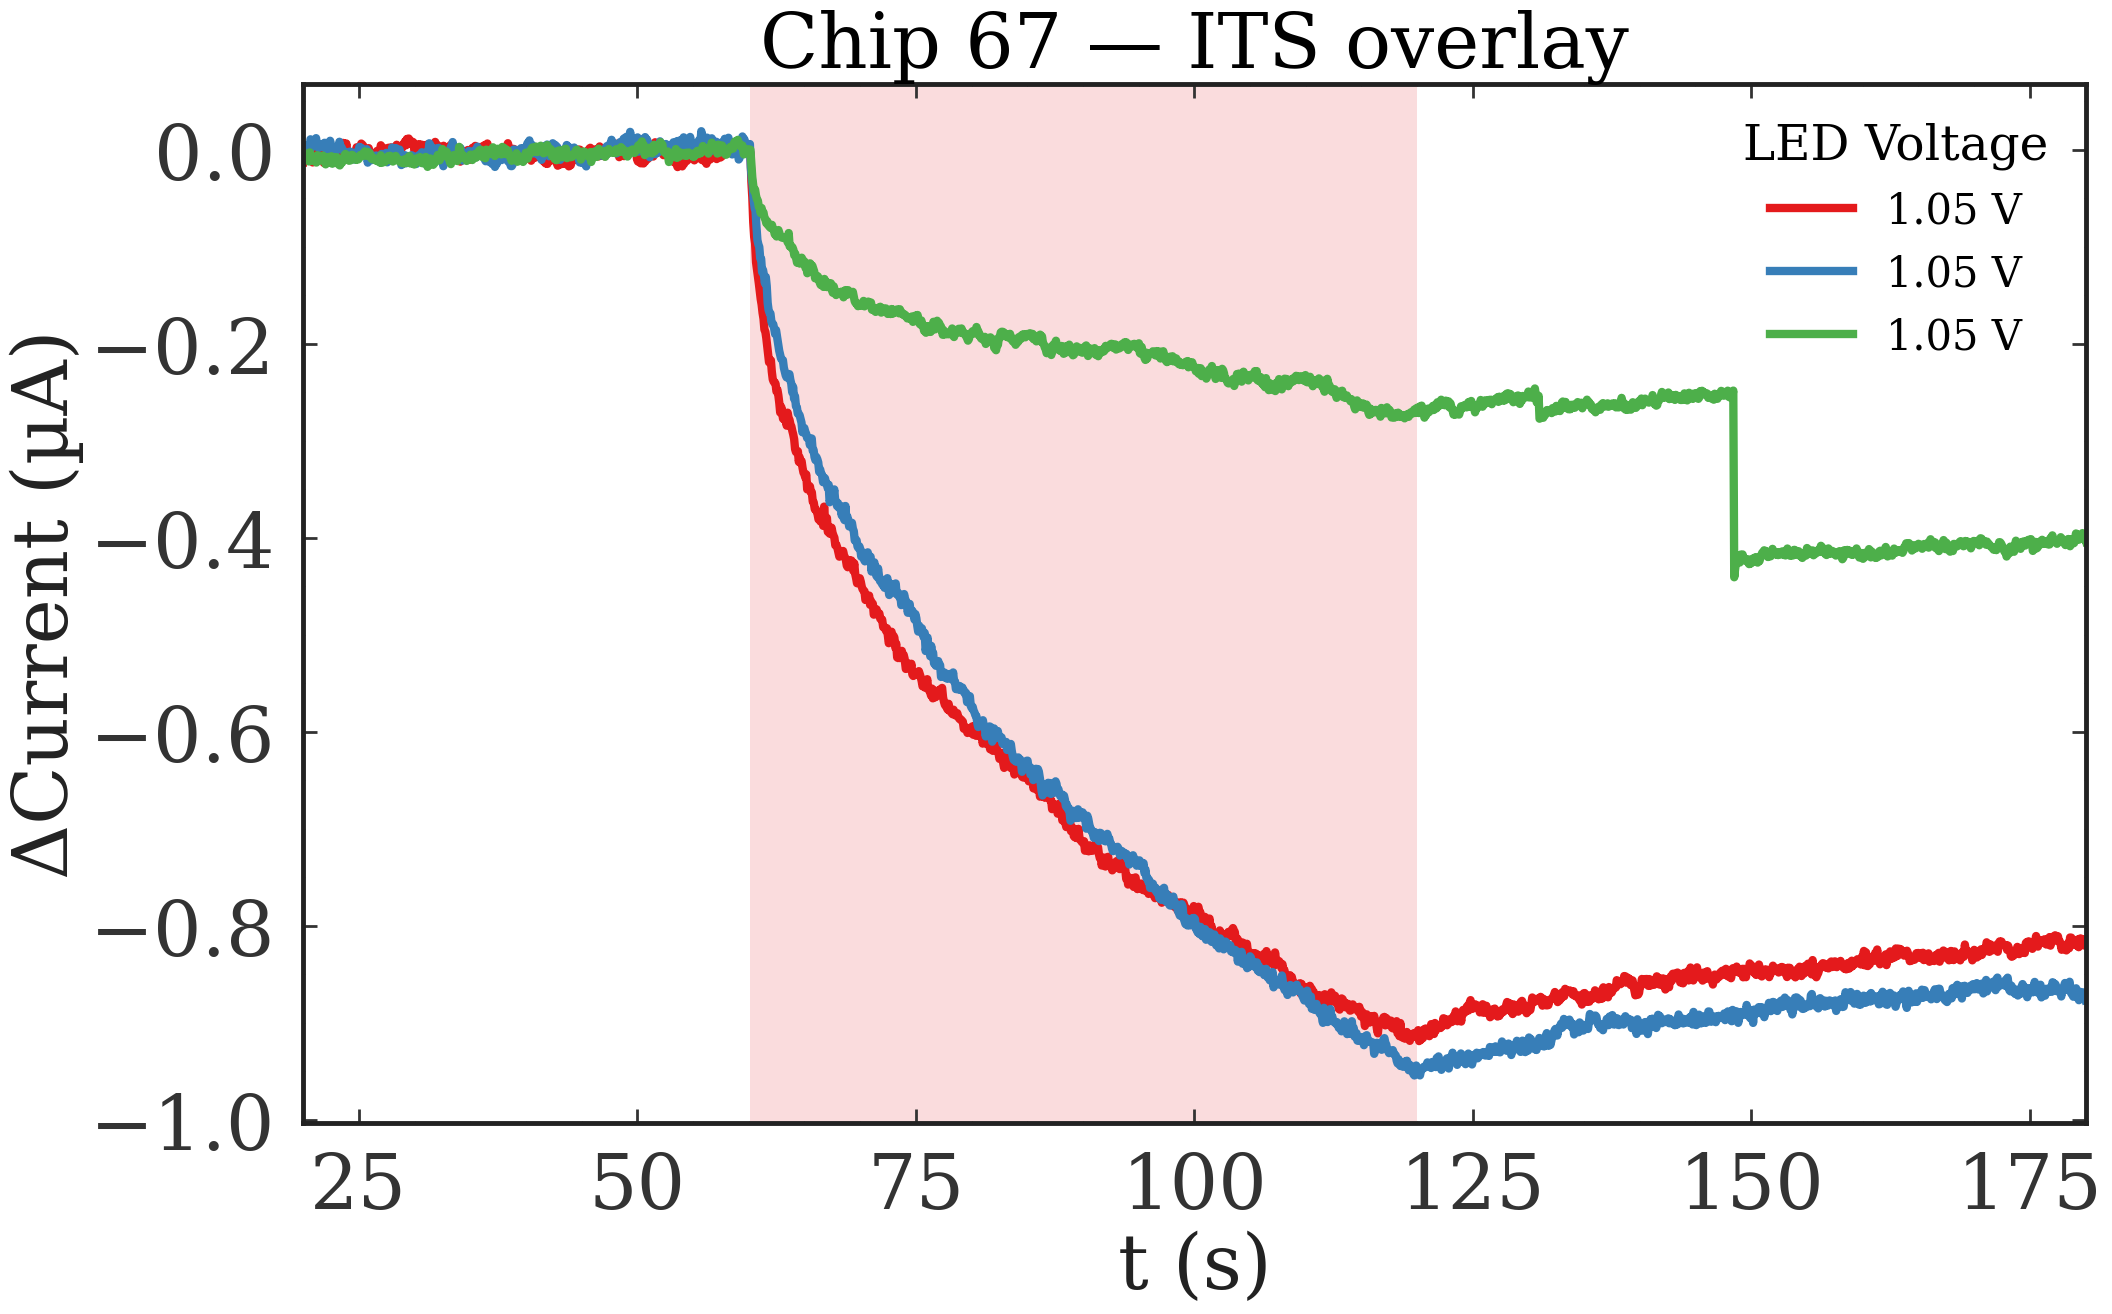

In [26]:
# File indices you want to plot (from chip history)
selected_seq_numbers = [38,52,57]  # Adjust based on your selection

# Combine selected experiments
meta = combine_metadata_by_seq(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip=CHIP_NUMBER,
    seq_numbers=selected_seq_numbers,
    chip_group_name="Alisson"
)
# Preview what was combined
print(f"\nCombined {meta.height} experiments")
#print(meta.select(["file_idx", "proc", "source_file", "VG", "Laser wavelength"]))

# Plot the combined selection
plot_its_overlay(
    meta,
    Path("."),
    tag="cross_day_analysis",
    legend_by="led_voltage",  # or "wavelength", "vg", etc.
    padding=0.05
)